#Fetal health data, Analyse exploratoire:

   baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0

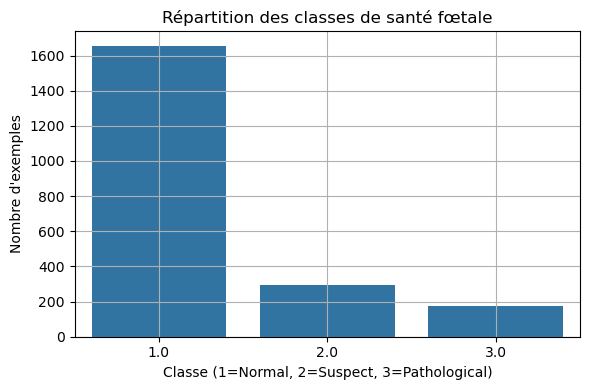

fetal_health
1.0    77.845720
2.0    13.875823
3.0     8.278457
Name: proportion, dtype: float64


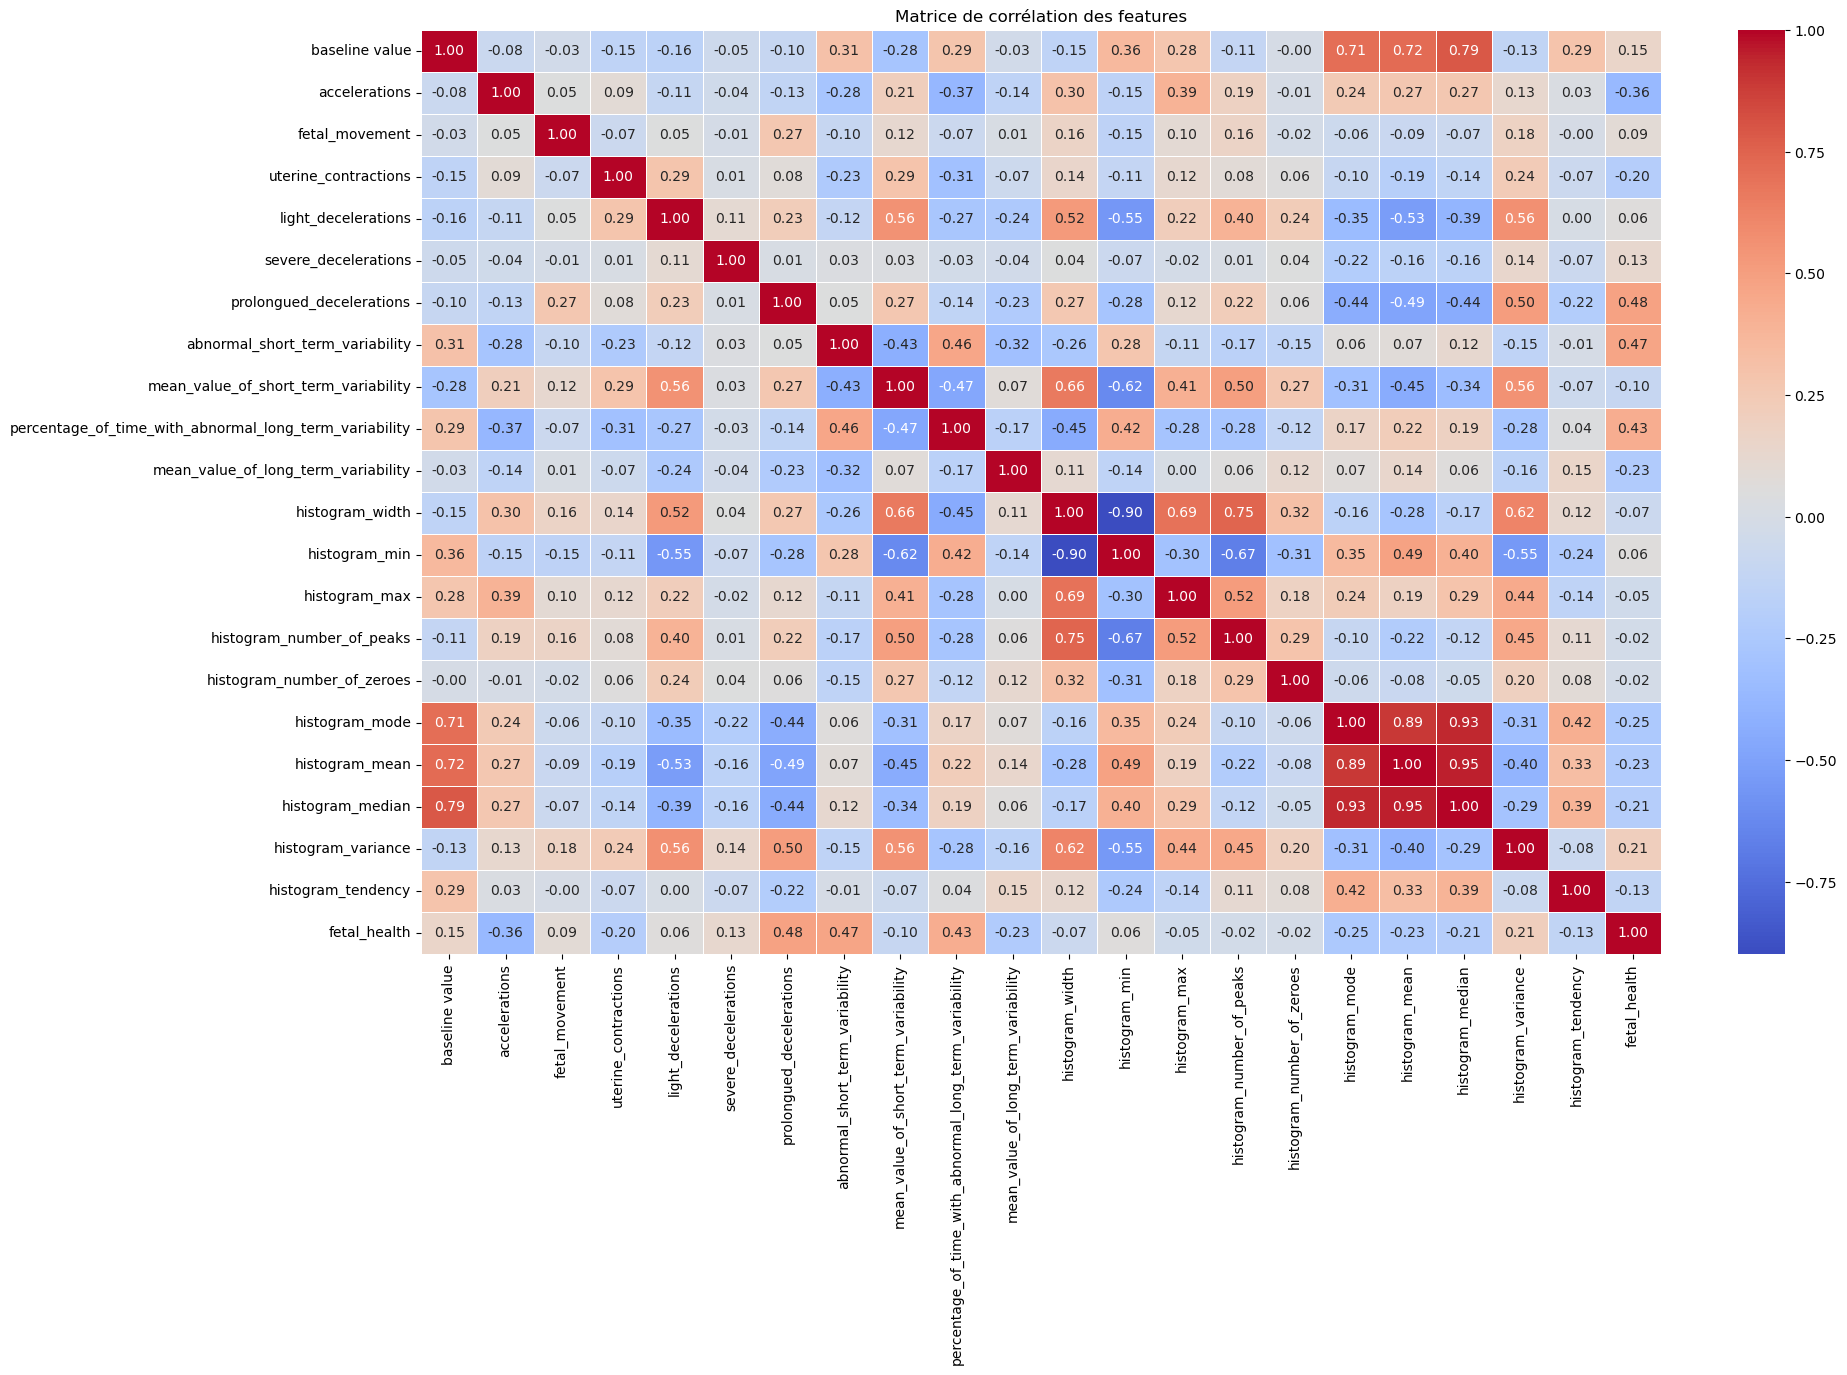

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')


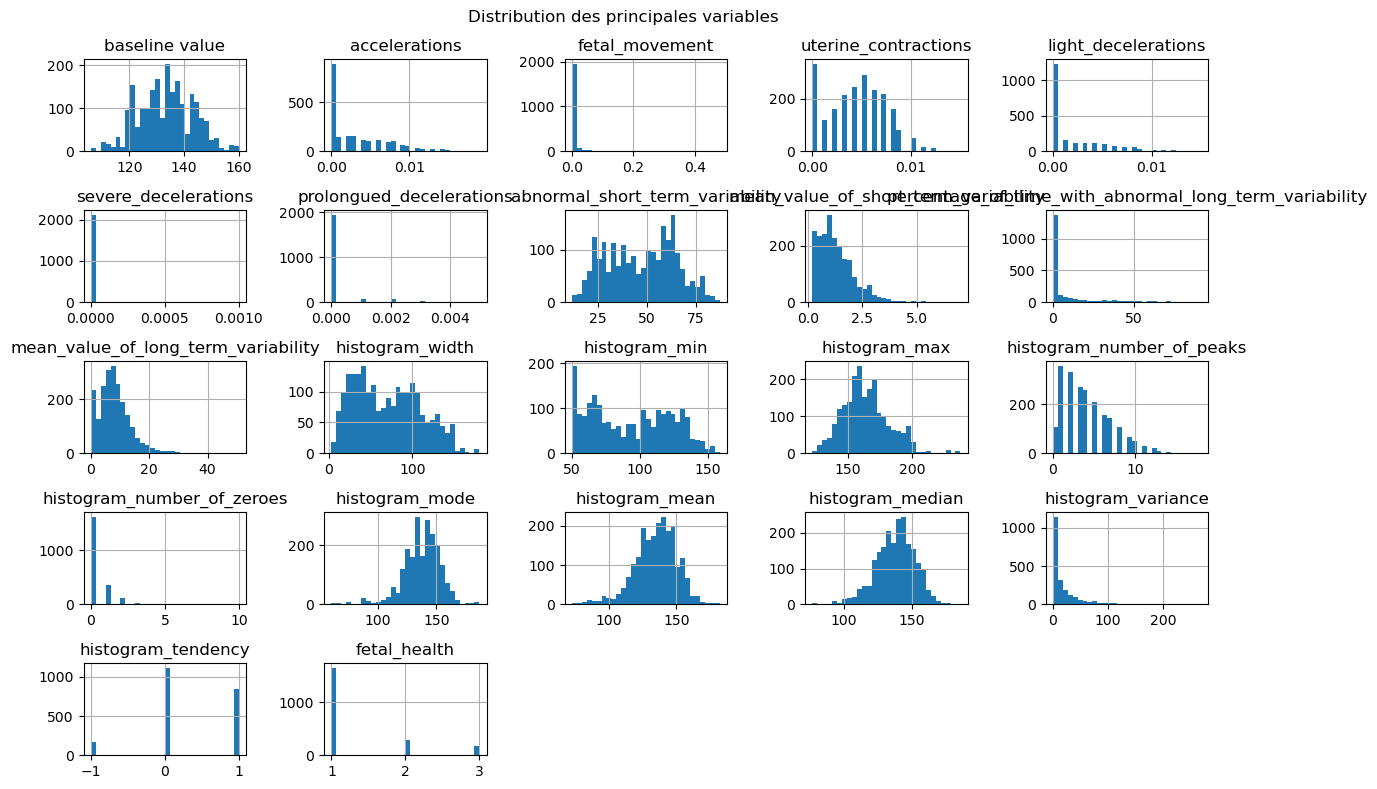

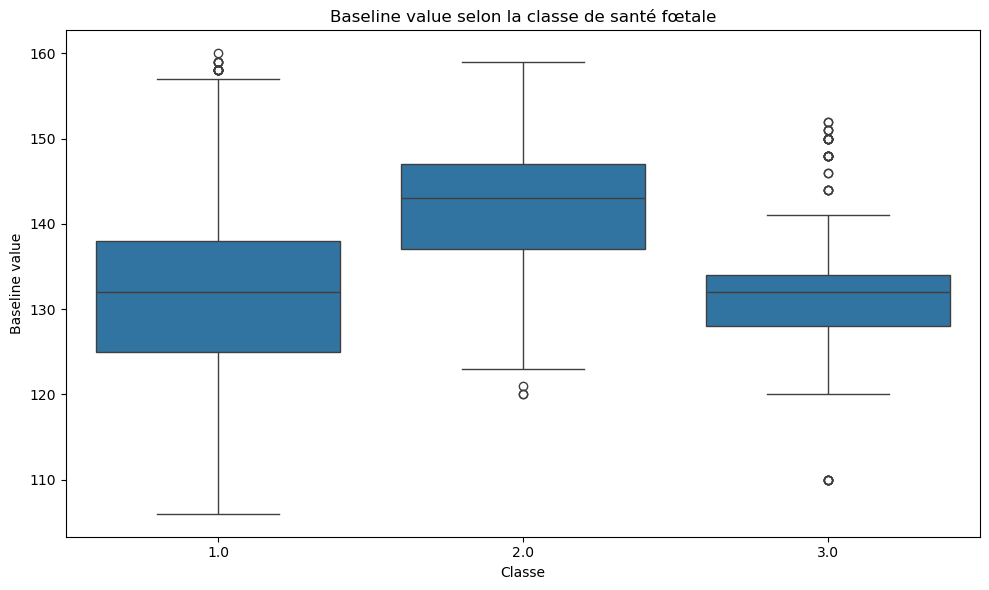

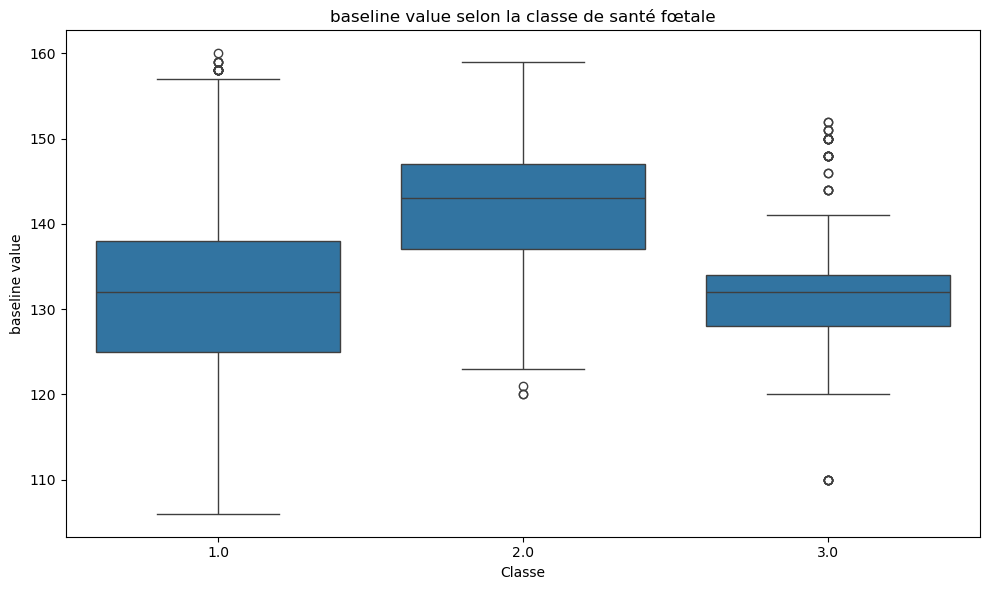

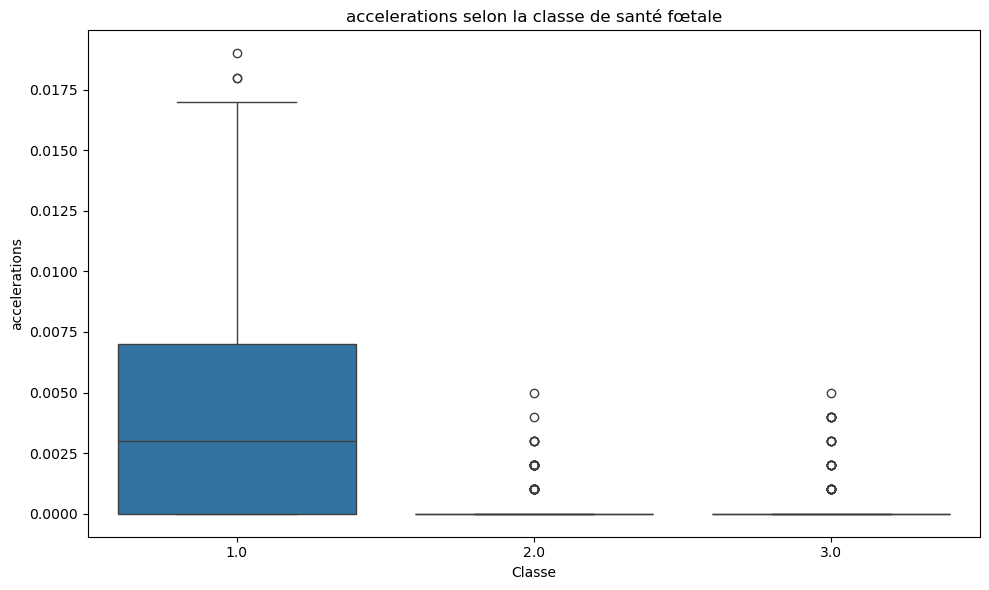

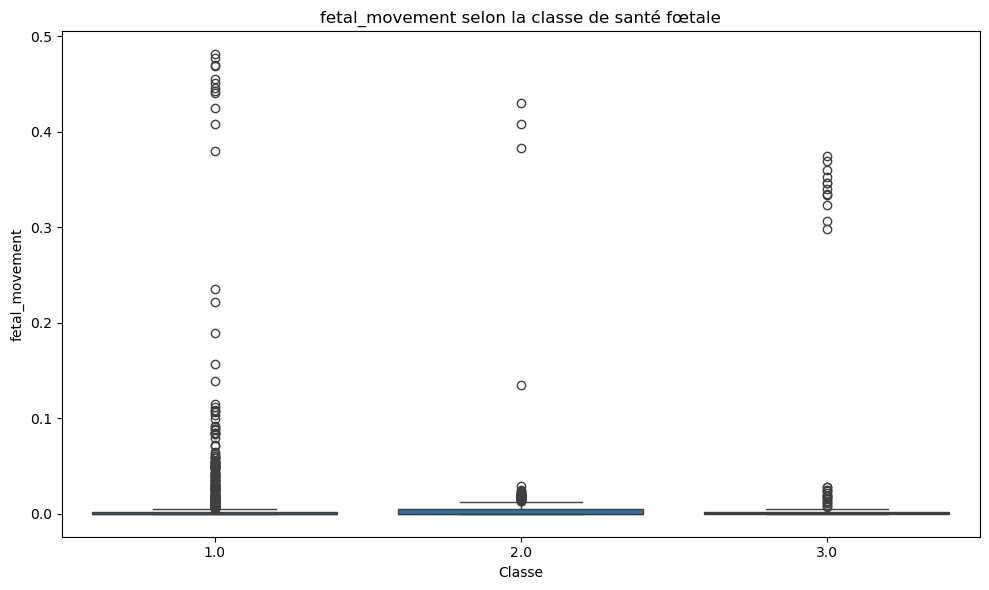

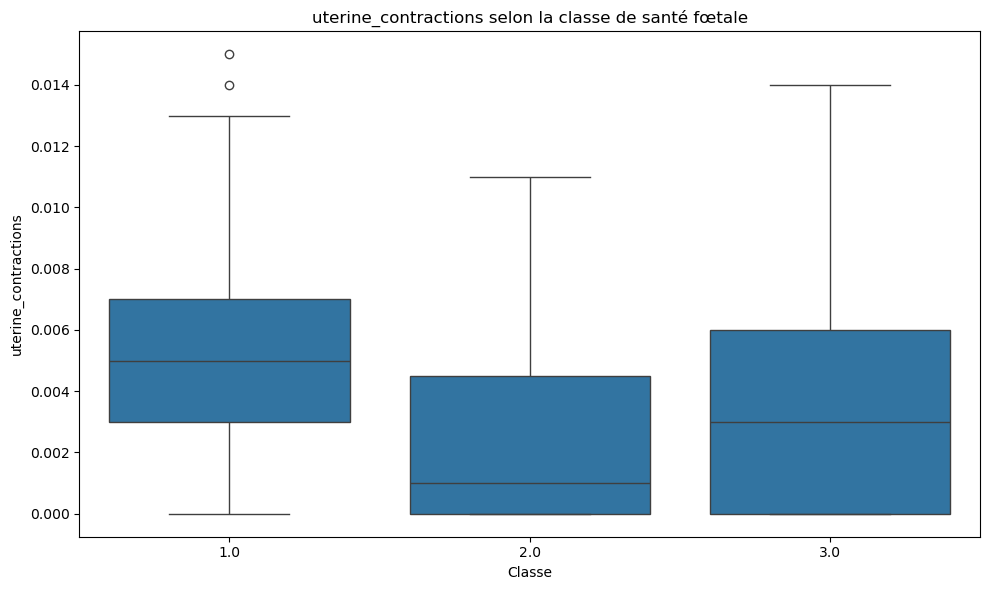

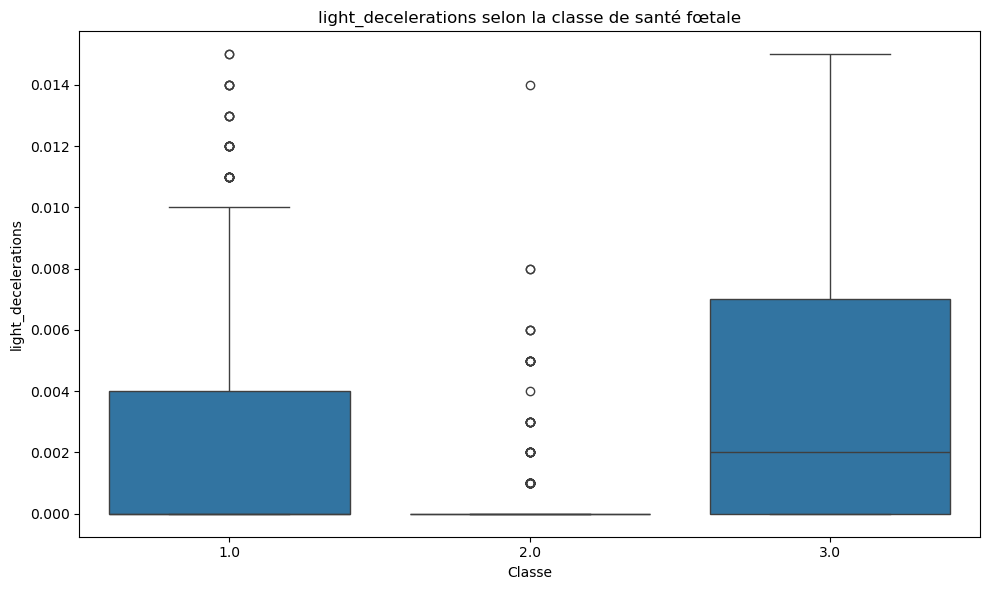

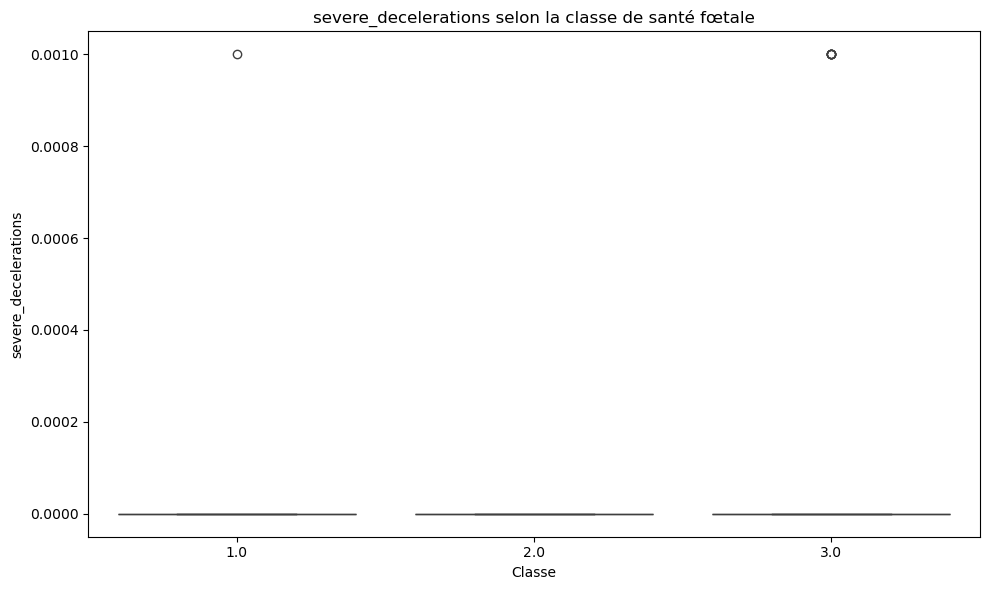

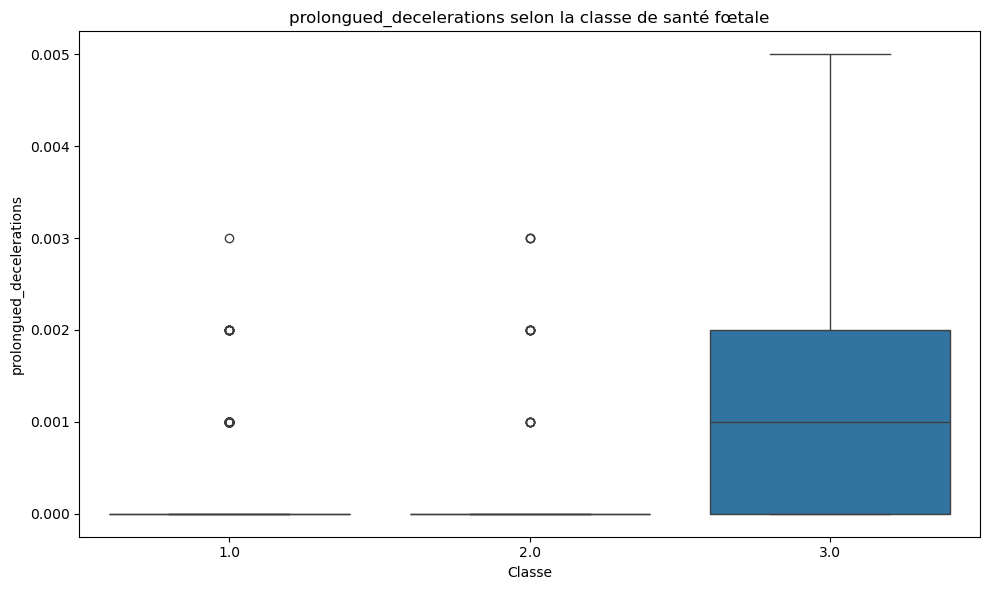

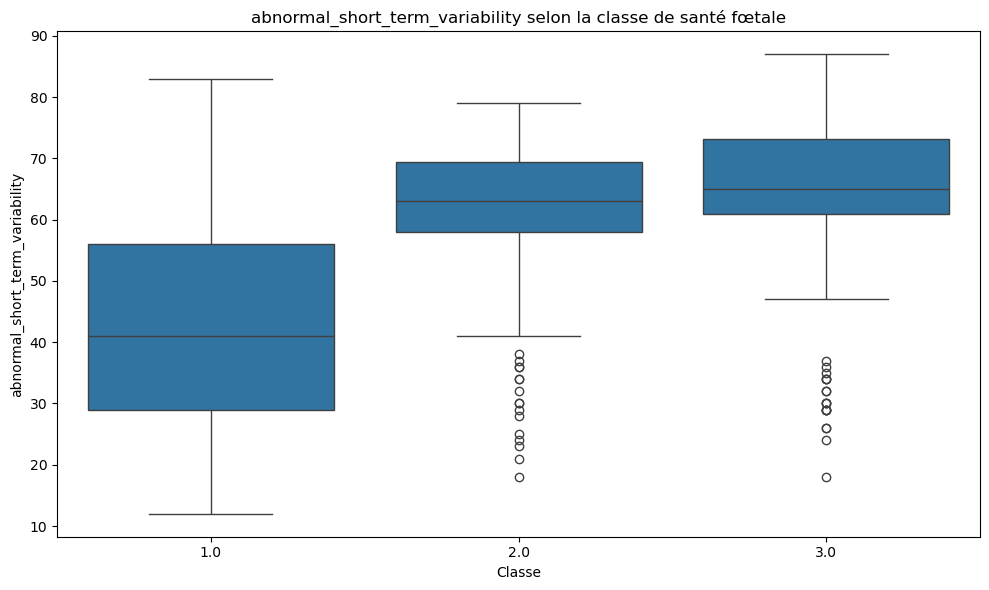

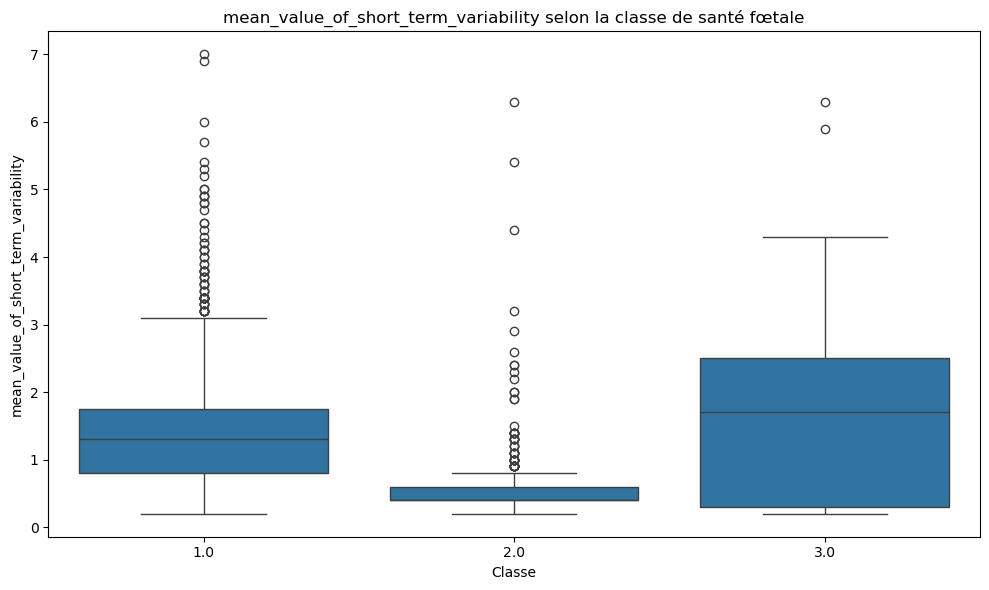

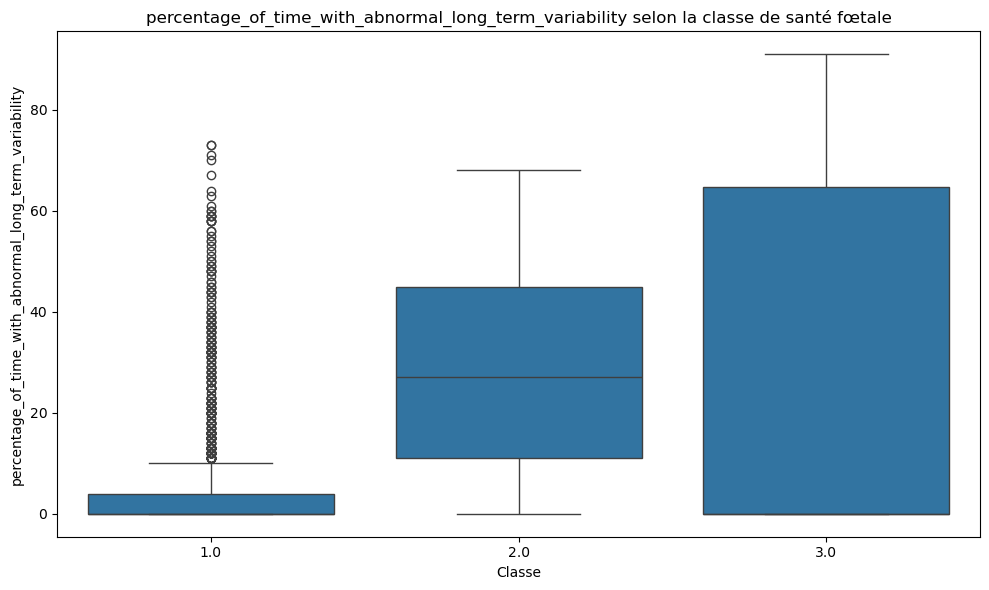

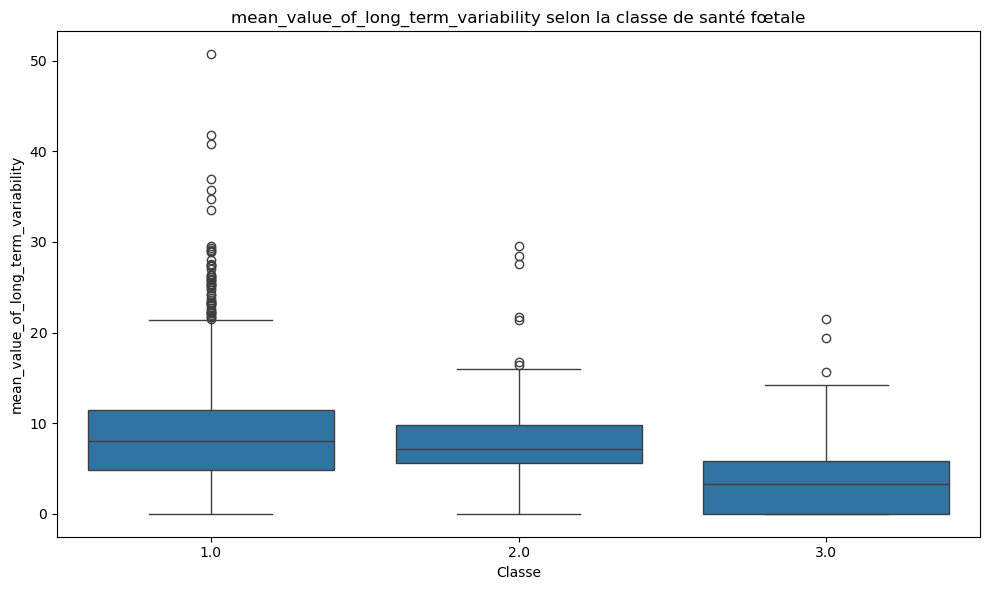

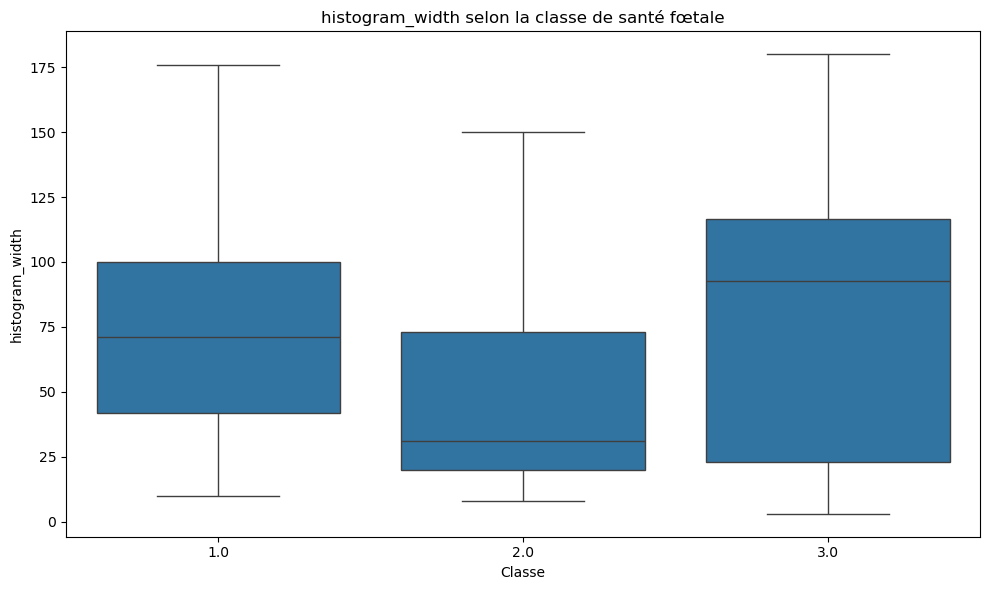

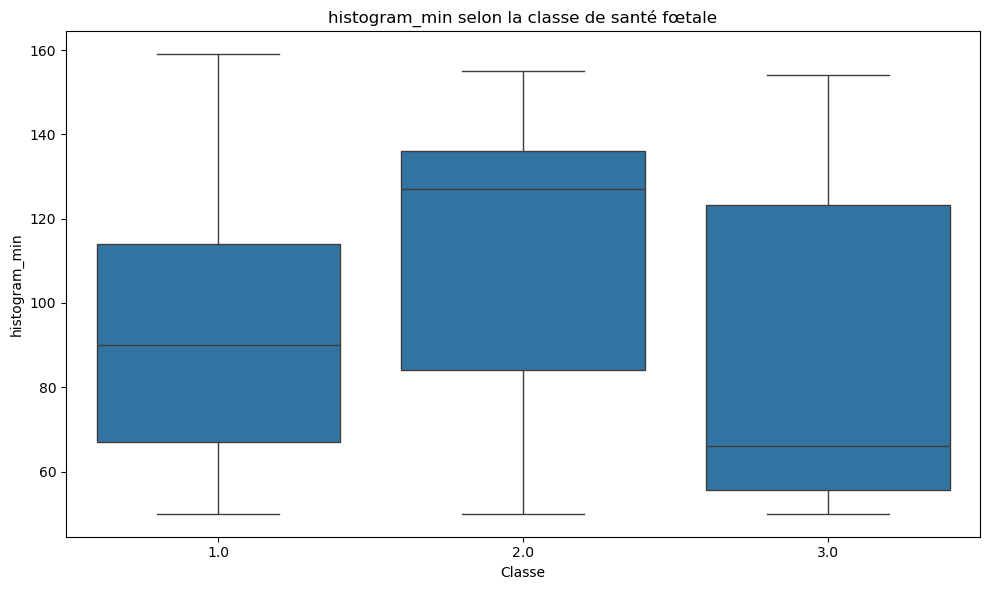

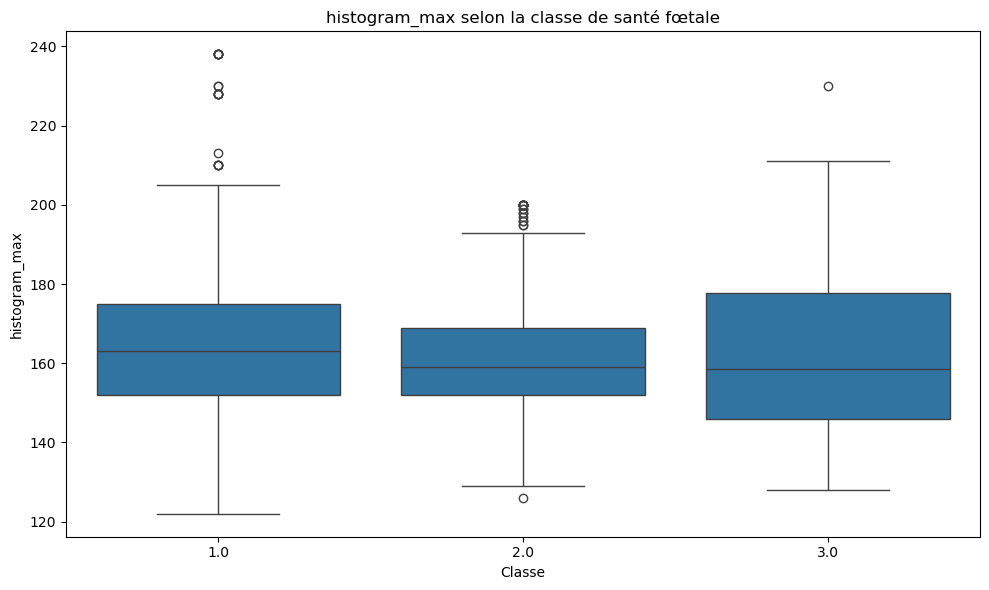

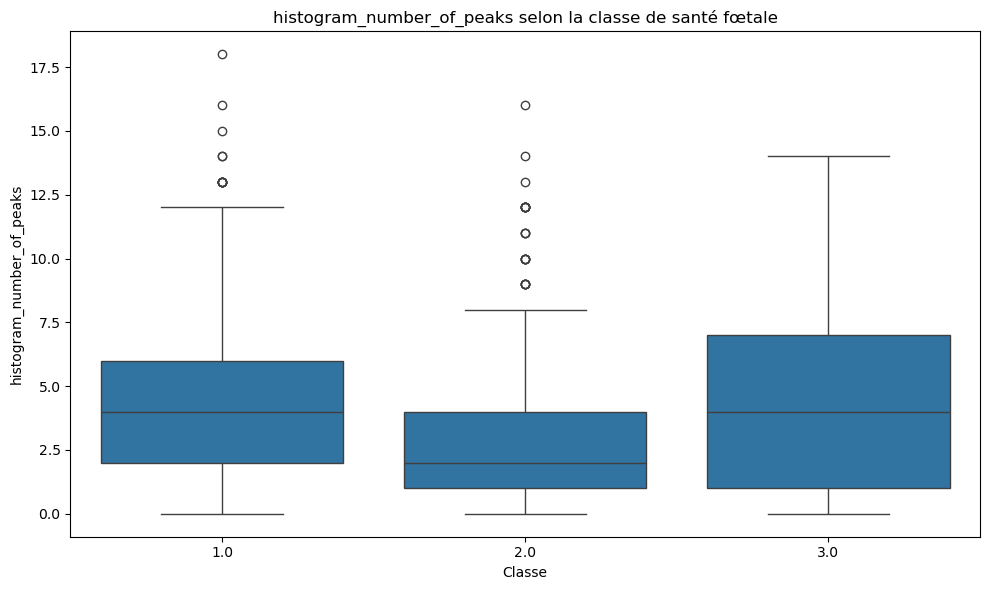

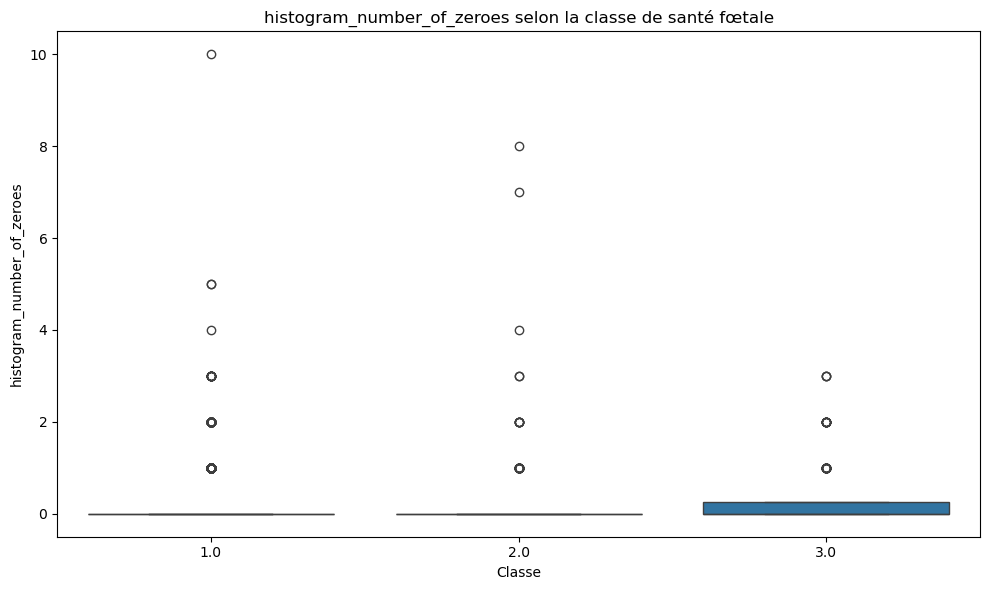

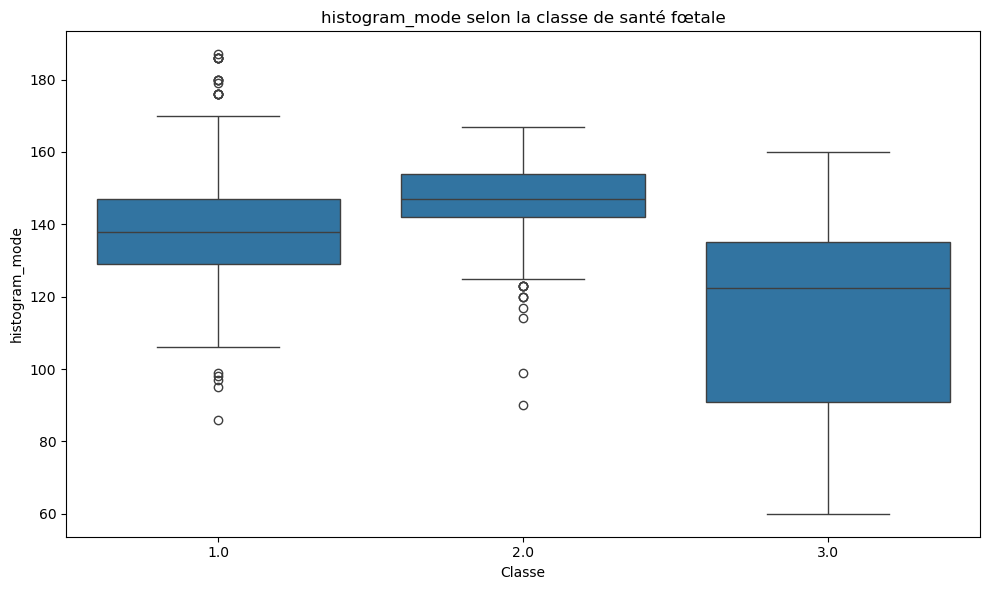

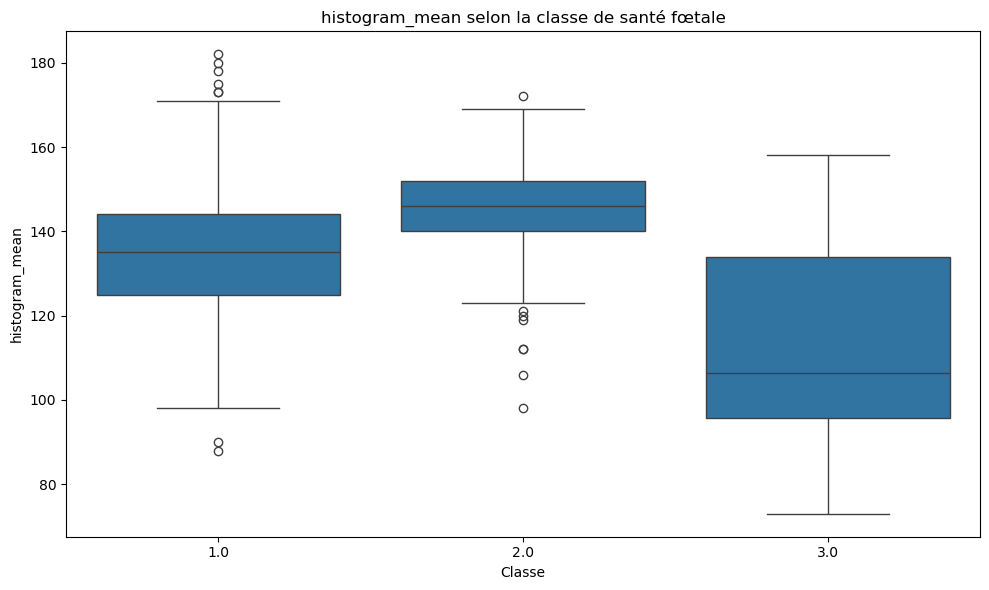

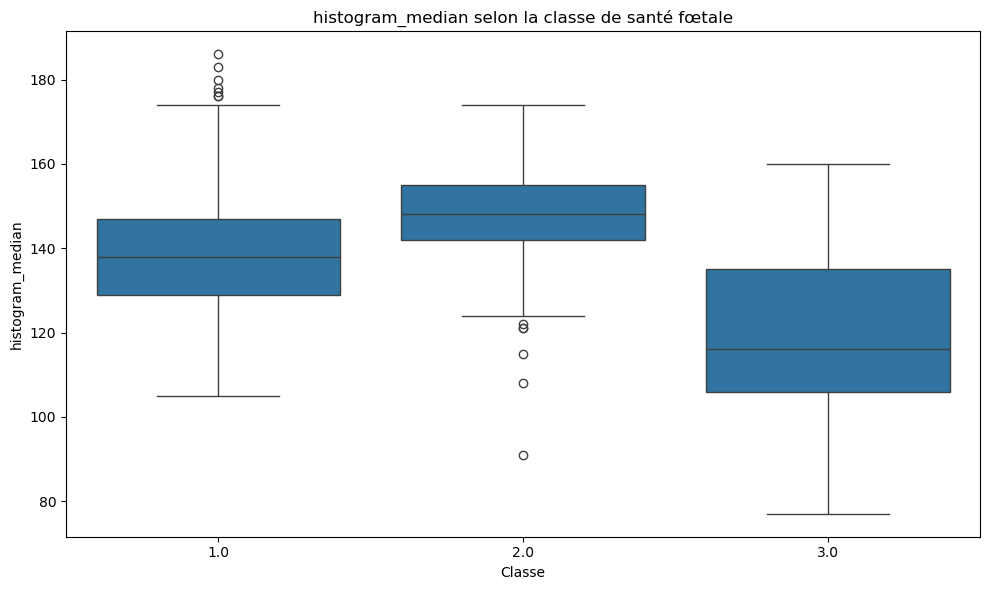

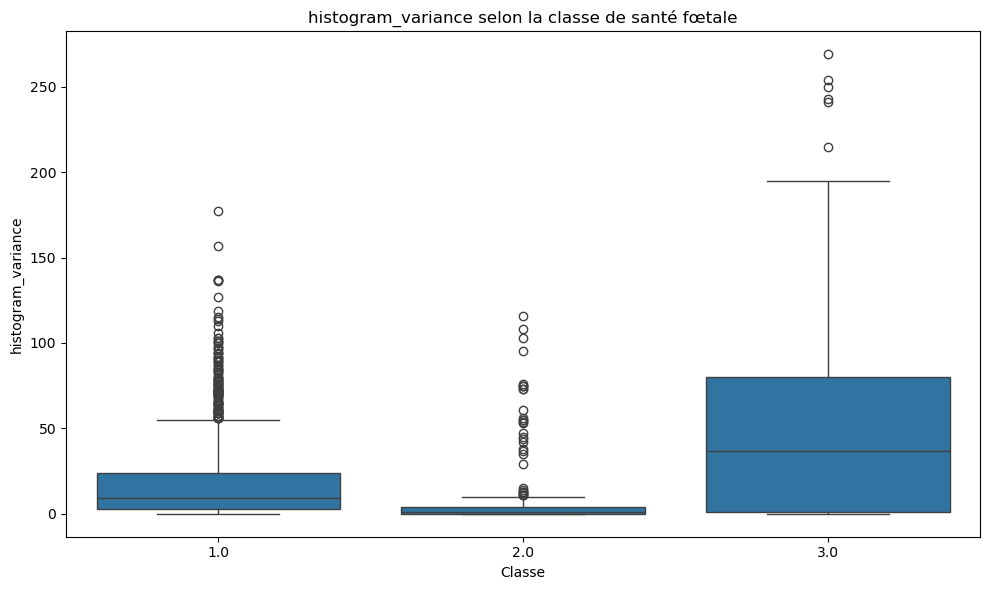

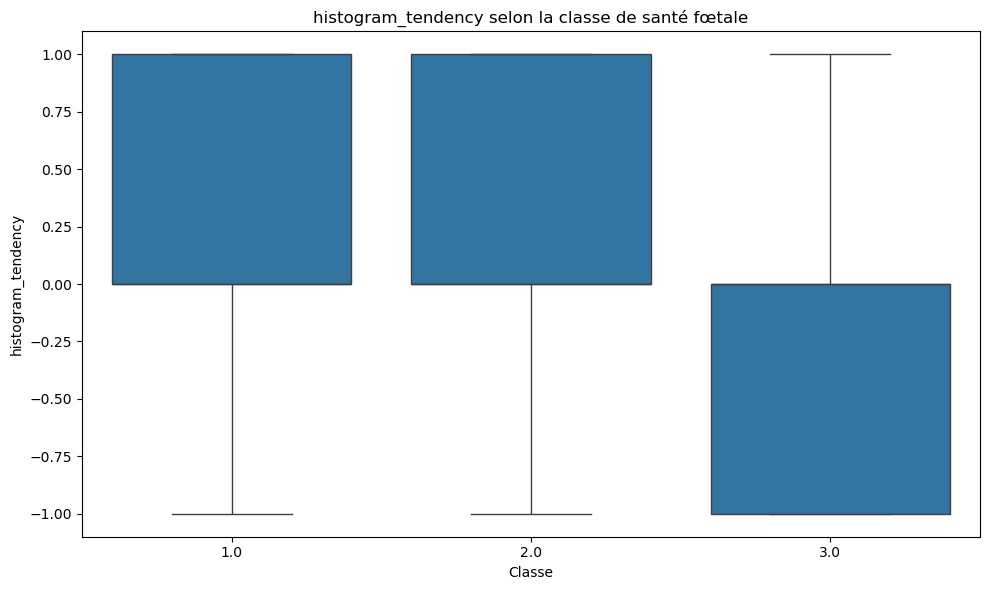

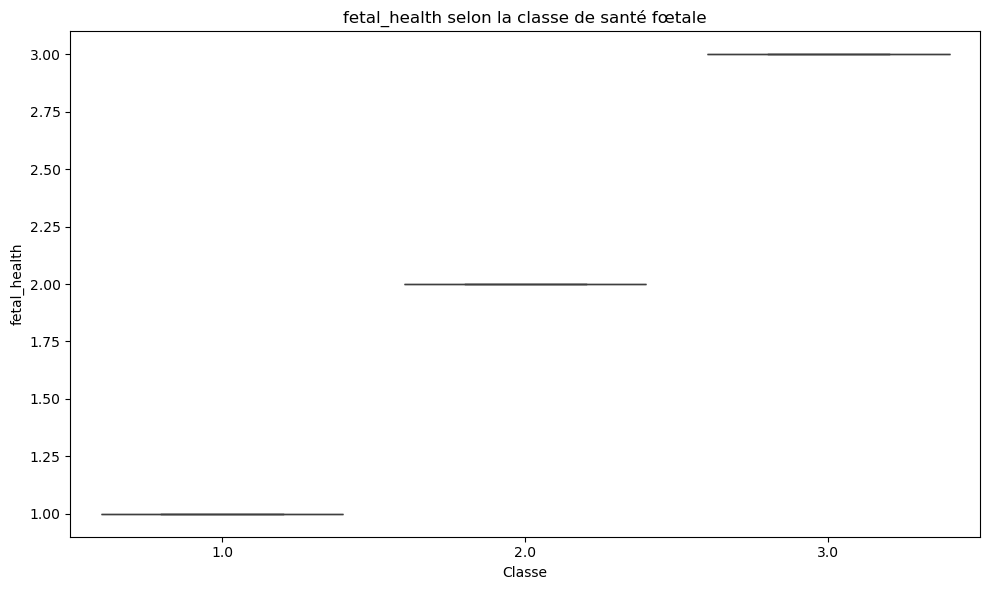

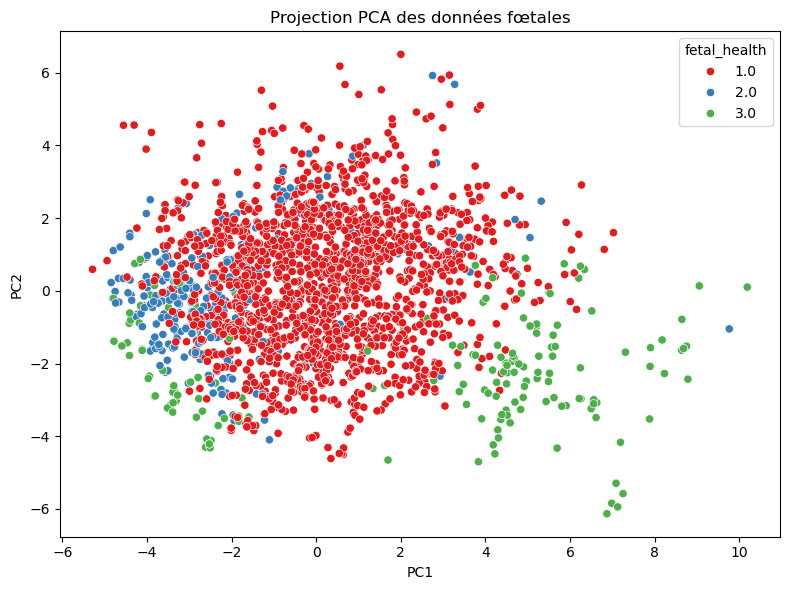

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import numpy as np
import plotly.express as px

# Chargement du dataset

path = "fetal_health.csv"
df = pd.read_csv(path)

# Aperçu des données
print(df.head())
print("\nInfos sur le dataset :")
print(df.info())
print("\nStatistiques descriptives :")
print(df.describe())


# Répartition de la variable cible (santé fœtale)
plt.figure(figsize=(6, 4))
sns.countplot(x='fetal_health', data=df)
plt.title("Répartition des classes de santé fœtale")
plt.xlabel("Classe (1=Normal, 2=Suspect, 3=Pathological)")
plt.ylabel("Nombre d'exemples")
plt.grid(True)
plt.tight_layout()
plt.show()

# Déséquilibre des classes à prendre en compte pour la modélisation: on remarque que les individus sains sontbeaucoup plus nombreux que les pathologiques ainsi que les à risque

# Pourcentages
print(df['fetal_health'].value_counts(normalize=True) * 100)

# Matrice de corrélation
plt.figure(figsize=(20, 12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Matrice de corrélation des features")
plt.show()
# prolongued_decelerations et short_term_variability sont assez corrélées avec fetahl health (0.47 et 0.48)
# baseline value (fréquence cardiaque foetale de base) fortement corrélée avec: histogram_mode, histogram_mean et histogram_median: logique car tout ce qu'il y a histogram dedans sont des stats
# dérivées de l'analyse du rythme cardiaque (les trois sont d'aillerus fortement corrélées entre elles)


# Distribution de quelques variables clés
cols_to_plot = ['baseline value', 'accelerations', 'prolongued_decelerations', 'uterine_contractions', 'light_decelerations']
cols = df.columns
print(cols)
df[cols].hist(bins=30, figsize=(12, 8))
plt.suptitle("Distribution des principales variables")
plt.tight_layout()
plt.show()

# Matrice de corrélation
"""plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()"""

# Boxplot de quelques variables par classe
plt.figure(figsize=(10, 6))
sns.boxplot(x='fetal_health', y='baseline value', data=df)
plt.title("Baseline value selon la classe de santé fœtale")
plt.xlabel("Classe")
plt.ylabel("Baseline value")
plt.tight_layout()
plt.show()

for col in cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='fetal_health', y= col, data=df)
    plt.title(f"{col} selon la classe de santé fœtale")
    plt.xlabel("Classe")
    plt.ylabel(f"{col}")
    plt.tight_layout()
    plt.show()


# PCA : réduction à 2 composantes principales pour visualisation
features = df.drop(columns='fetal_health')
target = df['fetal_health']

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualisation
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['fetal_health'] = target

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='fetal_health', palette='Set1')
plt.title("Projection PCA des données fœtales")
plt.tight_layout()
plt.show()


L'analyse expxloratoire montre qu'il n'y a pas de valeurs nulles.
Nous remarquons que les variables ont des différences considérables de moyenne en terme d'ordre de grandeur. Il est donc nécessaire de normaliser (centrer) les données.

Répartition de classes de santé foetale: nous avons 1600 cas normaux, environ 300 cas suspects et environ 200 cas pathologiques. Il faut prendre en compte cette disparité dans nos modèles et analyses plus tard.
Etant donné que nous n'avons pas beaucoup de données, il serait intéressant d'appliquer les concepts du cours (estimer le modèle et ses paramètres par la méthode du maximum de vraisemblance).



Corrélation:
L’analyse de la matrice de corrélation révèle plusieurs
relations intéressantes entre les variables issues de la
cardiotocographie. Certaines, comme histogram_mean,
histogram_median et histogram_mode, présentent
des corrélations très fortes entre elles (supérieures
à 0.9), ce qui indique une forte redondance : elles
capturent les mêmes propriétés statistiques du si-
gnal. Ce serait donc intéressant de réduire les variables qu'on utilise pour nos futurs modèles afin d'éviter le problème du fléau de la dimension.

De plus, ces trois dernières mesures sont assez
corrélées (entre 0.71 et 0.79) à baseline_value.
Ces résultats sont prévisibles : toutes ces mesures
sont liées à la fréquence et au rythme cardiaque
foetaux.

Concernant la variable cible fetal_health,
aucune caractéristique ne montre de corrélation très
élevée (ce qui est courant dans les données médi-
cales multifactorielle), mais certaines se distinguent
tout de même : prolongued_decelerations (0.48),
percentage_of_time_with_abnormal_long_term_
variability (0.43), et
abnormal_short_term_variability (0.47) semblent
les plus informatives pour la prédiction de l’état de
santé fœtale.
Ces résultats soulignent l’intérêt de réduire les re-
dondances via des techniques telles que la sélection
de variables ou l’analyse en composantes principales
(PCA), tout en orientant les efforts de modélisation
sur les variables les plus corrélées à la cible. Les
variables moins corrélées, comme fetal_movement
ou light_decelerations, pourraient s’avérer moins
discriminantes mais méritent néanmoins d’être testées
dans un modèle prédictif.

#ACP

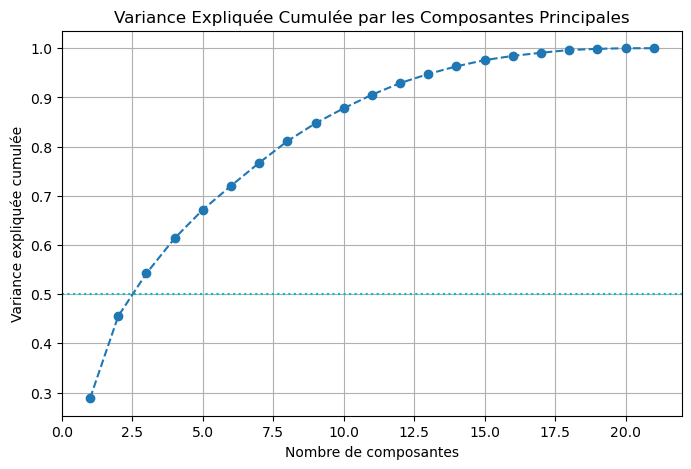


Variance expliquée par PC1: 28.85%
Variance expliquée par PC2: 16.70%
Variance totale expliquée par les 2 premières CP: 45.55%




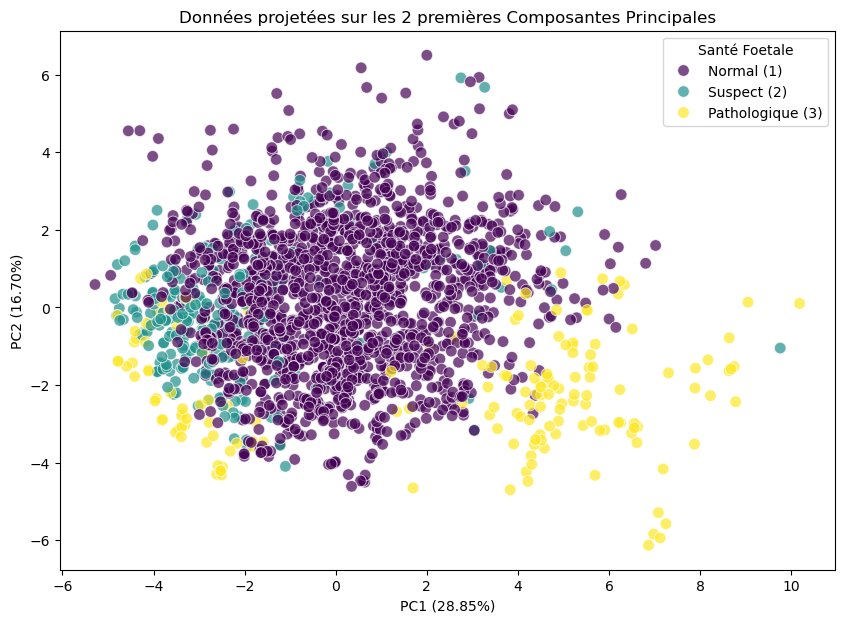

In [3]:
#Analyse en Composantes Principales (ACP)
pca_temp = PCA(random_state=42)
pca_temp.fit(X_scaled)
cumulative_explained_variance = np.cumsum(pca_temp.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Variance Expliquée Cumulée par les Composantes Principales')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulée')
plt.grid(True)
plt.axhline(y=0.50, color='c', linestyle=':', label='Seuil de 50% de variance')
plt.show()

# On voit que les 2 premières composantes capturent déjà une part significative de la variance 45.55%.
# Pour la visualisation, on va se concentrer sur ces 2 premières composantes.

pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(X_scaled)

print(f"\nVariance expliquée par PC1: {pca_2d.explained_variance_ratio_[0]*100:.2f}%")
print(f"Variance expliquée par PC2: {pca_2d.explained_variance_ratio_[1]*100:.2f}%")
print(f"Variance totale expliquée par les 2 premières CP: {sum(pca_2d.explained_variance_ratio_)*100:.2f}%")
print("\n" + "="*50 + "\n")

df_pca_2d = pd.DataFrame(data=X_pca_2d, columns=['PC1', 'PC2'])
df_pca_2d['fetal_health'] = df['fetal_health']

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='fetal_health', data=df_pca_2d, palette='viridis', alpha=0.7, s=70)
plt.title('Données projetées sur les 2 premières Composantes Principales')
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.2f}%)')

handles, labels = plt.gca().get_legend_handles_labels()
class_labels_map = {1: 'Normal (1)', 2: 'Suspect (2)', 3: 'Pathologique (3)'}
new_labels = [class_labels_map.get(int(float(label)), label) for label in labels]
plt.legend(handles, new_labels, title='Santé Foetale')
plt.show()

Cette visualisation nous aide à voir si les différentes classes de santé foetale forment des groupes distincts dans cet espace réduit à 2 dimensions.
On observe une certaine tendance à la séparation, mais aussi un chevauchement notable, ce qui suggère que ces deux seules composantes, bien qu'importantes,
ne capturent pas toute la complexité permettant une distinction parfaite des classes.


Variance expliquée par PC1: 28.85%
Variance expliquée par PC2: 16.70%
Variance expliquée par PC3: 8.69%
Variance totale expliquée par les 3 premières CP: 54.24%




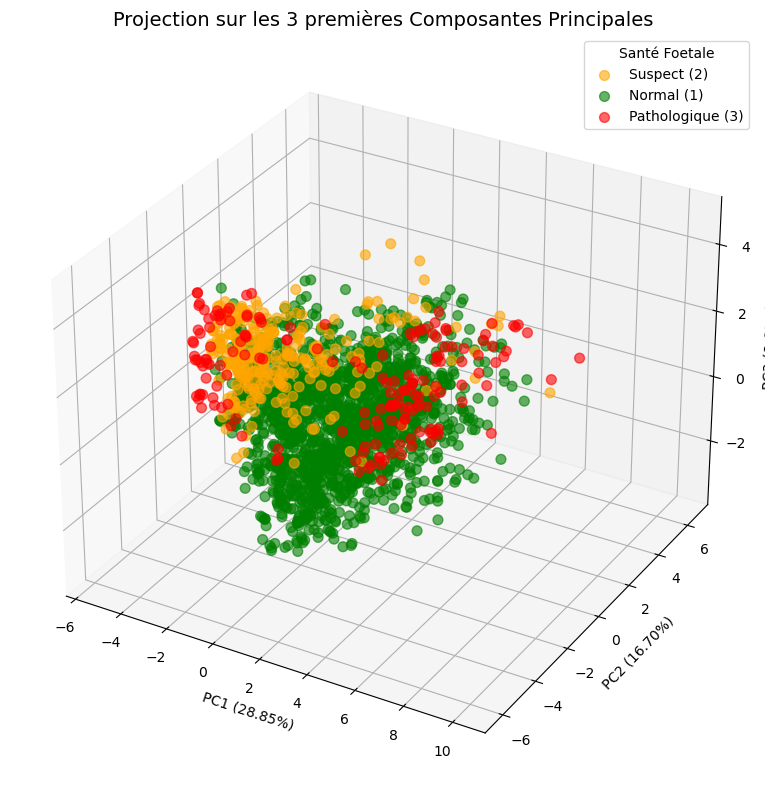

In [4]:
# Visualisation en 3D avec les 3 premières composantes principales
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3, random_state=42)
X_pca_3d = pca_3d.fit_transform(X_scaled)

print(f"\nVariance expliquée par PC1: {pca_3d.explained_variance_ratio_[0]*100:.2f}%")
print(f"Variance expliquée par PC2: {pca_3d.explained_variance_ratio_[1]*100:.2f}%")
print(f"Variance expliquée par PC3: {pca_3d.explained_variance_ratio_[2]*100:.2f}%")
print(f"Variance totale expliquée par les 3 premières CP: {sum(pca_3d.explained_variance_ratio_)*100:.2f}%")
print("\n" + "="*50 + "\n")

df_pca_3d = pd.DataFrame(data=X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
df_pca_3d['fetal_health'] = df['fetal_health']

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Définir les couleurs pour chaque classe
colors = {1: 'green', 2: 'orange', 3: 'red'}
labels_map = {1: 'Normal (1)', 2: 'Suspect (2)', 3: 'Pathologique (3)'}

for label in df_pca_3d['fetal_health'].unique():
    subset = df_pca_3d[df_pca_3d['fetal_health'] == label]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'],
               label=labels_map.get(label, str(label)),
               color=colors.get(label, 'gray'),
               alpha=0.6, s=50)

ax.set_title('Projection sur les 3 premières Composantes Principales', fontsize=14)
ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]*100:.2f}%)')
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]*100:.2f}%)')
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]*100:.2f}%)')
ax.legend(title='Santé Foetale')
plt.tight_layout()
plt.show()


Il est possible de visualiser les frontières de santé foetale en utilisant l'ACP en 2D et en 3D. Nous pourrons donc plus tard utiliser l'ACP pour faire les différentes techniques de classification définies en cours (Kmeans, KPPV, classification hiérarchique ...)

In [5]:
 # Séparer les features (X) de la variable cible (y)
X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

# Mise à l'échelle des features
# C'est important pour les algos sensibles à la magnitude des features (KMeans, kNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Aperçu des données après mise à l'échelle :")
print(X_scaled_df.head())


Aperçu des données après mise à l'échelle :
   baseline value  accelerations  fetal_movement  uterine_contractions  \
0       -1.352220      -0.822388        -0.20321             -1.482465   
1       -0.132526       0.730133        -0.20321              0.554627   
2       -0.030884      -0.046128        -0.20321              1.233657   
3        0.070757      -0.046128        -0.20321              1.233657   
4       -0.132526       0.988886        -0.20321              1.233657   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0            -0.638438             -0.057476                 -0.268754   
1             0.375243             -0.057476                 -0.268754   
2             0.375243             -0.057476                 -0.268754   
3             0.375243             -0.057476                 -0.268754   
4            -0.638438             -0.057476                 -0.268754   

   abnormal_short_term_variability  mean_value_of_short_term_varia

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, silhouette_score, adjusted_rand_score
import scipy.cluster.hierarchy as shc # Pour le dendrogramme

# K-means

Nous allons appliquer Kmeans sur nos données brutes.

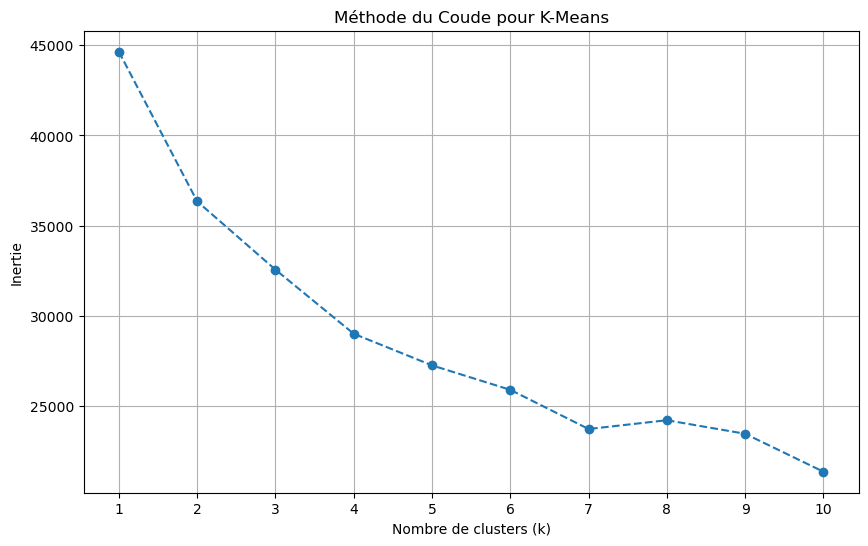

Tableau croisé entre les clusters K-Means et la vraie santé foetale :
cluster_kmeans    0    1    2
fetal_health                 
1.0             673  249  733
2.0             233   15   47
3.0              66  110    0


Score de Silhouette pour K-Means (k=3): 0.153
Adjusted Rand Index (ARI): 0.045




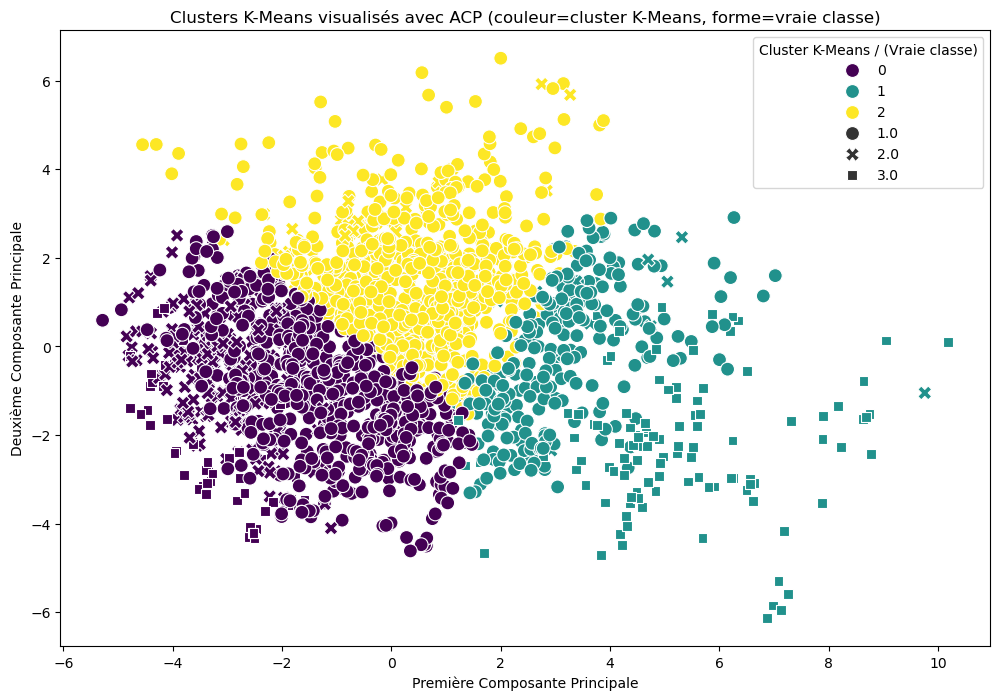

In [7]:
# Clustering (Analyse non supervisée)
# On applique K-Means pour voir si on peut trouver des groupes naturels dans les données.
# Idéalement, ces groupes pourraient correspondre aux classes de santé foetale.
# Détermination du nombre optimal de clusters avec la méthode du coude
inertia = []
k_range = range(1, 11) # On teste de 1 à 10 clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Méthode du Coude pour K-Means')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.xticks(k_range)
plt.grid(True)
plt.show()
# Le "coude" semble se situer autour de k=3 ou k=4.
# Puisque notre variable cible a 3 classes, essayons avec k=3.

# Application de K-Means avec k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X_scaled_df)

# Ajout des clusters au DataFrame original (non-scalé pour l'interprétation)
df_clustered = df.copy()
df_clustered['cluster_kmeans'] = clusters

# Comparaison des clusters K-Means avec la vraie variable 'fetal_health'
print("Tableau croisé entre les clusters K-Means et la vraie santé foetale :")
print(pd.crosstab(df_clustered['fetal_health'], df_clustered['cluster_kmeans']))
print("\n" + "="*50 + "\n")
# On peut voir une certaine correspondance, mais ce n'est pas parfait. Le clustering est non supervisé.

# Silhouette Score
if len(np.unique(clusters)) > 1:
    silhouette_avg = silhouette_score(X_scaled_df, clusters)
    print(f"Score de Silhouette pour K-Means (k=3): {silhouette_avg:.3f}")
    ari = adjusted_rand_score(df_clustered['fetal_health'], clusters)
    print(f"Adjusted Rand Index (ARI): {ari:.3f}")
else:
    print("Impossible de calculer le score de silhouette (pas assez de clusters uniques).")
print("\n" + "="*50 + "\n")


# Visualisation des clusters avec ACP pour réduire à 2 dimensions
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled_df)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', style=df['fetal_health'], s=100)
plt.title('Clusters K-Means visualisés avec ACP (couleur=cluster K-Means, forme=vraie classe)')
plt.xlabel('Première Composante Principale')
plt.ylabel('Deuxième Composante Principale')
plt.legend(title='Cluster K-Means / (Vraie classe)')
plt.show()



Ce KMeans effectué sur les données brutes ne donne pas des résultats significatifs.
Il n'est pas possible de différencier les classes grâce aux clusters issus du KMeans. LE score de solhouette est trop bas.

Top 5 features corrélées à 'fetal_health' : ['prolongued_decelerations', 'abnormal_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'accelerations', 'histogram_mode']

=== Crosstab fetal_health vs. cluster_kmeans ===
cluster_kmeans    0     1    2
fetal_health                  
1.0              26  1442  187
2.0              12    48  235
3.0             101     9   66

Silhouette Score (k=3): 0.337
Adjusted Rand Index (ARI): 0.550


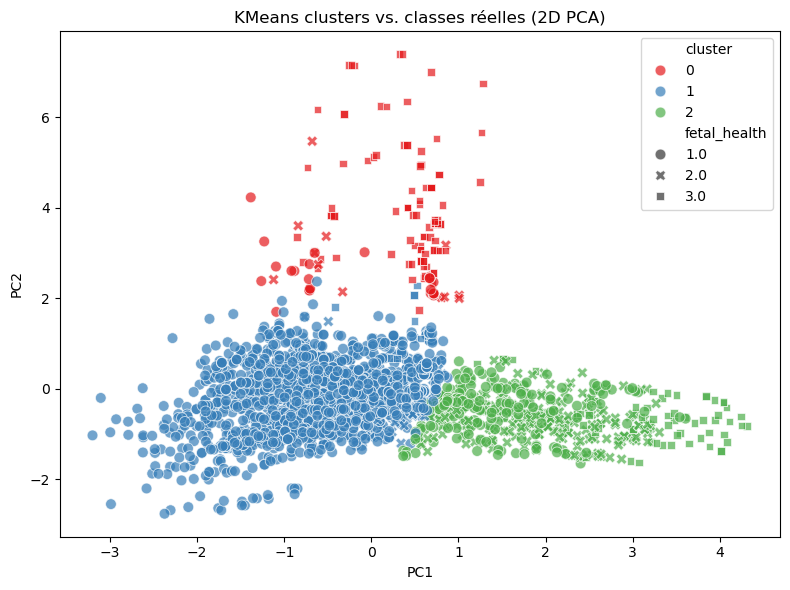

In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_clean(path):
    df = pd.read_csv(path)
    # Normaliser les noms de colonnes
    df.columns = df.columns.str.strip().str.replace(' ', '_')
    return df

def get_top_features(df, target_col, top_n=5):
    """Retourne la liste des top_n features les plus corrélées (valeur absolue) au target."""
    corr = df.corr()[target_col].abs().drop(target_col)
    return list(corr.sort_values(ascending=False).head(top_n).index)

def prepare_data(df, features):
    """
    - Sélectionne les features données,
    - Standardise,
    - Retourne X_scaled et y.
    """
    X = df[features]
    y = df['fetal_health']
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, y

def cluster_and_evaluate(X, y, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X)

    # Crosstab
    ctab = pd.crosstab(y, clusters, rownames=['fetal_health'], colnames=['cluster_kmeans'])
    print("\n=== Crosstab fetal_health vs. cluster_kmeans ===")
    print(ctab.to_string())

    # Silhouette
    sil = silhouette_score(X, clusters) if len(np.unique(clusters))>1 else np.nan
    ari = adjusted_rand_score(y, clusters)
    print(f"\nSilhouette Score (k={n_clusters}): {sil:.3f}")
    print(f"Adjusted Rand Index (ARI): {ari:.3f}")

    return clusters

def visualize_clusters_pca(X, clusters, y):
    # Always project to 2D for viz
    pca2 = PCA(n_components=2, random_state=42)
    X2 = pca2.fit_transform(X)
    df_vis = pd.DataFrame(X2, columns=['PC1','PC2'])
    df_vis['cluster'] = clusters
    df_vis['fetal_health'] = y.values

    plt.figure(figsize=(8,6))
    sns.scatterplot(
        data=df_vis, x='PC1', y='PC2',
        hue='cluster', style='fetal_health',
        palette='Set1', s=60, alpha=0.7
    )
    plt.title("KMeans clusters vs. classes réelles (2D PCA)")
    plt.tight_layout()
    plt.show()

def main():
    # 1) Chargement + nettoyage
    path = "fetal_health.csv"
    df = load_and_clean(path)

    # 2) Sélection automatique des top 5 features corrélées à fetal_health
    top_feats = get_top_features(df, target_col='fetal_health', top_n=5)
    print("Top 5 features corrélées à 'fetal_health' :", top_feats)

    # 3) Préparation des données
    X_scaled, y = prepare_data(df, features=top_feats)

    # 4) Clustering et évaluation
    clusters = cluster_and_evaluate(X_scaled, y, n_clusters=3)

    # 5) Visualisation via PCA
    visualize_clusters_pca(X_scaled, clusters, y)

if __name__ == "__main__":
    main()


Explication KMeans avec les 5 variables les plus corrélées:
Nous remarquons déjà une amélioration dans le score de silhouette on passe de O.15 à 0.33.
De plus, nous remarquons une meilleure cohérence entre les classes cibles et les clusters issus du KMeans.

Variance expliquée par les 10 composantes : 87.79%

=== Crosstab fetal_health vs. cluster_kmeans ===
cluster_kmeans    0     1    2
fetal_health                  
1.0             512  1035  108
2.0             245    35   15
3.0              63     4  109

Silhouette Score (k=3): 0.192
Adjusted Rand Index (ARI): 0.198


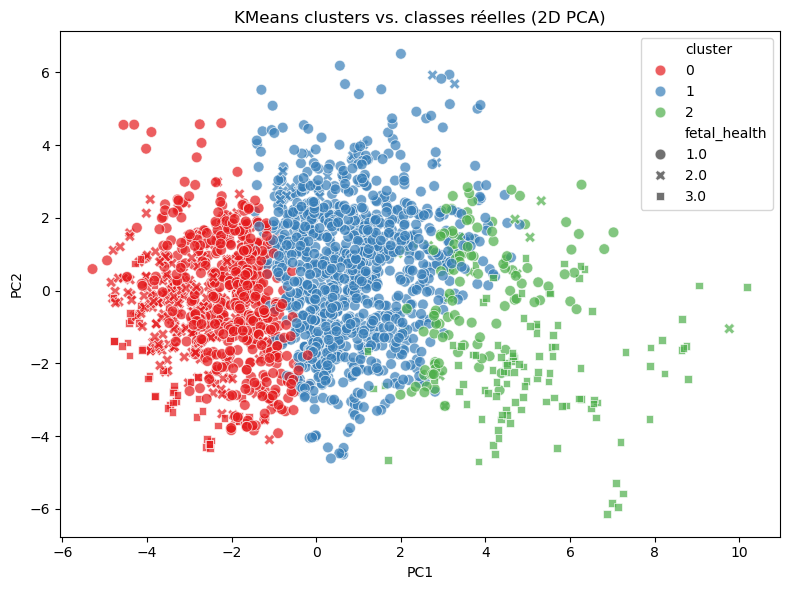

In [9]:
# Kmeans avec ACP

from sklearn.metrics import adjusted_rand_score
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_clean(path):
    df = pd.read_csv(path)
    df.columns = df.columns.str.strip().str.replace(' ', '_')
    return df

def prepare_data_with_pca(df, target_col='fetal_health', n_components=5):
    """
    - Enlève la colonne cible,
    - Standardise tout le dataset,
    - Applique une PCA et garde n_components premières composantes.
    """
    X = df.drop(columns=[target_col])
    y = df[target_col]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    pca = PCA(n_components=n_components, random_state=42)
    X_pca = pca.fit_transform(X_scaled)

    explained_var = np.sum(pca.explained_variance_ratio_)
    print(f"Variance expliquée par les {n_components} composantes : {explained_var:.2%}")

    return X_pca, y

def cluster_and_evaluate(X, y, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X)

    ctab = pd.crosstab(y, clusters, rownames=['fetal_health'], colnames=['cluster_kmeans'])
    print("\n=== Crosstab fetal_health vs. cluster_kmeans ===")
    print(ctab.to_string())

    sil = silhouette_score(X, clusters) if len(np.unique(clusters)) > 1 else np.nan
    ari = adjusted_rand_score(y, clusters)
    print(f"\nSilhouette Score (k={n_clusters}): {sil:.3f}")
    print(f"Adjusted Rand Index (ARI): {ari:.3f}")
    return clusters

def visualize_clusters_pca(X, clusters, y):
    pca2 = PCA(n_components=2, random_state=42)
    X2 = pca2.fit_transform(X)
    df_vis = pd.DataFrame(X2, columns=['PC1', 'PC2'])
    df_vis['cluster'] = clusters
    df_vis['fetal_health'] = y.values

    plt.figure(figsize=(8,6))
    sns.scatterplot(
        data=df_vis, x='PC1', y='PC2',
        hue='cluster', style='fetal_health',
        palette='Set1', s=60, alpha=0.7
    )
    plt.title("KMeans clusters vs. classes réelles (2D PCA)")
    plt.tight_layout()
    plt.show()

def main():
    path = "fetal_health.csv"
    df = load_and_clean(path)

    # 1) Préparation des données avec ACP
    X_pca, y = prepare_data_with_pca(df, target_col='fetal_health', n_components=10)

    # 2) Clustering et évaluation
    clusters = cluster_and_evaluate(X_pca, y, n_clusters=3)

    # 3) Visualisation (2D projection pour voir les clusters)
    visualize_clusters_pca(X_pca, clusters, y)



if __name__ == "__main__":
    main()


Kmeans adaptatifs:

Variance expliquée par les 10 composantes : 87.79%

=== Crosstab fetal_health vs. cluster_kmeans ===
cluster_kmeans    0     1    2
fetal_health                  
1.0             512  1035  108
2.0             245    35   15
3.0              63     4  109

Silhouette Score (k=3): 0.192
Adjusted Rand Index (ARI): 0.198


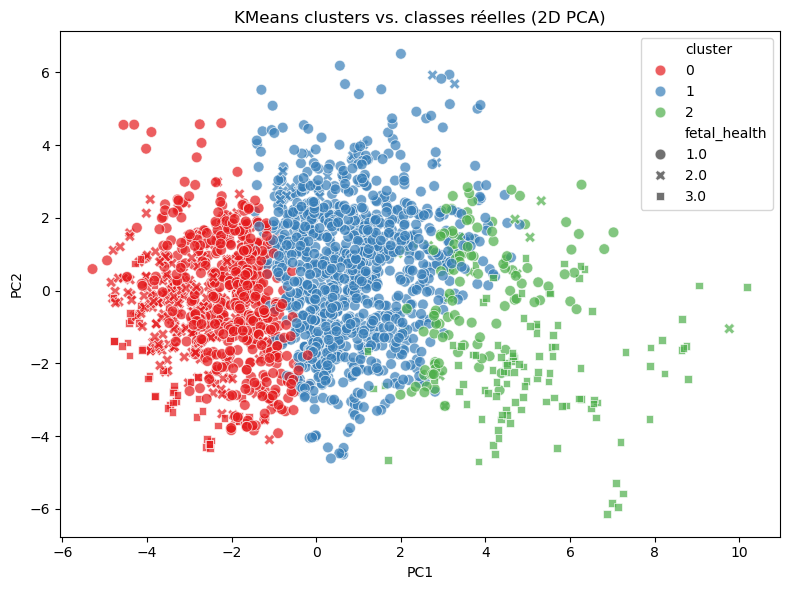

In [10]:
import numpy as np
from numpy import linalg
from scipy.spatial.distance import cdist
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.utils import check_array, check_random_state
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


class AdaptiveKMeans(ClusterMixin, BaseEstimator):
    def __init__(self, n_clusters=8, n_init=10, tol=1e-4, max_iter=300, random_state=None):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.tol = tol
        self.max_iter = max_iter
        self.random_state = check_random_state(random_state)

    def fit(self, X):
        X = check_array(X)

        n, p = X.shape
        n_init = self.n_init
        n_clusters = self.n_clusters
        max_iter = self.max_iter
        tol = self.tol

        centers_opt = None
        Vt_opt = None
        partition_opt = None
        d_opt = float("inf")

        for i in range(n_init):
            # Extraction des `n_clusters` centres pris aléatoirement
            # dans `X`. On utilisera `self.random_state.choice`.
            # <answer>
            centers_idx = self.random_state.choice(n, size=n_clusters, replace=False)
            centers = X[centers_idx, :]
            # </answer>

            # Initialisation des matrices de variance--covariance
            # brutes et normalisées
            # <answer>
            Vt = [np.eye(p) for i in range(n_clusters)]
            Vt_norm = [np.eye(p) for i in range(n_clusters)]
            # </answer>

            step = tol + 1
            it = 0

            while step > tol and it < max_iter:
                old_centers = centers

                # Calcul d'une nouvelle partition
                dist = np.concatenate(
                    [
                        cdist(c[None, :], X, metric="mahalanobis", VI=linalg.inv(V))
                        for c, V in zip(centers, Vt_norm)
                    ]
                )
                partition = np.argmin(dist, axis=0)

                # Mise à jour des paramètres
                for k in range(n_clusters):
                    # Extraction des individus de class k
                    # <answer>
                    Xk = X[partition == k, :]
                    # </answer>

                    # On évite les groupements dégénérés (trop peu de
                    # points pour inverser la matrice de
                    # variance--covariance empirique)
                    if Xk.shape[0] >= p:
                        # Calcul du k-ième centre
                        # <answer>
                        centers[k, :] = np.mean(Xk, axis=0)
                        # </answer>

                        # Calcul de la k-ième matrice de
                        # variance-covariance avec `np.cov`
                        # <answer>
                        c = np.cov(Xk, bias=True, rowvar=False)
                        # </answer>

                        # Régularisation de la matrice de covariance :
                        # on grossit la diagonale pour rendre la
                        # matrice inversible quoi qu'il arrive.
                        c += 1e-5 * np.eye(c.shape[0])
                        Vt[k] = c

                        # Calcul de la matrice de variance-covariance
                        # normalisée avec `linalg.det`
                        # <answer>
                        Vt_norm[k] = (linalg.det(c)) ** (-1 / p) * c
                        # </answer>

                step = ((old_centers - centers) ** 2).sum()
                it += 1

            # Calcul de `d_tot`. On pourra s'inspirer des instructions
            # permettant de calculer `dist` (voir plus haut).
            # <answer>
            d_tot = sum(
                (
                    cdist(
                        c[None, :],
                        X[partition == k, :],
                        metric="mahalanobis",
                        VI=linalg.inv(V),
                    )
                    ** 2
                ).sum()
                for k, (c, V) in enumerate(zip(centers, Vt_norm))
            )
            # </answer>

            # Mise à jour du modèle optimal si besoin
            if d_tot < d_opt:
                centers_opt = centers
                Vt_opt = Vt
                Vt_norm_opt = Vt_norm
                partition_opt = partition
                d_opt = d_tot

        self.labels_ = partition_opt
        self.cluster_centers_ = centers_opt
        self.covars_ = Vt_opt
        self.covars_norm_ = Vt_norm_opt
        self.d_opt = d_opt

def main_adaptive():
    # 1) Chargement
    path = "fetal_health.csv"
    df = pd.read_csv(path)
    df.columns = df.columns.str.strip().str.replace(' ', '_')

    # 2) Séparation X/y + standardisation
    y = df['fetal_health']
    X = df.drop(columns=['fetal_health'])
    X_scaled = StandardScaler().fit_transform(X)

    # 3) Réduction par ACP
    pca = PCA(n_components=5, random_state=42)
    X_pca = pca.fit_transform(X_scaled)

    print(f"Variance expliquée (5 premières composantes) : {np.sum(pca.explained_variance_ratio_):.2%}")

    # 4) Clustering adaptatif
    akm = AdaptiveKMeans(n_clusters=3, n_init=5, max_iter=100, random_state=42)
    akm.fit(X_pca)
    clusters = akm.labels_

    # 5) Évaluation
    ctab = pd.crosstab(y, clusters, rownames=['fetal_health'], colnames=['adaptive_cluster'])
    print("\n=== Crosstab fetal_health vs. adaptive_cluster ===")
    print(ctab.to_string())

    sil = silhouette_score(X_pca, clusters)
    print(f"\nSilhouette Score (adaptive KMeans, k=3) : {sil:.3f}")

    # 6) Visualisation
    pca2 = PCA(n_components=2)
    X2 = pca2.fit_transform(X_pca)
    df_vis = pd.DataFrame(X2, columns=["PC1", "PC2"])
    df_vis['cluster'] = clusters
    df_vis['fetal_health'] = y.values

    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df_vis, x="PC1", y="PC2", hue="cluster", style="fetal_health", palette="Set2", s=60)
    plt.title("Adaptive KMeans clusters vs. classes réelles (projection PCA 2D)")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
  main()



# CAH

--- Application de la Classification Ascendante Hiérarchique (CAH) ---


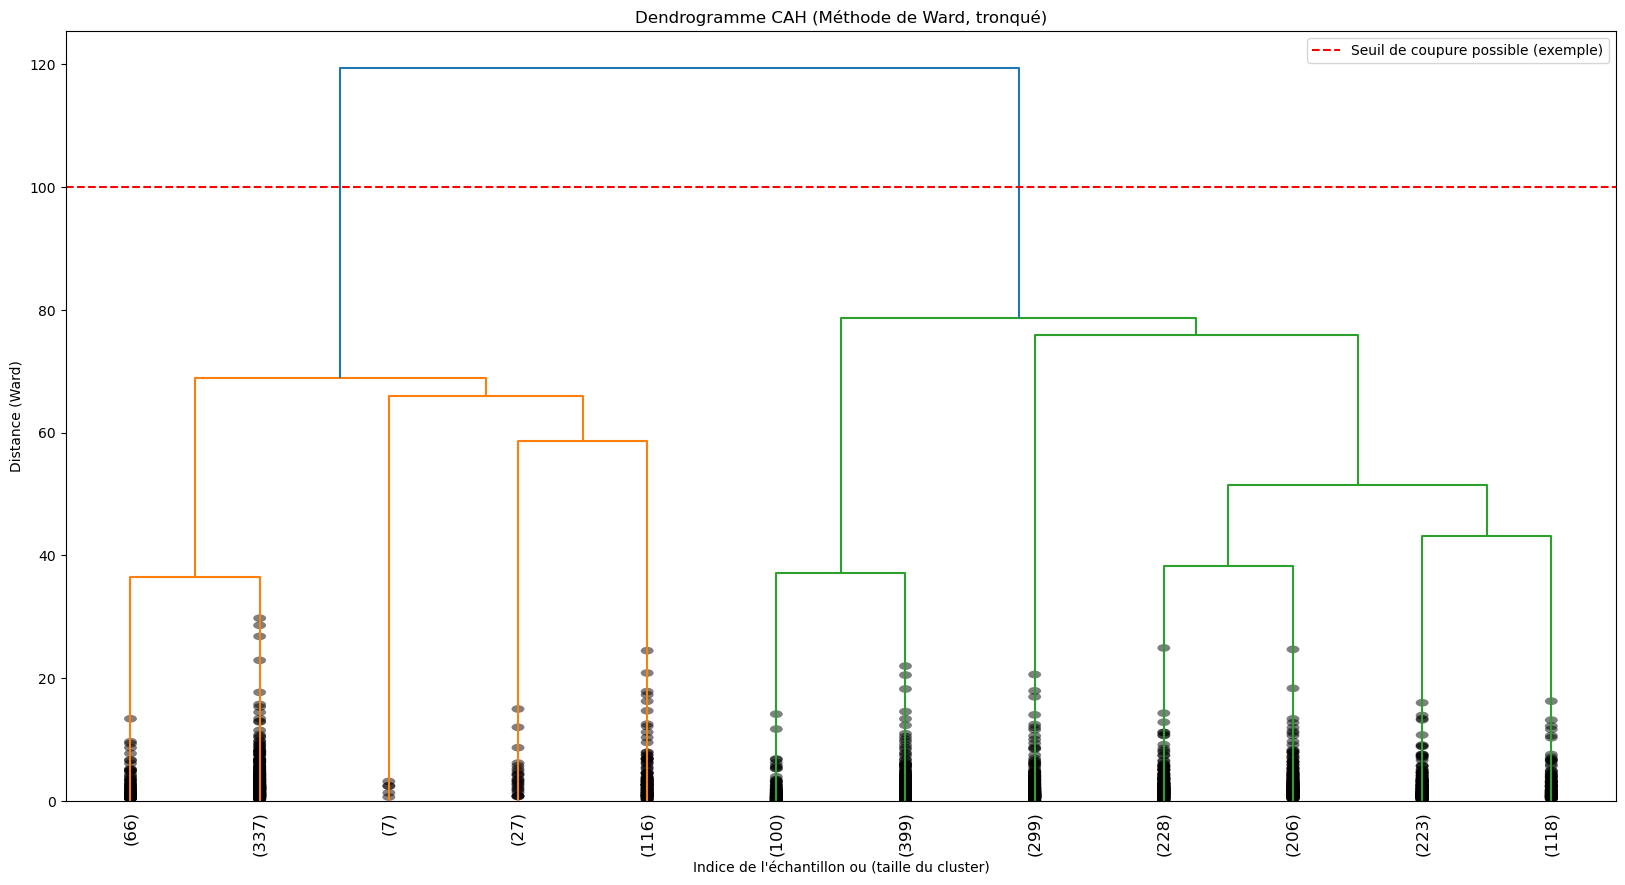

Tableau croisé CAH vs Santé Foetale:
cluster_cah     0    1    2
fetal_health               
1.0           976  426  253
2.0            94   17  184
3.0             4  110   62


Score de Silhouette CAH (k=3): 0.084
Indice de Rand Ajusté CAH (k=3): 0.147


In [11]:
#Classification Ascendante Hiérarchique (CAH)
print("--- Application de la Classification Ascendante Hiérarchique (CAH) ---")
# On va utiliser la méthode de Ward qui minimise la variance intra-cluster.
# On va aussi tronquer le dendrogramme pour une meilleure lisibilité.

plt.figure(figsize=(20, 10))
plt.title("Dendrogramme CAH (Méthode de Ward, tronqué)")
# truncate_mode='lastp' montre les p derniers clusters fusionnés.
# p=12 est un choix arbitraire pour la lisibilité.
linkage_matrix = shc.linkage(X_scaled_df, method='ward')
dend = shc.dendrogram(linkage_matrix,
                      truncate_mode='lastp',
                      p=12,
                      show_leaf_counts=True,
                      leaf_rotation=90.,
                      leaf_font_size=12.,
                      show_contracted=True) # Pour montrer les fusions
plt.xlabel("Indice de l'échantillon ou (taille du cluster)")
plt.ylabel("Distance (Ward)")
plt.axhline(y=100, color='r', linestyle='--', label='Seuil de coupure possible (exemple)') # Exemple de seuil
plt.legend()
plt.show()
# Le dendrogramme nous aide à visualiser les fusions successives des clusters.
# Choisir un seuil de coupure (la ligne rouge est un exemple) permet de déterminer le nombre de clusters.
# Si on coupe vers une distance de 100, on pourrait obtenir 2 ou 3 grands clusters.
# Essayons avec 3 clusters pour être cohérent avec K-Means et le problème.

# Application de la CAH avec AgglomerativeClustering de scikit-learn
# n_clusters=3 pour correspondre à notre hypothèse/cible
# linkage='ward' est une méthode courante
cah = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters_cah = cah.fit_predict(X_scaled_df)

df_clustered_cah = df.copy() # On repart du df original pour ne pas mélanger
df_clustered_cah['cluster_cah'] = clusters_cah
#df_clustered_cah['cluster_kmeans'] = clusters # On garde aussi les clusters k-means pour comparer

print("Tableau croisé CAH vs Santé Foetale:")
print(pd.crosstab(df_clustered_cah['fetal_health'], df_clustered_cah['cluster_cah']))
print("\n" + "="*50 + "\n")

# Score de Silhouette pour CAH
if len(np.unique(clusters_cah)) > 1:
    silhouette_cah = silhouette_score(X_scaled_df, clusters_cah)
    print(f"Score de Silhouette CAH (k=3): {silhouette_cah:.3f}")
    ari_cah = adjusted_rand_score(df['fetal_health'], clusters_cah)
    print(f"Indice de Rand Ajusté CAH (k=3): {ari_cah:.3f}")

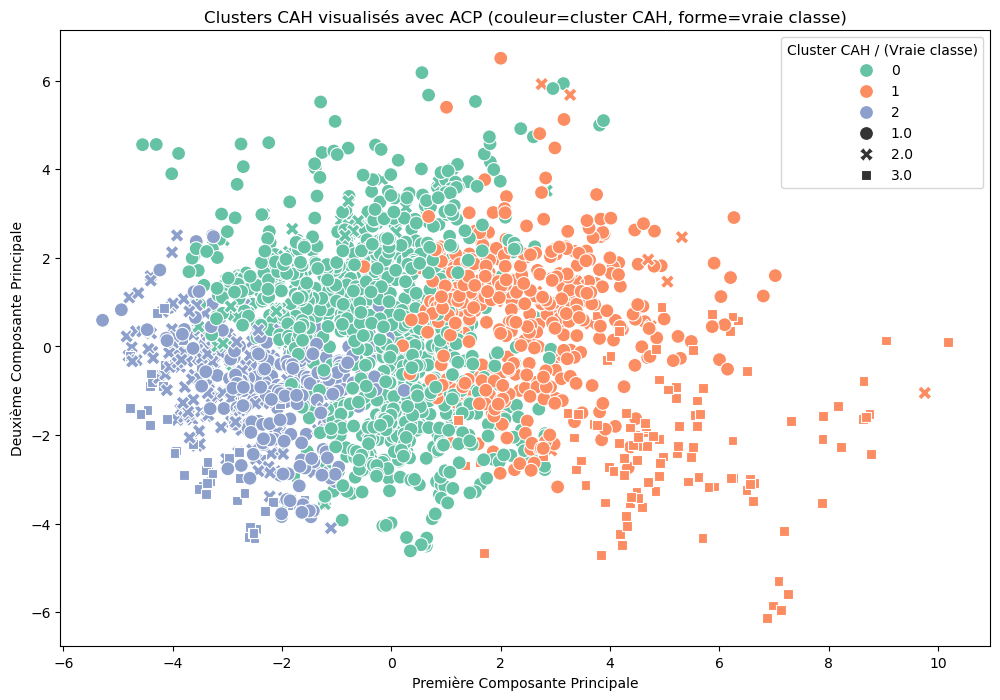

In [12]:
 # Visualisation des clusters CAH avec ACP (similaire à K-Means)
# On réutilise X_pca calculé précédemment
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters_cah, palette='Set2', style=df['fetal_health'], s=100)
plt.title('Clusters CAH visualisés avec ACP (couleur=cluster CAH, forme=vraie classe)')
plt.xlabel('Première Composante Principale')
plt.ylabel('Deuxième Composante Principale')
plt.legend(title='Cluster CAH / (Vraie classe)')
plt.show()

Nous remarquons que la CAH sur les données brutes donne un score de silhouette très bas ainsi que des clusters non cohérents avec nos classes initiales.
Ceci est dû à plusieurs raisons:
- Problème 1 : les clusters sont imbriqués et non hiérarchiques
Les 3 classes de fetal_health ne sont pas nécessairement bien séparées dans l'espace des variables. Certaines classes peuvent chevaucher les autres. Cela nuit aux regroupements successifs de la CAH.

- Problème 2 : la CAH ne gère pas bien les données bruitées ou non sphériques. Contrairement à des méthodes comme K-Means++, la CAH ne filtre pas les outliers. Elle est sensible au bruit dans les données. Elle ne s'adapte pas bien aux clusters en forme complexe ou allongée.

- Problème 3 : le nombre de dimensions. La CAH fonctionne mal quand on a trop de dimensions (ici : 21). En haute dimension, la notion de distance euclidienne devient peu discriminante (phénomène de "curse of dimensionality"). Cela peut faire que toutes les distances se ressemblent, donc les regroupements sont peu significatifs.

Afin de contourner le problème du fléau des dimensions, nous allons essayer d'appliquer la CAH sur les composantes principales issues de l'ACP, notamment les 6 premières.

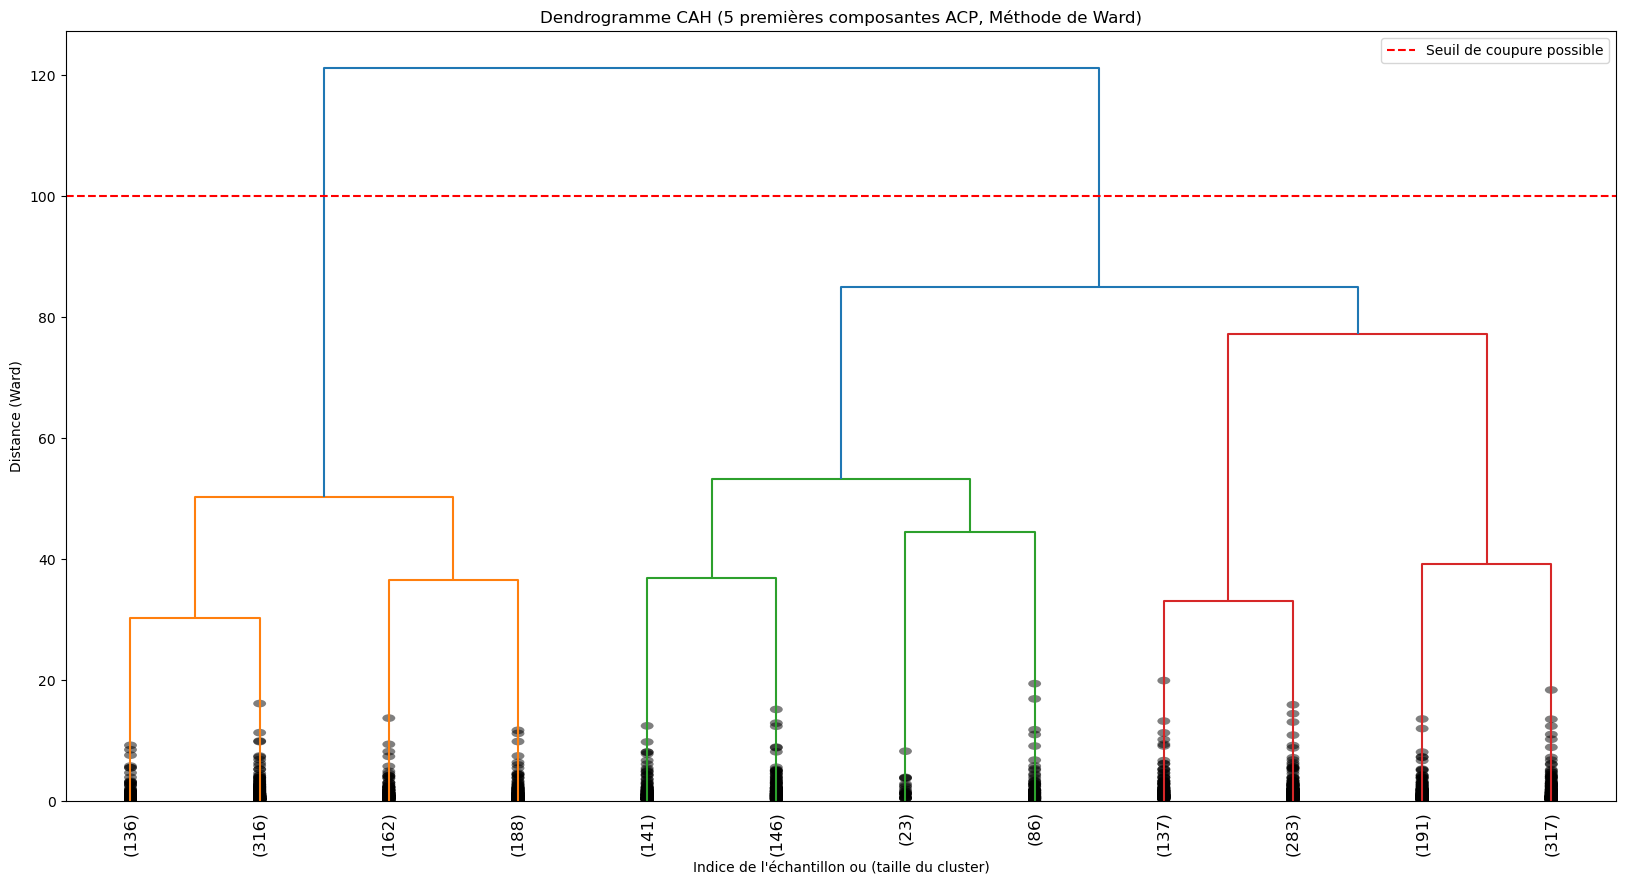

Tableau croisé CAH vs Santé Foetale:
cluster_cah     0    1    2
fetal_health               
1.0           893  491  271
2.0            31  249   15
3.0             4   62  110


Score de Silhouette CAH (k=3) avec 5 composantes ACP : 0.189
Indice de Rand Ajusté CAH (k=3): 0.116


In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd

# Étape 1 : Application de l'ACP sur X_scaled_df
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled_df)

# Facultatif : créer un DataFrame pour plus de lisibilité
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(5)])

# Étape 2 : Dendrogramme basé sur les 6 premières composantes principales
plt.figure(figsize=(20, 10))
plt.title("Dendrogramme CAH (5 premières composantes ACP, Méthode de Ward)")
linkage_matrix = shc.linkage(X_pca_df, method='ward')
dend = shc.dendrogram(linkage_matrix,
                      truncate_mode='lastp',
                      p=12,
                      show_leaf_counts=True,
                      leaf_rotation=90.,
                      leaf_font_size=12.,
                      show_contracted=True)
plt.axhline(y=100, color='r', linestyle='--', label='Seuil de coupure possible')
plt.xlabel("Indice de l'échantillon ou (taille du cluster)")
plt.ylabel("Distance (Ward)")
plt.legend()
plt.show()

# Étape 3 : Application de la CAH
cah = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters_cah = cah.fit_predict(X_pca_df)

# Étape 4 : Ajout au DataFrame original
df_clustered_cah = df.copy()
df_clustered_cah['cluster_cah'] = clusters_cah

# Étape 5 : Évaluation des clusters
print("Tableau croisé CAH vs Santé Foetale:")
print(pd.crosstab(df_clustered_cah['fetal_health'], df_clustered_cah['cluster_cah']))
print("\n" + "="*50 + "\n")

if len(np.unique(clusters_cah)) > 1:
    silhouette_cah = silhouette_score(X_pca_df, clusters_cah)
    print(f"Score de Silhouette CAH (k=3) avec 5 composantes ACP : {silhouette_cah:.3f}")
    ari_cah = adjusted_rand_score(df['fetal_health'], clusters_cah)
    print(f"Indice de Rand Ajusté CAH (k=3): {ari_cah:.3f}")

L'utilisation des 6 premières composantes principales (ACP) permet de réduire la dimension, supprimer la redondance (corrélations entre variables), et de préserver la majorité de l'information (variance).

Mais : Même après ACP, si les classes naturelles ne sont pas séparables linéairement, la CAH va continuer à faire des regroupements peu cohérents avec les vraies classes (fetal_health).

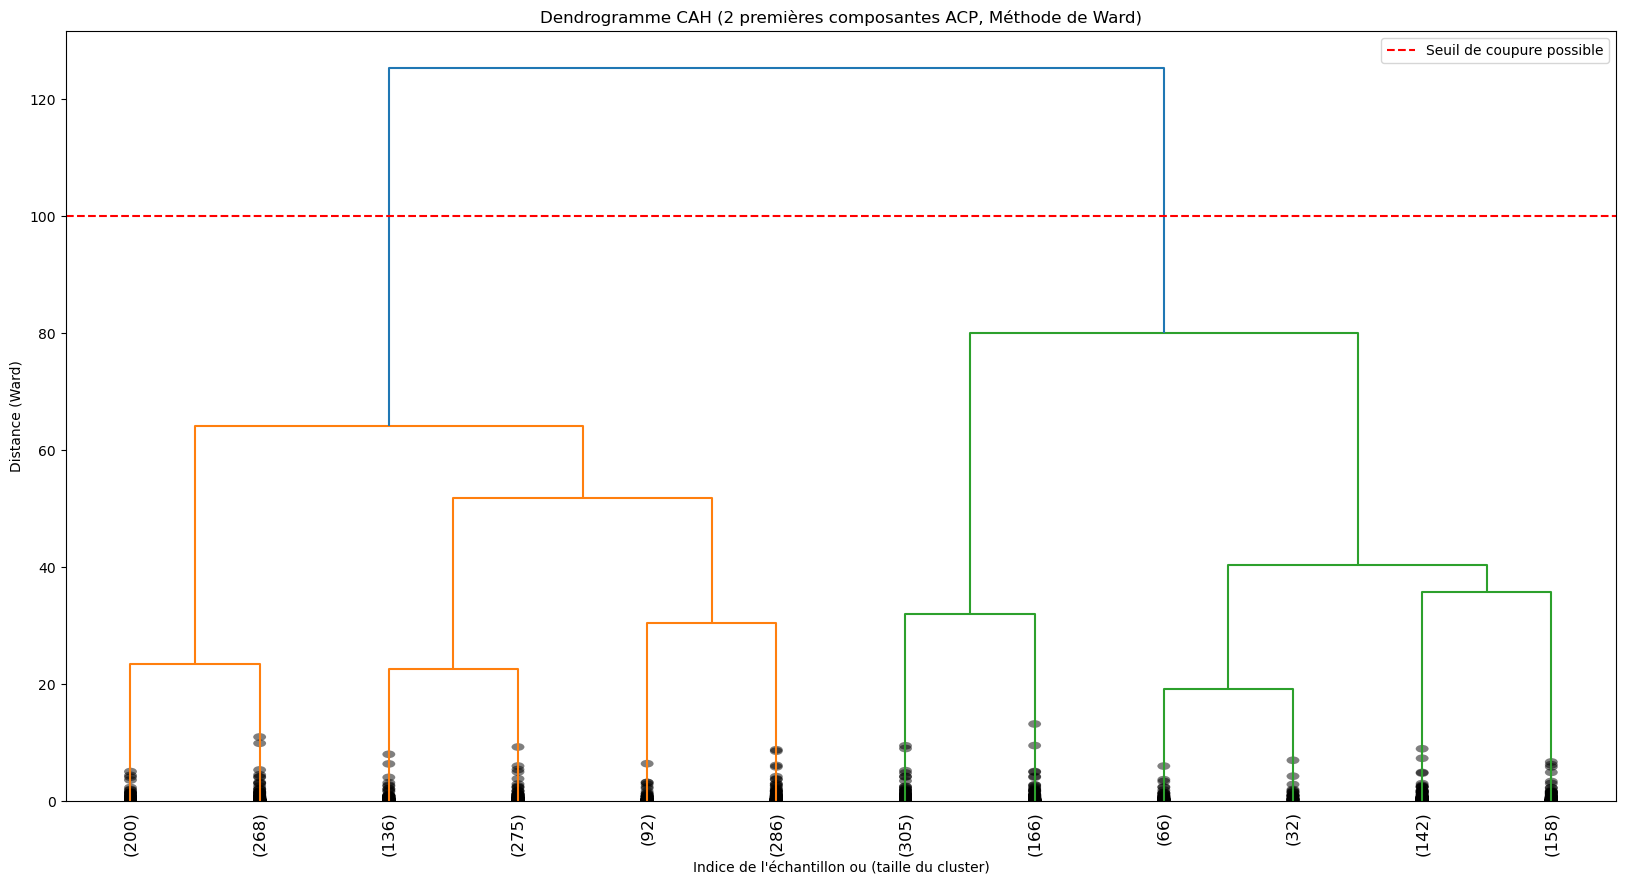

Tableau croisé CAH vs Santé Foetale:
cluster_cah     0    1    2
fetal_health               
1.0           933  278  444
2.0           256   12   27
3.0            68  108    0


Score de Silhouette CAH (k=3) avec 2 composantes ACP : 0.318


In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd

# Étape 1 : Application de l'ACP sur X_scaled_df
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_df)

# Facultatif : créer un DataFrame pour plus de lisibilité
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(2)])

# Étape 2 : Dendrogramme basé sur les 6 premières composantes principales
plt.figure(figsize=(20, 10))
plt.title("Dendrogramme CAH (2 premières composantes ACP, Méthode de Ward)")
linkage_matrix = shc.linkage(X_pca_df, method='ward')
dend = shc.dendrogram(linkage_matrix,
                      truncate_mode='lastp',
                      p=12,
                      show_leaf_counts=True,
                      leaf_rotation=90.,
                      leaf_font_size=12.,
                      show_contracted=True)
plt.axhline(y=100, color='r', linestyle='--', label='Seuil de coupure possible')
plt.xlabel("Indice de l'échantillon ou (taille du cluster)")
plt.ylabel("Distance (Ward)")
plt.legend()
plt.show()

# Étape 3 : Application de la CAH
cah = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters_cah = cah.fit_predict(X_pca_df)

# Étape 4 : Ajout au DataFrame original
df_clustered_cah = df.copy()
df_clustered_cah['cluster_cah'] = clusters_cah

# Étape 5 : Évaluation des clusters
print("Tableau croisé CAH vs Santé Foetale:")
print(pd.crosstab(df_clustered_cah['fetal_health'], df_clustered_cah['cluster_cah']))
print("\n" + "="*50 + "\n")

if len(np.unique(clusters_cah)) > 1:
    silhouette_cah = silhouette_score(X_pca_df, clusters_cah)
    print(f"Score de Silhouette CAH (k=3) avec 2 composantes ACP : {silhouette_cah:.3f}")


# K Plus proches voisins

Fitting 10 folds for each of 80 candidates, totalling 800 fits
Meilleurs paramètres trouvés : {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
Meilleur score cross-val (accuracy) : 0.922

=== Rapport de classification sur le test ===
                  precision    recall  f1-score   support

      Normal (1)       0.95      0.96      0.96       332
     Suspect (2)       0.69      0.69      0.69        59
Pathological (3)       0.84      0.77      0.81        35

        accuracy                           0.91       426
       macro avg       0.83      0.81      0.82       426
    weighted avg       0.91      0.91      0.91       426

Accuracy sur le test : 0.908

=== Matrice de confusion ===
          Pred_N=1  Pred_S=2  Pred_P=3
Vrai_N=1       319        11         2
Vrai_S=2        15        41         3
Vrai_P=3         1         7        27


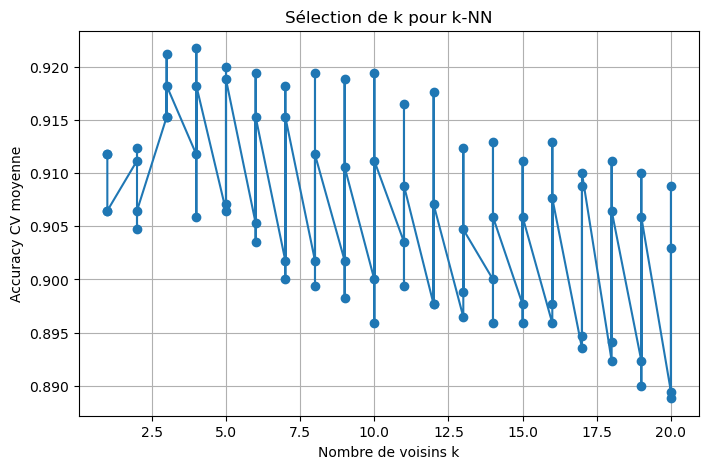

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# 1) Chargement et préparation des données
df = pd.read_csv("fetal_health.csv")
df.columns = df.columns.str.strip().str.replace(' ', '_')
X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

# 2) Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# 3) Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 4) Recherche du meilleur k et des meilleurs paramètres via GridSearchCV
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 = distance de Manhattan, 2 = Euclidienne
}
grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=10,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

print("Meilleurs paramètres trouvés :", grid.best_params_)
print(f"Meilleur score cross-val (accuracy) : {grid.best_score_:.3f}")

# 5) Évaluation sur l'ensemble de test
knn = grid.best_estimator_
y_pred = knn.predict(X_test)

print("\n=== Rapport de classification sur le test ===")
print(classification_report(
    y_test, y_pred,
    target_names=['Normal (1)', 'Suspect (2)', 'Pathological (3)']
))

acc = accuracy_score(y_test, y_pred)
print("Accuracy sur le test :", round(acc, 3))

print("\n=== Matrice de confusion ===")
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm,
    index=['Vrai_N=1','Vrai_S=2','Vrai_P=3'],
    columns=['Pred_N=1','Pred_S=2','Pred_P=3']
)
print(cm_df.to_string())

# 6) Optionnel : courbe d’évolution de l’accuracy en fonction de k
import matplotlib.pyplot as plt

scores = grid.cv_results_['mean_test_score']
k_list = grid.cv_results_['param_n_neighbors'].data

plt.figure(figsize=(8,5))
plt.plot(k_list, scores, marker='o')
plt.xlabel("Nombre de voisins k")
plt.ylabel("Accuracy CV moyenne")
plt.title("Sélection de k pour k-NN")
plt.grid(True)
plt.show()


Nous remarquons que nous avons déjà de meilleurs résultats avec la méthode des K plus proches voisins.
Nous effectuons d'abord une validation croisée afin de trouver le meilleur nombre de voisins à choisir pour notre modèle. Cette dernière nous donne k = 4.

L'application des KNN nous donne une bonne précision et un bon rappel pour la classe "individus sains" à savoir 0.95 et 0.96 respectivement.
En ce qui concerne la classe "suspects", la précision et le rappel sont tous deux à 0.69. La classe "pathologiques" a une précision de 0.84 et un rappel de 0.77. Ces deux dernières classes ne sont pas très bien représentées, et surtout la classe "suspects".
Ceci pourrait être dû au fait que certains cas "suspects" soient vraiment pathologiques et qu'ils soient donc très proches dans l'espace (résultats de CTG).
Une possibilité serait de regrouper les classes "pathologique" et "suspect".

Fitting 10 folds for each of 80 candidates, totalling 800 fits
Meilleurs paramètres trouvés : {'n_neighbors': 6, 'p': 1, 'weights': 'distance'}
Meilleur score cross-val (accuracy) : 0.935

=== Rapport de classification sur le test (binaire) ===
              precision    recall  f1-score   support

  Normal (0)       0.94      0.96      0.95       332
 Anormal (1)       0.86      0.77      0.81        94

    accuracy                           0.92       426
   macro avg       0.90      0.86      0.88       426
weighted avg       0.92      0.92      0.92       426

Accuracy sur le test : 0.92

=== Matrice de confusion ===
                Pred_Normal=0  Pred_Anormal=1
Vrai_Normal=0             320              12
Vrai_Anormal=1             22              72


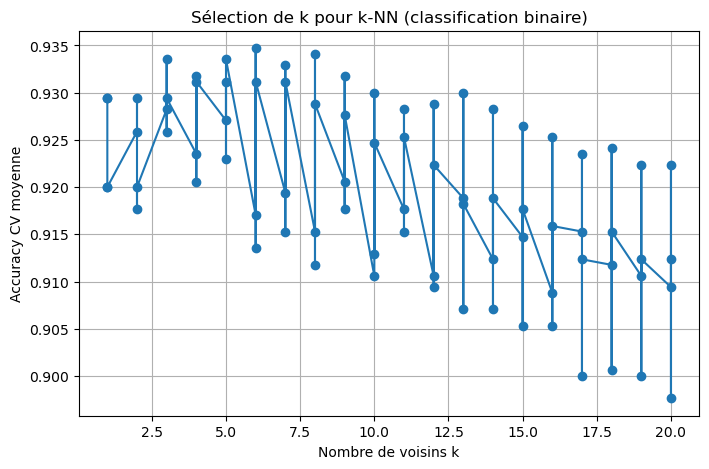

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1) Chargement et préparation des données
df = pd.read_csv("fetal_health.csv")
df.columns = df.columns.str.strip().str.replace(' ', '_')

# 2) Reclassification binaire : Normal (1) -> 0, Suspect (2) et Pathological (3) -> 1
X = df.drop('fetal_health', axis=1)
y = df['fetal_health'].replace({1: 0, 2: 1, 3: 1})  # 0 = Normal, 1 = Anormal

# 3) Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# 4) Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 5) Recherche du meilleur k et des meilleurs paramètres via GridSearchCV
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 = Manhattan, 2 = Euclidienne
}
grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=10,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

print("Meilleurs paramètres trouvés :", grid.best_params_)
print(f"Meilleur score cross-val (accuracy) : {grid.best_score_:.3f}")

# 6) Évaluation sur l'ensemble de test
knn = grid.best_estimator_
y_pred = knn.predict(X_test)

print("\n=== Rapport de classification sur le test (binaire) ===")
print(classification_report(
    y_test, y_pred,
    target_names=['Normal (0)', 'Anormal (1)']
))

acc = accuracy_score(y_test, y_pred)
print("Accuracy sur le test :", round(acc, 3))

print("\n=== Matrice de confusion ===")
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm,
    index=['Vrai_Normal=0', 'Vrai_Anormal=1'],
    columns=['Pred_Normal=0', 'Pred_Anormal=1']
)
print(cm_df.to_string())

# 7) Optionnel : courbe d’évolution de l’accuracy en fonction de k
scores = grid.cv_results_['mean_test_score']
k_list = grid.cv_results_['param_n_neighbors'].data

plt.figure(figsize=(8, 5))
plt.plot(k_list, scores, marker='o')
plt.xlabel("Nombre de voisins k")
plt.ylabel("Accuracy CV moyenne")
plt.title("Sélection de k pour k-NN (classification binaire)")
plt.grid(True)
plt.show()


# KNN avec ACP 5 à 12 CP

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# 1) Chargement et préparation des données
df = pd.read_csv("fetal_health.csv")
df.columns = df.columns.str.strip().str.replace(' ', '_')
X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

# 2) Split train/test avant toute transformation
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 3) Pipeline : Standardisation → ACP → k-NN
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(random_state=42)),
    ('knn', KNeighborsClassifier())
])

# 4) Grille de recherche :
#    - nombre de CP de 5 à 12
#    - paramètres k-NN comme avant
param_grid = {
    'pca__n_components': list(range(5, 13)),
    'knn__n_neighbors': list(range(1, 21)),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

grid = GridSearchCV(
    pipe,
    param_grid,
    cv=10,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# 5) Entraînement et recherche
grid.fit(X_train, y_train)

print("Meilleurs paramètres trouvés :", grid.best_params_)
print(f"Meilleur score cross-val (accuracy) : {grid.best_score_:.3f}")

# 6) Évaluation sur le test
best_pipe = grid.best_estimator_
y_pred = best_pipe.predict(X_test)

print("\n=== Rapport de classification sur le test ===")
print(classification_report(
    y_test, y_pred,
    target_names=['Normal (1)', 'Suspect (2)', 'Pathological (3)']
))

acc = accuracy_score(y_test, y_pred)
print("Accuracy sur le test :", round(acc, 3))

print("\n=== Matrice de confusion ===")
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm,
    index=['Vrai_N=1','Vrai_S=2','Vrai_P=3'],
    columns=['Pred_N=1','Pred_S=2','Pred_P=3']
)
print(cm_df.to_string())

# 7) Courbe d’évolution de l’accuracy en fonction du nombre de CP
results = pd.DataFrame(grid.cv_results_)
# On filtre pour ne garder que les scores moyens en fonction de n_components
mean_scores = (
    results
    .groupby('param_pca__n_components')['mean_test_score']
    .max()
    .reset_index()
)

plt.figure(figsize=(8,5))
plt.plot(
    mean_scores['param_pca__n_components'],
    mean_scores['mean_test_score'],
    marker='o'
)
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Accuracy CV moyenne")
plt.title("Performance k-NN selon n_components (5–12)")
plt.grid(True)
plt.show()


Fitting 10 folds for each of 640 candidates, totalling 6400 fits


KeyboardInterrupt: 

# Théorie bayésienne de la décision

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score
)

# 1) Chargement et préparation
df = pd.read_csv("fetal_health.csv")
# Normaliser les noms de colonnes
df.columns = df.columns.str.strip().str.replace(' ', '_')

X = df.drop("fetal_health", axis=1)
y = df["fetal_health"]

# Standardisation des features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split stratifié
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 2) Entraînement d'un Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# 3) Prédiction selon la règle MAP (maximiser p(y|x))
y_pred_map = gnb.predict(X_test)

print("=== Évaluation (règle MAP) ===")
print(classification_report(
    y_test, y_pred_map,
    target_names=["Normal (1)", "Suspect (2)", "Pathological (3)"]
))
acc_map = accuracy_score(y_test, y_pred_map)
print("Accuracy (MAP) :", round(acc_map, 3))

print("\nMatrice de confusion (MAP) :")
print(pd.DataFrame(
    confusion_matrix(y_test, y_pred_map),
    index=["Vrai_N=1","Vrai_S=2","Vrai_P=3"],
    columns=["Pred_N=1","Pred_S=2","Pred_P=3"]
).to_string())

# 4) Récupérer les probabilités a posteriori p(y=k|x)
proba = gnb.predict_proba(X_test)
print("\nPremières lignes de p(y|x) pour 5 exemples :")
print(pd.DataFrame(
    proba, columns=gnb.classes_
).head().to_string(index=False))

# 5) Règle de décision bayésienne avec matrice de pertes
cost_matrix = np.array([
    [0, 0.5, 2],  # Vrai Normal : prédire Suspect (0.5), Pathologique (2)
    [1, 0, 1],   # Vrai Suspect : prédire Normal (1), Pathologique (3)
    [5, 4, 0] # Vrai Pathologique : prédire Normal (5), Suspect (4)
])



# Calcul du risque (coût attendu) pour chaque classe de décision j :
# R(j|x) = sum_i p(y=i|x) * cost_matrix[i, j]
risks = proba.dot(cost_matrix)

# Décision : choisir j minimisant R(j|x)
y_pred_cost = gnb.classes_[np.argmin(risks, axis=1)]

print("\n=== Évaluation (règle coût-sensible) ===")
print(classification_report(
    y_test, y_pred_cost,
    target_names=["Normal (1)", "Suspect (2)", "Pathological (3)"]
))
acc_cost = accuracy_score(y_test, y_pred_cost)
print("Accuracy (coût-sensible) :", round(acc_cost, 3))

print("\nMatrice de confusion (coût-sensible) :")
print(pd.DataFrame(
    confusion_matrix(y_test, y_pred_cost),
    index=["Vrai_N=1","Vrai_S=2","Vrai_P=3"],
    columns=["Pred_N=1","Pred_S=2","Pred_P=3"]
).to_string())


=== Évaluation (règle MAP) ===
                  precision    recall  f1-score   support

      Normal (1)       0.97      0.85      0.91       332
     Suspect (2)       0.45      0.80      0.57        59
Pathological (3)       0.53      0.46      0.49        35

        accuracy                           0.81       426
       macro avg       0.65      0.70      0.66       426
    weighted avg       0.86      0.81      0.83       426

Accuracy (MAP) : 0.81

Matrice de confusion (MAP) :
          Pred_N=1  Pred_S=2  Pred_P=3
Vrai_N=1       282        42         8
Vrai_S=2         6        47         6
Vrai_P=3         3        16        16

Premières lignes de p(y|x) pour 5 exemples :
     1.0          2.0          3.0
1.000000 1.973610e-14 3.198469e-16
1.000000 3.518395e-55 6.300087e-31
1.000000 2.138694e-20 6.907415e-19
0.999968 3.209352e-05 2.962019e-09
0.996956 3.043833e-03 1.573096e-12

=== Évaluation (règle coût-sensible) ===
                  precision    recall  f1-score   supp

3.2 Théorie Bayésienne de la Décision

Après avoir constaté les limites des méthodes non supervisées et du k plus proches voisins (KPPV), nous avons exploré la Théorie Bayésienne de la Décision à travers un classifieur Naïve Bayes Gaussien (GNB). Cette approche permet non seulement de prédire la classe la plus probable grâce à la règle du Maximum A Posteriori (MAP), mais aussi de prendre en compte les coûts liés aux erreurs de classification, ce qui est crucial en contexte médical, où certaines erreurs peuvent avoir de lourdes conséquences.

3.2.1 Classification selon la règle MAP

Dans un premier temps, nous avons entraîné le modèle GNB selon la règle MAP. Le modèle atteint une précision globale de 81 %. Il se montre particulièrement performant pour détecter les cas "Normaux" (précision 0.97, rappel 0.85). En revanche, il peine à bien classifier les cas "Suspects" (précision 0.45, rappel 0.80) et "Pathologiques" (précision 0.53, rappel 0.46).

La matrice de confusion illustre bien ces difficultés :

Parmi 332 cas "Normaux", 282 sont correctement prédits, mais 42 sont classés à tort comme "Suspects", et 8 comme "Pathologiques".

Sur 59 cas "Suspects", 47 sont bien détectés, mais 6 sont pris pour "Normaux" et 6 pour "Pathologiques".

Sur 35 cas "Pathologiques", seuls 16 sont correctement identifiés ; 3 sont gravement mal classés comme "Normaux", et 16 comme "Suspects".

Ces résultats montrent les limites du modèle face au chevauchement entre les classes, notamment entre les cas à risque.

3.2.2 Classification avec prise en compte des coûts

Pour réduire les erreurs les plus graves, nous avons ensuite introduit une matrice de coûts dans la prise de décision. Cette matrice attribue un poids plus élevé aux erreurs critiques, par exemple lorsqu’un cas "Pathologique" est classé comme "Normal" (coût 5) :

[[0, 0.5, 2],   # Vrai Normal : coût faible si erreur

 [1, 0, 3],     # Vrai Suspect : erreur plus pénalisée

 [5, 4, 0]]     # Vrai Pathologique : erreurs fortement pénalisées

Cette approche fait baisser légèrement la précision globale à 80.3 %, mais oriente le modèle vers des décisions plus prudentes. Le modèle accepte de classer davantage de cas "Normaux" comme "Suspects" (46 contre 42 précédemment) afin de réduire le risque de sous-estimer un cas sérieux. Le rappel de la classe "Suspect" s'améliore légèrement (de 0.80 à 0.81), tandis que les performances sur la classe "Pathologique" restent stables (rappel 0.46, précision 0.53).

La nouvelle matrice de confusion montre une stratégie différente : le modèle préfère surestimer le risque (faux positifs) plutôt que de passer à côté d’un cas grave. Cela se traduit par une réduction des erreurs critiques, ce qui est bien plus adapté au domaine médical.

Même si l’accuracy globale est un peu plus basse, l’approche coût-sensible est mieux adaptée à la réalité clinique. Elle permet de hiérarchiser les erreurs : mieux vaut suspecter à tort une pathologie que de la manquer. Ce compromis entre précision globale et sécurité des patients en fait une stratégie plus réaliste et responsable en médecine.

# Analyse discriminante linéaire et quadratique

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1) Chargement et préparation
df = pd.read_csv("fetal_health.csv")
df.columns = df.columns.str.strip().str.replace(" ", "_")
X = df.drop("fetal_health", axis=1)
y = df["fetal_health"]

# 2) Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3) Split train/test (80/20 stratifié)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 4) LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

print("=== LDA : Rapport de classification ===")
print(classification_report(
    y_test, y_pred_lda,
    target_names=["Normal (1)", "Suspect (2)", "Pathological (3)"]
))
acc_lda = accuracy_score(y_test, y_pred_lda)
print("Accuracy LDA :", round(acc_lda, 3))
print("\nMatrice de confusion LDA :")
print(pd.DataFrame(
    confusion_matrix(y_test, y_pred_lda),
    index=["Vrai_N=1","Vrai_S=2","Vrai_P=3"],
    columns=["Pred_N=1","Pred_S=2","Pred_P=3"]
).to_string())

# 5) QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)

print("\n=== QDA : Rapport de classification ===")
print(classification_report(
    y_test, y_pred_qda,
    target_names=["Normal (1)", "Suspect (2)", "Pathological (3)"]
))
acc_qda = accuracy_score(y_test, y_pred_qda)
print("Accuracy QDA :", round(acc_qda, 3))
print("\nMatrice de confusion QDA :")
print(pd.DataFrame(
    confusion_matrix(y_test, y_pred_qda),
    index=["Vrai_N=1","Vrai_S=2","Vrai_P=3"],
    columns=["Pred_N=1","Pred_S=2","Pred_P=3"]
).to_string())


=== LDA : Rapport de classification ===
                  precision    recall  f1-score   support

      Normal (1)       0.93      0.95      0.94       332
     Suspect (2)       0.54      0.58      0.56        59
Pathological (3)       0.67      0.46      0.54        35

        accuracy                           0.86       426
       macro avg       0.71      0.66      0.68       426
    weighted avg       0.86      0.86      0.86       426

Accuracy LDA : 0.859

Matrice de confusion LDA :
          Pred_N=1  Pred_S=2  Pred_P=3
Vrai_N=1       316        13         3
Vrai_S=2        20        34         5
Vrai_P=3         3        16        16

=== QDA : Rapport de classification ===
                  precision    recall  f1-score   support

      Normal (1)       0.95      0.86      0.90       332
     Suspect (2)       0.44      0.81      0.57        59
Pathological (3)       0.76      0.37      0.50        35

        accuracy                           0.81       426
       macro 

/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


3.3 Analyse Discriminante Linéaire (ADL) et Quadratique (QDA)

Dans la lignée des approches supervisées, nous avons ensuite exploré l’Analyse Discriminante Linéaire (ADL) et Quadratique (QDA). Toutes deux reposent sur l’hypothèse que les données suivent une distribution normale.

Les données ont été standardisées et stratifiées pour garantir une distribution équilibrée lors de l'entraînement et du test.

3.3.1 Résultats de la ADL

Le modèle ADL affiche une précision globale de 85.9 %, ce qui en fait l’un des meilleurs modèles testés jusqu’ici. La classe "Normal" est très bien reconnue, avec 93 % de précision et 95 % de rappel. Cela signifie que la quasi-totalité des cas sains sont bien identifiés.

En revanche, les performances chutent pour les classes à risque :

La classe "Suspect" n’atteint que 54 % de précision et 58 % de rappel, ce qui indique des hésitations fréquentes du modèle.

La classe "Pathologique", bien plus critique, est correctement identifiée dans seulement 46 % des cas, avec 67 % de précision.

La matrice de confusion révèle notamment que près de la moitié des cas pathologiques (19 sur 35) sont mal classés, souvent en "Suspect", mais aussi parfois en "Normal", ce qui constitue une erreur grave en contexte médical.

3.3.2 Résultats de la QDA

Avec la QDA, l’objectif était d’exploiter la flexibilité accrue pour mieux séparer les classes complexes. Pourtant, ses performances globales sont légèrement en baisse, avec une précision globale de 81.2 %.

La classe "Normal" reste bien identifiée (95 % de précision, 86 % de rappel), et le rappel de la classe "Suspect" monte à 81 %, un net progrès par rapport à la ADL. Toutefois, cette amélioration se fait au détriment de la classe "Pathologique", pour laquelle le rappel tombe à 37 %, bien que la précision augmente à 76 %. ( !! rappel plus importnat que précision dans notre cas)

En clair, la QDA identifie mieux les cas suspects mais rate encore plus de cas pathologiques, avec 6 cas sur 35 classés à tort comme "Normaux", une erreur encore plus fréquente qu’avec la ADL.

La ADL se montre plus stable et plus adaptée à ce jeu de données. Malgré sa simplicité, elle offre un meilleur équilibre entre performance globale et sécurité. La QDA, plus complexe, échoue à mieux détecter les cas critiques, notamment les pathologies, probablement à cause de chevauchements importants entre classes. Ces résultats rappellent qu’un modèle plus complexe n’est pas toujours synonyme de meilleures performances, surtout quand il s’agit de prendre des décisions sensibles comme en médecine.

# Test sur nos données pour vérifier les hypotheses (l'hypothese de normalité ne passe pas)

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

# Re-création du DataFrame si besoin
X_train_df = pd.DataFrame(X_train, columns=X.columns)

alpha = 0.05
verdicts = []

for cls in np.unique(y_train):
    for col in X.columns:
        data = X_train_df[y_train == cls][col]
        stat, p_value = stats.shapiro(data)
        verdict = "Normale" if p_value > alpha else "Non normale"
        verdicts.append({
            "Classe": cls,
            "Variable": col,
            "Statistique": round(stat, 4),
            "p-value": round(p_value, 4),
            "Verdict (α=0.05)": verdict
        })

# Conversion en DataFrame pour affichage clair
result_df = pd.DataFrame(verdicts)
print(result_df.to_string(index=False))


 Classe                                               Variable  Statistique  p-value Verdict (α=0.05)
    1.0                                         baseline_value       0.9935   0.0000      Non normale
    1.0                                          accelerations       0.8841   0.0000      Non normale
    1.0                                         fetal_movement       0.1824   0.0000      Non normale
    1.0                                   uterine_contractions       0.9708   0.0000      Non normale
    1.0                                    light_decelerations       0.7190   0.0000      Non normale
    1.0                                   severe_decelerations       1.0000   1.0000          Normale
    1.0                               prolongued_decelerations       0.2001   0.0000      Non normale
    1.0                        abnormal_short_term_variability       0.9687   0.0000      Non normale
    1.0                   mean_value_of_short_term_variability       0.8634   0.00

In [ ]:
# Installation (à faire une seule fois dans votre environnement)
#! pip install pingouin

import pandas as pd
import pingouin as pg

# Supposons X_train issu de votre standardisation :
# X_train est un array NumPy ou un DataFrame pandas

# Si X_train est array :
df_train = pd.DataFrame(X_train, columns=X.columns)

# Test de Mardia + Henze–Zirkler
mv_test = pg.multivariate_normality(df_train, alpha=0.05)
print("Statistiques de Mardia (skew/kurtosis) et Henze–Zirkler :")
print(mv_test)


Statistiques de Mardia (skew/kurtosis) et Henze–Zirkler :
HZResults(hz=6800, pval=np.float64(0.0), normal=False)


# Test : Homoscedasticité (covariances égales), marche pas non plus

Box’s M régularisé = 20270.514
Degrés de liberté = 462
p-value = 0.0000
→ Rejet de H₀ : les covariances diffèrent significativement.


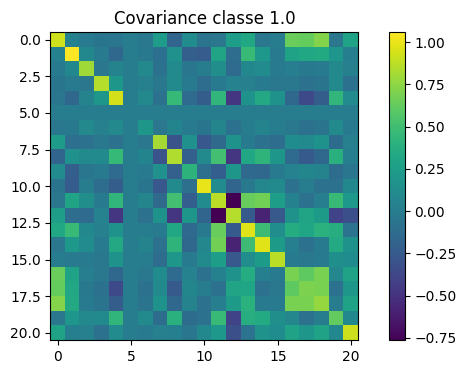

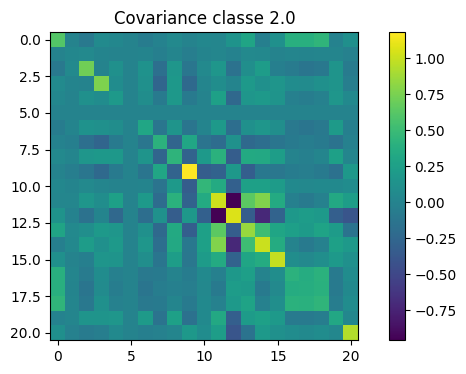

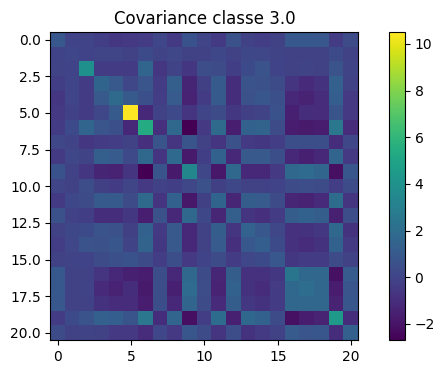

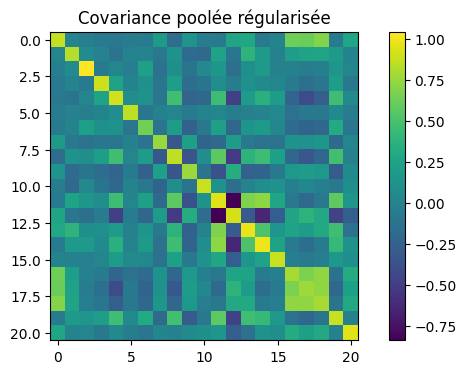

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2
import matplotlib.pyplot as plt

def box_m_test_regularized(X, y, epsilon=1e-6):
    """
    Test de Box’s M régularisé :
      - X : array (n_samples, n_features)
      - y : vecteur d’étiquettes
      - epsilon : petit boost diagonal pour la définition positive
    Retourne (M_corrigé, df, p-value, Spooled_reg)
    """
    classes = np.unique(y)
    p = X.shape[1]
    Ni, Si = [], []
    for cl in classes:
        Xi = X[y == cl]
        Ni.append(Xi.shape[0])
        Si.append(np.cov(Xi, rowvar=False))
    Ntot = sum(Ni)

    # covariance poolée non biaisée
    Spooled = sum((Ni[i] - 1) * Si[i] for i in range(len(classes))) / (Ntot - len(classes))
    # régularisation
    Spooled += epsilon * np.eye(p)

    sign_sp, logdet_sp = np.linalg.slogdet(Spooled)
    term1 = (Ntot - len(classes)) * logdet_sp
    term2 = sum((Ni[i] - 1) * np.linalg.slogdet(Si[i] + epsilon * np.eye(p))[1]
                for i in range(len(classes)))
    M = term1 - term2

    # correction de Bartlett
    c = (2*p**2 + 3*p - 1) / (6*(p+1)*(len(classes)-1))
    C = 1 - c * (sum(1/(Ni[i] - 1) for i in range(len(classes))) - 1/(Ntot - len(classes)))
    M_corr = M * C

    df = (len(classes) - 1) * p * (p + 1) / 2
    p_val = 1 - chi2.cdf(M_corr, df)
    return M_corr, int(df), p_val, Spooled

if __name__ == "__main__":
    # 1) Chargement des données (ajustez le chemin si besoin)
    df = pd.read_csv("fetal_health.csv")
    df.columns = df.columns.str.strip().str.replace(" ", "_")

    # 2) Séparation X/y et standardisation
    X = df.drop("fetal_health", axis=1).values
    y = df["fetal_health"].values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 3) Train/test split stratifié
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y
    )

    # 4) Calcul des covariances par classe
    classes = np.unique(y_train)
    covs = {}
    Ni = []
    for cl in classes:
        Xi = X_train[y_train == cl]
        covs[cl] = np.cov(Xi, rowvar=False)
        Ni.append(len(Xi))
    p = X_train.shape[1]

    # 5) Test de Box’s M régularisé
    M_stat, df_val, p_val, Spooled_reg = box_m_test_regularized(X_train, y_train, epsilon=1e-4)
    print(f"Box’s M régularisé = {M_stat:.3f}")
    print(f"Degrés de liberté = {df_val}")
    print(f"p-value = {p_val:.4f}")
    if p_val < 0.05:
        print("→ Rejet de H₀ : les covariances diffèrent significativement.")
    else:
        print("→ Pas de preuve de différence : on peut supposer l’homoscedasticité.")

    # 6) Affichage des heatmaps (une figure = une matrice)
    for cl in classes:
        plt.figure()
        plt.imshow(covs[cl])
        plt.title(f"Covariance classe {cl}")
        plt.colorbar()

    plt.figure()
    plt.imshow(Spooled_reg)
    plt.title("Covariance poolée régularisée")
    plt.colorbar()

    plt.show()


# Reg Logistique

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1) Chargement et préparation
df = pd.read_csv("fetal_health.csv")
df.columns = df.columns.str.strip().str.replace(" ", "_")
X = df.drop("fetal_health", axis=1)
y = df["fetal_health"]

# 2) Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3) Split train/test (80/20 stratifié)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 4) Régression Logistique multinomiale
logreg = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# 5) Évaluation
print("=== Régression Logistique : Rapport de classification ===")
print(classification_report(
    y_test, y_pred_logreg,
    target_names=["Normal (1)", "Suspect (2)", "Pathological (3)"]
))
acc_logreg = accuracy_score(y_test, y_pred_logreg)
print("Accuracy Logistique :", round(acc_logreg, 3))
print("\nMatrice de confusion :")
print(pd.DataFrame(
    confusion_matrix(y_test, y_pred_logreg),
    index=["Vrai_N=1", "Vrai_S=2", "Vrai_P=3"],
    columns=["Pred_N=1", "Pred_S=2", "Pred_P=3"]
).to_string())

# 6) Affichage des coefficients beta
import numpy as np

coef_df = pd.DataFrame(
    logreg.coef_,  # shape (n_classes, n_features)
    columns=X.columns,
    index=["Classe 1 (Normal)", "Classe 2 (Suspect)", "Classe 3 (Pathological)"]
)

print("\n=== Coefficients beta (log-odds) pour chaque classe ===")
print(coef_df.round(3))



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


=== Régression Logistique : Rapport de classification ===
                  precision    recall  f1-score   support

      Normal (1)       0.94      0.95      0.94       332
     Suspect (2)       0.61      0.68      0.64        59
Pathological (3)       0.88      0.66      0.75        35

        accuracy                           0.88       426
       macro avg       0.81      0.76      0.78       426
    weighted avg       0.89      0.88      0.89       426

Accuracy Logistique : 0.885

Matrice de confusion :
          Pred_N=1  Pred_S=2  Pred_P=3
Vrai_N=1       314        17         1
Vrai_S=2        17        40         2
Vrai_P=3         3         9        23

=== Coefficients beta (log-odds) pour chaque classe ===
                         baseline_value  accelerations  fetal_movement  \
Classe 1 (Normal)                -0.311          2.060          -0.407   
Classe 2 (Suspect)               -1.258         -1.413           0.015   
Classe 3 (Pathological)           1.569       

3.4 Régression Logistique

Poursuivant notre exploration des modèles supervisés, nous avons testé la Régression Logistique, un algorithme classique souvent sous-estimé, mais réputé pour sa robustesse et son efficacité, même dans des contextes multiclasse. Ici, nous avons utilisé sa version multinomiale, adaptée à notre tâche de classification en trois catégories.

Le modèle s’est montré particulièrement performant, avec une accuracy globale de 88.5 %, la plus élevée parmi tous les modèles testés jusqu’à présent.

La classe "Normal" est parfaitement maîtrisée : 94 % de précision, 95 % de rappel, et un f1-score de 0.94. Sur 332 cas, 314 sont correctement classés, avec seulement un cas confondu avec "Pathologique", ce qui souligne une quasi-absence de faux positifs critiques.

La classe "Suspect" affiche des performances respectables : 61 % de précision, 68 % de rappel, et un f1-score de 0.64. Le modèle parvient à détecter 40 cas sur 59, une amélioration nette par rapport à la LDA ou au KPPV.

La classe "Pathologique", la plus sensible en contexte médical, est identifiée avec 88 % de précision et 66 % de rappel, pour un f1-score de 0.75. Cela signifie que lorsque le modèle prédit un cas "Pathologique", il a souvent raison — mais il en manque encore près d’un tiers, ce qui reste perfectible.

Un aperçu des erreurs de la Matrice de confusion

Cas Normaux : très bien reconnus, moins de 6 % d'erreurs.

Cas Suspects : le modèle tend à les confondre avec la classe "Normale", mais les erreurs sont moins fréquentes que dans d'autres modèles.

Cas Pathologiques : 23 sur 35 correctement identifiés, mais 12 erreurs au total, dont 3 cas alarmants classés comme "Normaux".

La Régression Logistique combine simplicité et efficacité. Elle offre une excellente reconnaissance des cas sains, un bon équilibre pour la classe "Suspect", et une précision remarquable sur les cas pathologiques. Bien que le rappel sur la classe "Pathologique" reste à améliorer, ce modèle inspire confiance par sa capacité à minimiser les faux positifs critiques dans le domaine médical.

Reg log binaire

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1) Chargement et préparation
df = pd.read_csv("fetal_health.csv")
df.columns = df.columns.str.strip().str.replace(" ", "_")

X = df.drop("fetal_health", axis=1)

# Regroupement des classes : 0 = Normal, 1 = Malade (Suspect ou Pathologique)
y = df["fetal_health"].apply(lambda x: 0 if x == 1 else 1)

# 2) Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3) Split train/test (80/20 stratifié)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 4) Régression Logistique binaire
logreg = LogisticRegression(solver="lbfgs", max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# 5) Évaluation
print("=== Régression Logistique (binaire) : Rapport de classification ===")
print(classification_report(
    y_test, y_pred_logreg,
    target_names=["Normal (0)", "Malade (1)"]
))
acc_logreg = accuracy_score(y_test, y_pred_logreg)
print("Accuracy Logistique :", round(acc_logreg, 3))
print("\nMatrice de confusion :")
print(pd.DataFrame(
    confusion_matrix(y_test, y_pred_logreg),
    index=["Vrai_Normal", "Vrai_Malade"],
    columns=["Pred_Normal", "Pred_Malade"]
).to_string())

# 6) Affichage des coefficients beta
coef_df = pd.DataFrame(
    logreg.coef_[0],  # shape (n_features,)
    index=X.columns,
    columns=["Coefficient (Malade vs Normal)"]
)

print("\n=== Coefficients beta (log-odds) pour la classe 'Malade' ===")
print(coef_df.round(3).sort_values(by="Coefficient (Malade vs Normal)", ascending=False))


=== Régression Logistique (binaire) : Rapport de classification ===
              precision    recall  f1-score   support

  Normal (0)       0.95      0.93      0.94       332
  Malade (1)       0.78      0.82      0.80        94

    accuracy                           0.91       426
   macro avg       0.86      0.88      0.87       426
weighted avg       0.91      0.91      0.91       426

Accuracy Logistique : 0.908

Matrice de confusion :
             Pred_Normal  Pred_Malade
Vrai_Normal          310           22
Vrai_Malade           17           77

=== Coefficients beta (log-odds) pour la classe 'Malade' ===
                                                    Coefficient (Malade vs Normal)
prolongued_decelerations                                                     1.435
abnormal_short_term_variability                                              1.435
histogram_mean                                                               1.250
histogram_variance                           

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2

# --- 1. Chargement et préparation ---
# Assurez-vous que le fichier "fetal_health (3).csv" est accessible
# dans votre environnement.
try:
    df = pd.read_csv("fetal_health.csv")
except FileNotFoundError:
    print("Erreur : Le fichier 'fetal_health (3).csv' est introuvable.")
    print("Veuillez vérifier le chemin d'accès et le nom du fichier.")
    # Quitter si le fichier n'est pas trouvé
    exit()

# Préparation des données comme dans votre code initial
df.columns = df.columns.str.strip().str.replace(" ", "_")
X = df.drop("fetal_health", axis=1)
# La variable cible y doit commencer à 0 pour MNLogit, on soustrait donc 1
y = df["fetal_health"] - 1

# Sauvegarde des noms de colonnes pour les résultats
feature_names = X.columns

# Standardisation des variables explicatives
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ajout d'une constante pour l'intercept (requis par statsmodels)
X_scaled_const = sm.add_constant(X_scaled, prepend=True)

# Conversion en DataFrame pour garder les noms de colonnes
X_scaled_const_df = pd.DataFrame(X_scaled_const, columns=['const'] + list(feature_names))

# --- 2. Ajustement du modèle complet ---
# Ajustement du modèle logistique multinomial complet
full_model = sm.MNLogit(y, X_scaled_const_df)
full_model_results = full_model.fit(disp=0) # disp=0 pour cacher les logs de convergence

# Log-vraisemblance du modèle complet pour le test LR
log_likelihood_full = full_model_results.llf

# --- 3. Test de Wald ---
print("="*35 + " Test de Wald " + "="*35)
print("Le tableau ci-dessous montre les coefficients (coef), leurs erreurs standard (std err),")
print("les z-scores (statistique de Wald) et les p-values associées (P>|z|).")
print("Une p-value < 0.05 indique qu'une variable est statistiquement significative.\n")
# La fonction summary() de statsmodels génère directement le rapport du test de Wald
print(full_model_results.summary())


# --- 4. Test du Rapport de Vraisemblance (Likelihood-Ratio Test) ---
print("\n" + "="*25 + " Test du Rapport de Vraisemblance (LR Test) " + "="*25)

lr_test_results = []

# On teste l'effet de l'omission de chaque variable, une par une
for col_name in feature_names:
    # Création d'un jeu de données sans la variable 'col_name'
    X_reduced = X_scaled_const_df.drop(columns=col_name)

    # Ajustement du modèle réduit (sans la variable)
    reduced_model = sm.MNLogit(y, X_reduced)
    reduced_model_results = reduced_model.fit(disp=0)

    # Log-vraisemblance du modèle réduit
    log_likelihood_reduced = reduced_model_results.llf

    # Le nombre de degrés de liberté est le nombre de classes - 1
    degrees_of_freedom = y.nunique() - 1
    # Calcul de la statistique du rapport de vraisemblance
    lr_statistic = -2 * (log_likelihood_reduced - log_likelihood_full)

    # Calcul de la p-value à partir de la distribution du chi-carré
    p_value = chi2.sf(lr_statistic, df=degrees_of_freedom)

    lr_test_results.append({
        "Variable Omise": col_name,
        "Log-Likelihood (Modèle Réduit)": log_likelihood_reduced,
        "Statistique LR": lr_statistic,
        "P-value": p_value
    })

# Affichage des résultats du test LR dans un DataFrame
lr_df = pd.DataFrame(lr_test_results)
lr_df_sorted = lr_df.sort_values(by="P-value")

print(f"\nLog-Vraisemblance du modèle complet : {log_likelihood_full:.4f}\n")
print("Le tableau ci-dessous montre l'impact de l'omission de chaque variable.")
print("Une p-value < 0.05 indique que la variable contribue de manière significative au modèle.\n")
print(lr_df_sorted.to_string())

/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:3027: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:3028: RuntimeWarning: invalid value encountered in divide
  return eXB/eXB.sum(1)[:,None]
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


=================================== Test de Wald ===================================
Le tableau ci-dessous montre les coefficients (coef), leurs erreurs standard (std err),
les z-scores (statistique de Wald) et les p-values associées (P>|z|).
Une p-value < 0.05 indique qu'une variable est statistiquement significative.

                          MNLogit Regression Results                          
Dep. Variable:           fetal_health   No. Observations:                 2126
Model:                        MNLogit   Df Residuals:                     2084
Method:                           MLE   Df Model:                           40
Date:                Wed, 18 Jun 2025   Pseudo R-squ.:                     nan
Time:                        12:02:08   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -1435.6
Covariance Type:            nonrobust   LLR p-value:                       nan
                                        fetal_

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op


Log-Vraisemblance du modèle complet : nan

Le tableau ci-dessous montre l'impact de l'omission de chaque variable.
Une p-value < 0.05 indique que la variable contribue de manière significative au modèle.

                                            Variable Omise  Log-Likelihood (Modèle Réduit)  Statistique LR  P-value
0                                           baseline_value                     -472.958816             NaN      NaN
1                                            accelerations                     -533.602724             NaN      NaN
2                                           fetal_movement                     -462.746383             NaN      NaN
3                                     uterine_contractions                     -478.553848             NaN      NaN
4                                      light_decelerations                     -451.640704             NaN      NaN
5                                     severe_decelerations                     -451.976178        

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:3027: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:3028: RuntimeWarning: invalid value encountered in divide
  return eXB/eXB.sum(1)[:,None]
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pourquoi les Tests de Significativité (Wald, LR) ont Échoué ?
Votre intuition dans l'analyse exploratoire était parfaitement correcte. Le problème est la multicolinéarité.

Le problème de la redondance : Vous avez noté que des variables comme histogram_mean, histogram_median, et histogram_mode sont corrélées à plus de 0.9. Pour un modèle statistique, c'est comme avoir trois personnes qui crient exactement la même information en même temps. Le modèle est incapable de savoir quelle personne est la "vraie" source de l'information et ne peut donc pas attribuer un poids (coefficient) stable et fiable à chacune.

scikit-learn vs statsmodels :

scikit-learn (robuste) : Par défaut, LogisticRegression applique une pénalisation L2 (régularisation). Cette technique ajoute une petite "contrainte" qui force les coefficients des variables redondantes à rester petits, ce qui stabilise le modèle et lui permet de converger vers une solution fiable, même en présence de multicolinéarité. C'est pourquoi votre premier code a fonctionné.
statsmodels (statistiquement pur) : MNLogit tente de calculer la solution exacte du maximum de vraisemblance sans régularisation par défaut. Face à une forte multicolinéarité, les calculs deviennent numériquement instables (d'où les erreurs overflow encountered in exp). Le modèle n'arrive pas à converger, et les résultats (coefficients, erreurs standard, p-values) sont des NaN (Not a Number).
En résumé, l'échec n'est pas une erreur de votre part, mais la confirmation statistique que vos variables sont trop corrélées pour ce type d'analyse "pure".

Synthèse et Prochaines Étapes
Votre analyse est très complète et suit une démarche logique, allant du non supervisé au supervisé, et en comparant plusieurs algorithmes. La régression logistique semble être l'un des meilleurs candidats.

Pour obtenir les tests de significativité que vous souhaitez, voici ce que vous pouvez faire :

Sélectionner les variables manuellement (approche recommandée) : C'est la solution la plus simple et la plus interprétable. Puisque histogram_mean, histogram_median, et histogram_mode sont redondantes, n'en gardez qu'une seule (par exemple, histogram_mean). Refaites de même pour les autres groupes de variables très corrélées. Relancez ensuite votre code statsmodels sur ce jeu de données réduit. Les calculs devraient converger et vous donner des p-values interprétables.

Utiliser l'Analyse en Composantes Principales (ACP) : Vous avez déjà utilisé l'ACP pour la visualisation. Vous pourriez entraîner votre régression logistique non pas sur les variables brutes, mais sur les 5 ou 10 premières composantes principales. Comme les composantes sont orthogonales (non corrélées) par définition, le problème de multicolinéarité disparaît. L'inconvénient est que l'interprétation des coefficients devient plus complexe ("l'impact de la PC1" est moins direct que "l'impact des accélérations").

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2

# --- 1. Chargement et préparation ---
# Assurez-vous que le chemin vers votre fichier est correct
path = "fetal_health.csv"
try:
    df = pd.read_csv(path)
except FileNotFoundError:
    print(f"Erreur : Fichier non trouvé à l'adresse '{path}'")
    exit()

df.columns = df.columns.str.strip().str.replace(" ", "_")

X = df.drop("fetal_health", axis=1)
# La variable cible y doit commencer à 0 pour MNLogit
y = df["fetal_health"] - 1

# --- 2. Suppression des variables redondantes (correction de la multicolinéarité) ---
# On retire les variables qui sont trop corrélées avec d'autres pour stabiliser le modèle.
columns_to_drop = [
    'histogram_mode',      # Redondant avec histogram_mean
    'histogram_median',    # Redondant avec histogram_mean
    'mean_value_of_short_term_variability' # Redondant avec abnormal_short_term_variability
]
X_reduced = X.drop(columns=columns_to_drop)
print(f"Variables supprimées pour l'analyse : {columns_to_drop}")
print(f"Nombre de variables restantes : {X_reduced.shape[1]}")

# Sauvegarde des noms de colonnes pour les résultats
feature_names = X_reduced.columns

# --- 3. Standardisation et ajout de la constante ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)
X_scaled_const = sm.add_constant(X_scaled, prepend=True)
X_scaled_const_df = pd.DataFrame(X_scaled_const, columns=['const'] + list(feature_names))

# --- 4. Ajustement du modèle complet (sur données réduites) ---
print("\nEntraînement du modèle sur les données avec variables sélectionnées...")
full_model = sm.MNLogit(y, X_scaled_const_df)
full_model_results = full_model.fit(disp=0) # disp=0 pour cacher les logs
print("Entraînement terminé.")

log_likelihood_full = full_model_results.llf

# --- 5. Test de Wald ---
print("\n" + "="*30 + " Test de Wald (Résultats) " + "="*30)
print("Une p-value (colonne P>|z|) < 0.05 indique une significativité statistique.\n")
# La fonction summary() donne les résultats du test de Wald
print(full_model_results.summary())

# --- 6. Test du Rapport de Vraisemblance (LR Test) ---
print("\n" + "="*20 + " Test du Rapport de Vraisemblance (LR Test) " + "="*20)

lr_test_results = []
# On teste l'effet de l'omission de chaque variable, une par une
for col_name in feature_names:
    X_reduced_lr = X_scaled_const_df.drop(columns=col_name)
    reduced_model = sm.MNLogit(y, X_reduced_lr)
    reduced_model_results = reduced_model.fit(disp=0)
    log_likelihood_reduced = reduced_model_results.llf

    degrees_of_freedom = y.nunique() - 1
    lr_statistic = -2 * (log_likelihood_reduced - log_likelihood_full)
    p_value = chi2.sf(lr_statistic, df=degrees_of_freedom)

    lr_test_results.append({
        "Variable Omise": col_name,
        "Log-Likelihood (Modèle Réduit)": log_likelihood_reduced,
        "Statistique LR": lr_statistic,
        "P-value": p_value
    })

lr_df = pd.DataFrame(lr_test_results)
lr_df_sorted

Variables supprimées pour l'analyse : ['histogram_mode', 'histogram_median', 'mean_value_of_short_term_variability']
Nombre de variables restantes : 18

Entraînement du modèle sur les données avec variables sélectionnées...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Entraînement terminé.

============================== Test de Wald (Résultats) ==============================
Une p-value (colonne P>|z|) < 0.05 indique une significativité statistique.

                          MNLogit Regression Results                          
Dep. Variable:           fetal_health   No. Observations:                 2126
Model:                        MNLogit   Df Residuals:                     2090
Method:                           MLE   Df Model:                           34
Date:                Wed, 18 Jun 2025   Pseudo R-squ.:                  0.6690
Time:                        12:02:12   Log-Likelihood:                -475.26
converged:                      False   LL-Null:                       -1435.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        fetal_health=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

Variable Omise  \
0                                      baseline_value   
1                                       accelerations   
2                                      fetal_movement   
3                                uterine_contractions   
4                                 light_decelerations   
5                                severe_decelerations   
6                            prolongued_decelerations   
7                     abnormal_short_term_variability   
8                mean_value_of_short_term_variability   
9   percentage_of_time_with_abnormal_long_term_var...   
10                mean_value_of_long_term_variability   
11                                    histogram_width   
12                                      histogram_min   
13                                      histogram_max   
14                          histogram_number_of_peaks   
15                         histogram_number_of_zeroes   
16                                     histogram_mode   
17                                     histogram_mean   
18                                   histogram_median   
19                                 histogram_variance   
20                                 histogram_tendency   

    Log-Likelihood (Modèle Réduit)  Statistique LR  P-value  
0                      -472.958816             NaN      NaN  
1                      -533.602724             NaN      NaN  
2                      -462.746383             NaN      NaN  
3                      -478.553848             NaN      NaN  
4                      -451.640704             NaN      NaN  
5                      -451.976178             NaN      NaN  
6                      -478.235647             NaN      NaN  
7                      -519.895389             NaN      NaN  
8                      -662.120719             NaN      NaN  
9                      -482.050782             NaN      NaN  
10                     -451.978634             NaN      NaN  
11                             NaN             NaN      NaN  
12                             NaN             NaN      NaN  
13                             NaN             NaN      NaN  
14                     -464.495501             NaN      NaN  
15                     -454.192310             NaN      NaN  
16                     -454.818659             NaN      NaN  
17                     -470.897943             NaN      NaN  
18                     -456.180896             NaN      NaN  
19                             NaN             NaN      NaN  
20                     -452.685992             NaN      NaN

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2

# --- 1. Chargement et préparation ---
# Assurez-vous que le chemin vers votre fichier est correct
path = "fetal_health.csv"
try:
    df = pd.read_csv(path)
except FileNotFoundError:
    print(f"Erreur : Fichier non trouvé à l'adresse '{path}'")
    exit()

df.columns = df.columns.str.strip().str.replace(" ", "_")

X = df.drop("fetal_health", axis=1)
y = df["fetal_health"] - 1

# --- 2. Sélection de variables agressive ---
# On retire TOUTES les variables de l'histogramme pour éliminer la multicolinéarité.
columns_to_drop = [
    'mean_value_of_short_term_variability', # Redondant
    'histogram_width',
    'histogram_min',
    'histogram_max',
    'histogram_number_of_peaks',
    'histogram_number_of_zeroes',
    'histogram_mode',
    'histogram_mean',
    'histogram_median',
    'histogram_variance',
    'histogram_tendency'
]
X_reduced = X.drop(columns=columns_to_drop)
print(f"Variables supprimées pour l'analyse : {len(columns_to_drop)} variables")
print(f"Nombre de variables restantes : {X_reduced.shape[1]}")

# Sauvegarde des noms de colonnes restants
feature_names = X_reduced.columns

# --- 3. Standardisation et ajout de la constante ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)
X_scaled_const = sm.add_constant(X_scaled, prepend=True)
X_scaled_const_df = pd.DataFrame(X_scaled_const, columns=['const'] + list(feature_names))

# --- 4. Ajustement du modèle final ---
print("\nEntraînement du modèle final...")
full_model = sm.MNLogit(y, X_scaled_const_df)
full_model_results = full_model.fit(disp=0)
print("Entraînement terminé.")

# --- 5. Test de Wald (Résultats Fiables Attendus) ---
print("\n" + "="*30 + " Test de Wald (Résultats Finaux) " + "="*30)
print(full_model_results.summary())

# --- 6. Test du Rapport de Vraisemblance (Résultats Fiables Attendus) ---
print("\n" + "="*20 + " Test du Rapport de Vraisemblance (LR Test) " + "="*20)

log_likelihood_full = full_model_results.llf
lr_test_results = []
for col_name in feature_names:
    X_reduced_lr = X_scaled_const_df.drop(columns=col_name)
    reduced_model = sm.MNLogit(y, X_reduced_lr)
    reduced_model_results = reduced_model.fit(disp=0)
    log_likelihood_reduced = reduced_model_results.llf

    degrees_of_freedom = y.nunique() - 1
    lr_statistic = -2 * (log_likelihood_reduced - log_likelihood_full)
    p_value = chi2.sf(lr_statistic, df=degrees_of_freedom)

    lr_test_results.append({
        "Variable Omise": col_name,
        "Statistique LR": lr_statistic,
        "P-value": p_value
    })

lr_df = pd.DataFrame(lr_test_results)
lr_df_sorted = lr_df.sort_values(by="P-value")

print(f"\nLog-Vraisemblance du modèle complet : {log_likelihood_full:.4f}\n")
print(lr_df_sorted.to_string())

Variables supprimées pour l'analyse : 11 variables
Nombre de variables restantes : 10

Entraînement du modèle final...
Entraînement terminé.

============================== Test de Wald (Résultats Finaux) ==============================
                          MNLogit Regression Results                          
Dep. Variable:           fetal_health   No. Observations:                 2126
Model:                        MNLogit   Df Residuals:                     2104
Method:                           MLE   Df Model:                           20
Date:                Wed, 18 Jun 2025   Pseudo R-squ.:                  0.5968
Time:                        12:02:15   Log-Likelihood:                -578.81
converged:                      False   LL-Null:                       -1435.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        fetal_health=1       coef    std err          z      P>|z|      [0.025      0.975]
---------

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:3059: RuntimeWarning: divide by z


Log-Vraisemblance du modèle complet : -578.8095

                                           Variable Omise  Statistique LR       P-value
6                                prolongued_decelerations      327.503148  7.648829e-72
7                         abnormal_short_term_variability      171.997993  4.478272e-38
1                                           accelerations      112.908558  3.035416e-25
0                                          baseline_value       93.067476  6.175249e-21
8  percentage_of_time_with_abnormal_long_term_variability       75.958444  3.205040e-17
3                                    uterine_contractions       44.029754  2.748276e-10
5                                    severe_decelerations       20.654759  3.272473e-05
2                                          fetal_movement       16.235035  2.982683e-04
9                     mean_value_of_long_term_variability        2.005360  3.668948e-01
4                                     light_decelerations             

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Entraînement du modèle...
Entraînement terminé.


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:3059: RuntimeWarning: divide by z

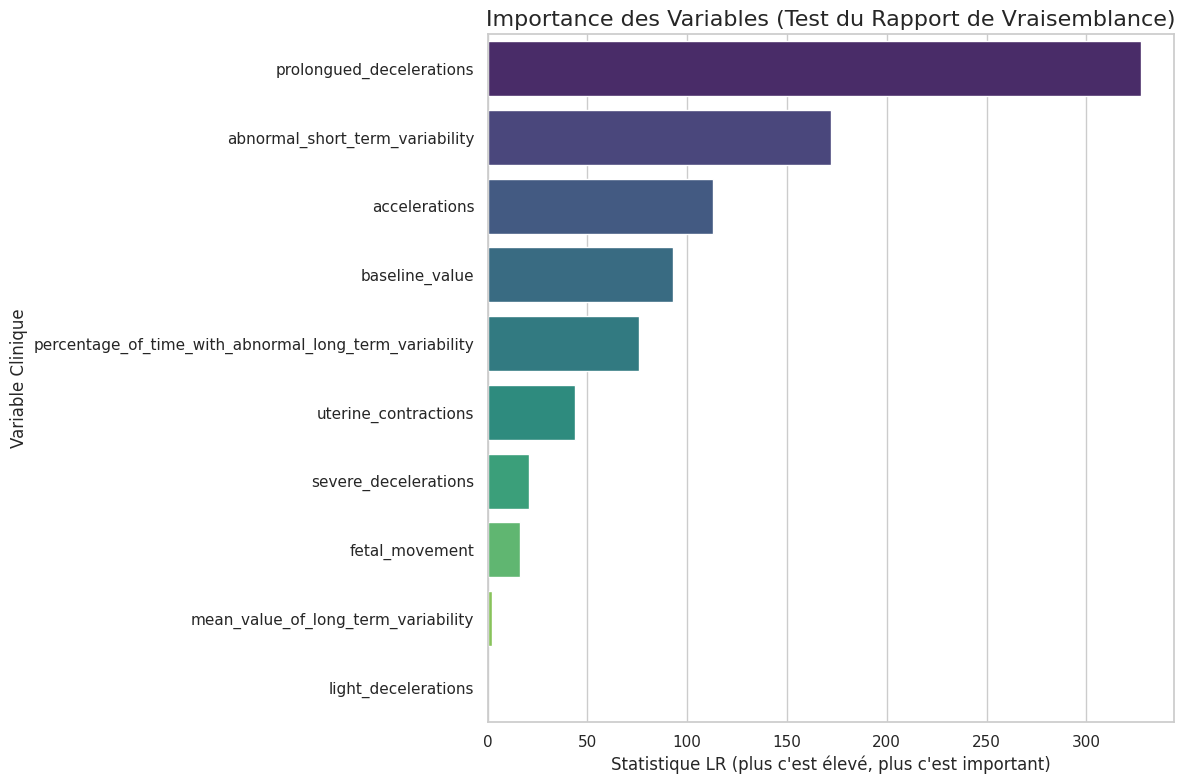

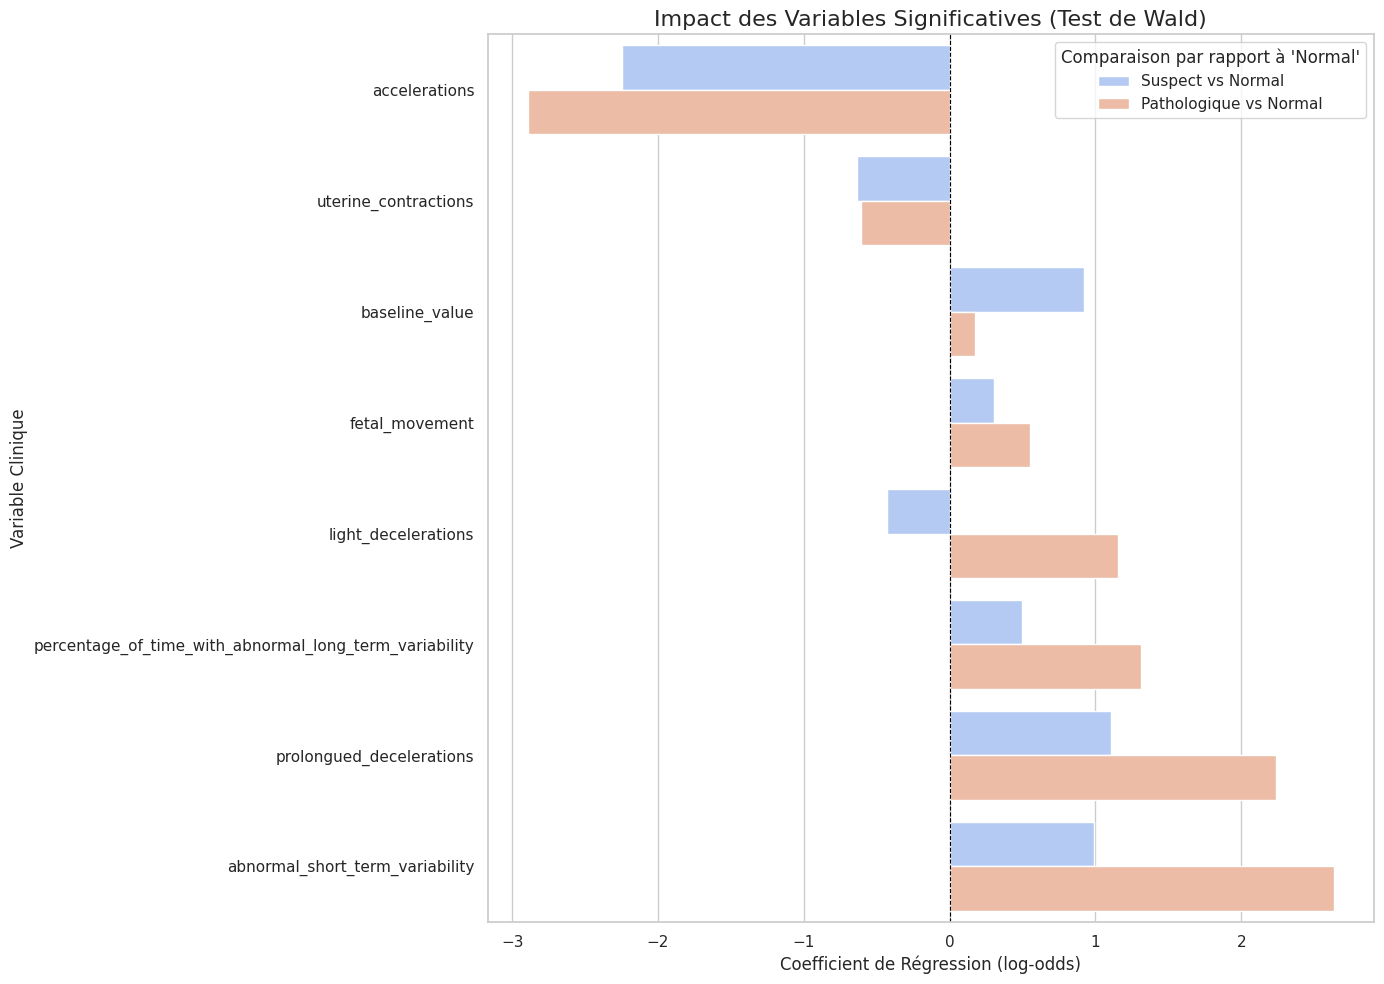

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration de Seaborn pour de jolis graphiques ---
sns.set_theme(style="whitegrid")

# --- Étape 1 : Entraînement du modèle (reprise du code final) ---

# Assurez-vous que le chemin vers votre fichier est correct
path = "fetal_health.csv"
try:
    df = pd.read_csv(path)
except FileNotFoundError:
    print(f"Erreur : Fichier non trouvé à l'adresse '{path}'")
    exit()

df.columns = df.columns.str.strip().str.replace(" ", "_")
X = df.drop("fetal_health", axis=1)
y = df["fetal_health"] - 1

# Sélection de variables
columns_to_drop = [
    'mean_value_of_short_term_variability', 'histogram_width', 'histogram_min',
    'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes',
    'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance',
    'histogram_tendency'
]
X_reduced = X.drop(columns=columns_to_drop)
feature_names = X_reduced.columns

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)
X_scaled_const = sm.add_constant(X_scaled, prepend=True)
X_scaled_const_df = pd.DataFrame(X_scaled_const, columns=['const'] + list(feature_names))

# Entraînement
print("Entraînement du modèle...")
full_model = sm.MNLogit(y, X_scaled_const_df)
# Ajout d'un solveur plus robuste pour aider à la convergence
full_model_results = full_model.fit(method='newton', disp=0)
print("Entraînement terminé.")


# --- Graphique 1 : Importance des Variables (Test du Rapport de Vraisemblance) ---

# Calcul des statistiques LR
log_likelihood_full = full_model_results.llf
lr_test_results = []
for col_name in feature_names:
    X_reduced_lr = X_scaled_const_df.drop(columns=col_name)
    reduced_model = sm.MNLogit(y, X_reduced_lr)
    try:
        reduced_model_results = reduced_model.fit(method='newton', disp=0)
        log_likelihood_reduced = reduced_model_results.llf
        degrees_of_freedom = y.nunique() - 1
        lr_statistic = -2 * (log_likelihood_reduced - log_likelihood_full)
        lr_test_results.append({"Variable": col_name, "Statistique LR": lr_statistic})
    except Exception:
        lr_test_results.append({"Variable": col_name, "Statistique LR": 0})

lr_df = pd.DataFrame(lr_test_results).sort_values("Statistique LR", ascending=False)

# Création du graphique
plt.figure(figsize=(12, 8))
sns.barplot(x="Statistique LR", y="Variable", data=lr_df, palette="viridis", hue="Variable", dodge=False)
plt.title("Importance des Variables (Test du Rapport de Vraisemblance)", fontsize=16)
plt.xlabel("Statistique LR (plus c'est élevé, plus c'est important)", fontsize=12)
plt.ylabel("Variable Clinique", fontsize=12)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()


# --- Graphique 2 : Impact des Variables Significatives (Test de Wald) ---

# Préparation des données pour le graphique
params = full_model_results.params.drop('const')
pvalues = full_model_results.pvalues.drop('const')
bse = full_model_results.bse.drop('const') # Erreurs standard
params.columns = ['Suspect vs Normal', 'Pathologique vs Normal']
pvalues.columns = ['p_Suspect', 'p_Patho']
data_to_plot = pd.concat([params, pvalues], axis=1)

# Garder les variables significatives (p < 0.05)
significant_vars = data_to_plot[(data_to_plot['p_Suspect'] < 0.05) | (data_to_plot['p_Patho'] < 0.05)]

# **CORRECTION DE L'ERREUR ICI**
# On retire la variable 'severe_decelerations' si son erreur standard est trop grande
if 'severe_decelerations' in significant_vars.index:
    # Accès correct à l'erreur standard avec .loc
    if bse.loc['severe_decelerations'].iloc[0] > 1000:
         significant_vars = significant_vars.drop('severe_decelerations')

significant_vars = significant_vars[['Suspect vs Normal', 'Pathologique vs Normal']].sort_values(by='Pathologique vs Normal')
plot_data_melted = significant_vars.reset_index().melt(id_vars='index', var_name='Comparaison', value_name='Coefficient')
plot_data_melted.rename(columns={'index': 'Variable'}, inplace=True)

# Création du graphique
plt.figure(figsize=(14, 10))
sns.barplot(x="Coefficient", y="Variable", hue="Comparaison", data=plot_data_melted, palette="coolwarm")
plt.title("Impact des Variables Significatives (Test de Wald)", fontsize=16)
plt.xlabel("Coefficient de Régression (log-odds)", fontsize=12)
plt.ylabel("Variable Clinique", fontsize=12)
plt.axvline(x=0, color='black', linewidth=0.8, linestyle='--')
plt.legend(title="Comparaison par rapport à 'Normal'")
plt.tight_layout()
plt.show()

/tmp/ipython-input-3-84479229.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Suspect vs Normal", y=suspect_data.index, data=suspect_data.reset_index(), palette="Blues_d")


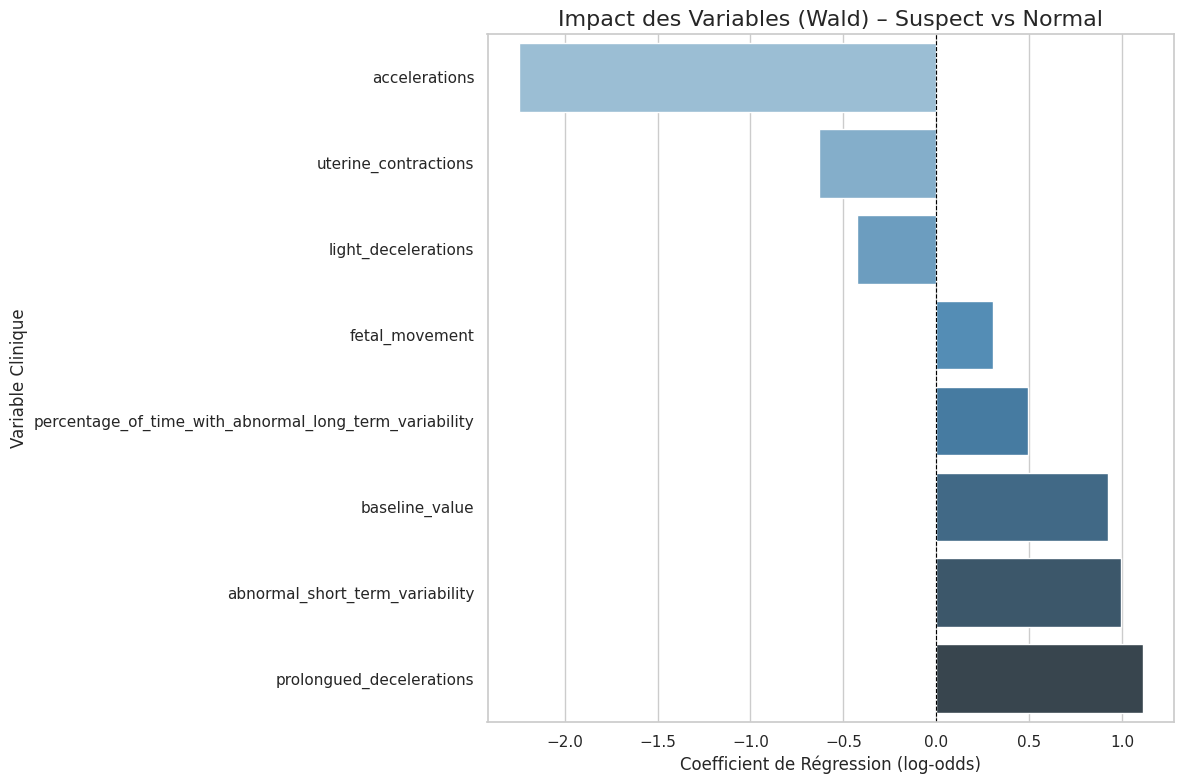

/tmp/ipython-input-3-84479229.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pathologique vs Normal", y=patho_data.index, data=patho_data.reset_index(), palette="Reds_d")


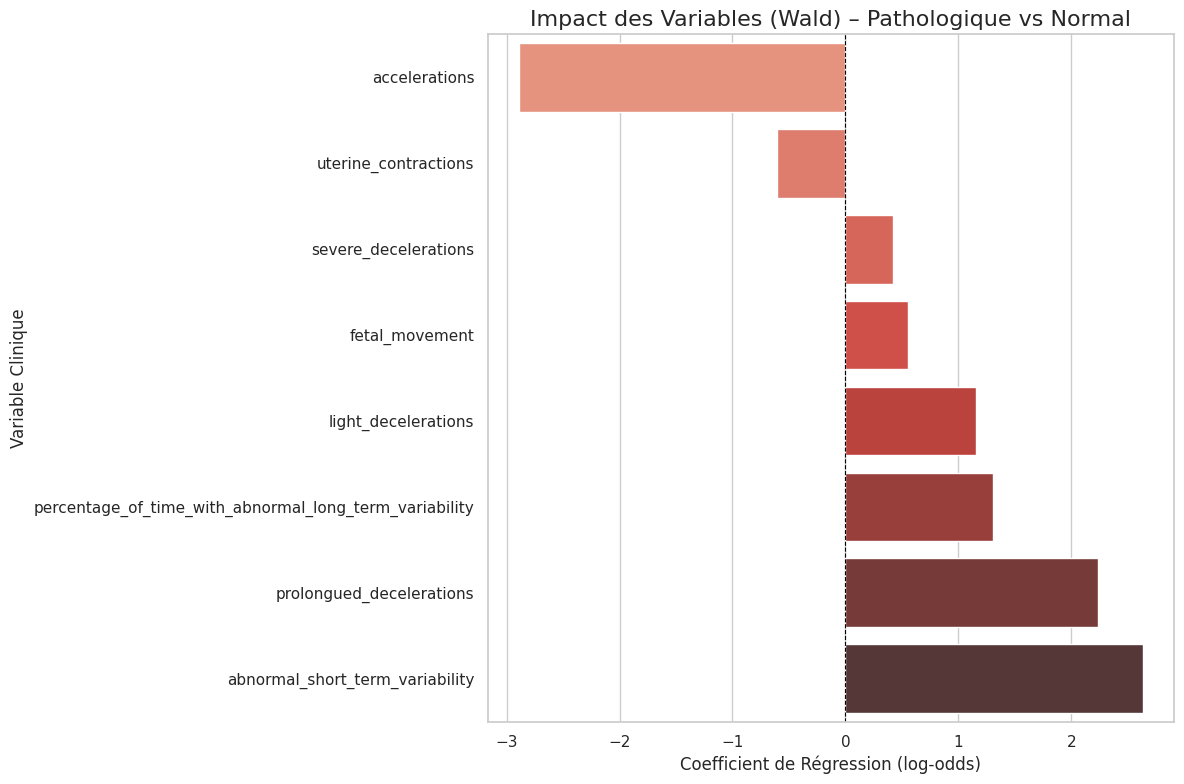

In [ ]:
# --- Graphique 2a : Impact des Variables Significatives (Test de Wald : Suspect vs Normal) ---
# On récupère les coefficients, p-values et erreurs standard
params = full_model_results.params.drop('const')
pvalues = full_model_results.pvalues.drop('const')
bse = full_model_results.bse.drop('const')  # Erreurs standard

# Renommage pour clarté
params.columns = ['Suspect vs Normal', 'Pathologique vs Normal']
pvalues.columns = ['p_Suspect', 'p_Patho']

# Variables significatives pour chaque comparaison
signif_suspect = (pvalues['p_Suspect'] < 0.05)
signif_patho = (pvalues['p_Patho'] < 0.05)

# --- Graphique pour Suspect vs Normal ---
suspect_data = params[signif_suspect][['Suspect vs Normal']].sort_values(by='Suspect vs Normal')
plt.figure(figsize=(12, 8))
sns.barplot(x="Suspect vs Normal", y=suspect_data.index, data=suspect_data.reset_index(), palette="Blues_d")
plt.title("Impact des Variables (Wald) – Suspect vs Normal", fontsize=16)
plt.xlabel("Coefficient de Régression (log-odds)", fontsize=12)
plt.ylabel("Variable Clinique", fontsize=12)
plt.axvline(x=0, color='black', linewidth=0.8, linestyle='--')
plt.tight_layout()
plt.show()

# --- Graphique pour Pathologique vs Normal ---
patho_data = params[signif_patho][['Pathologique vs Normal']].sort_values(by='Pathologique vs Normal')
plt.figure(figsize=(12, 8))
sns.barplot(x="Pathologique vs Normal", y=patho_data.index, data=patho_data.reset_index(), palette="Reds_d")
plt.title("Impact des Variables (Wald) – Pathologique vs Normal", fontsize=16)
plt.xlabel("Coefficient de Régression (log-odds)", fontsize=12)
plt.ylabel("Variable Clinique", fontsize=12)
plt.axvline(x=0, color='black', linewidth=0.8, linestyle='--')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:3059: RuntimeWarning: divide by z

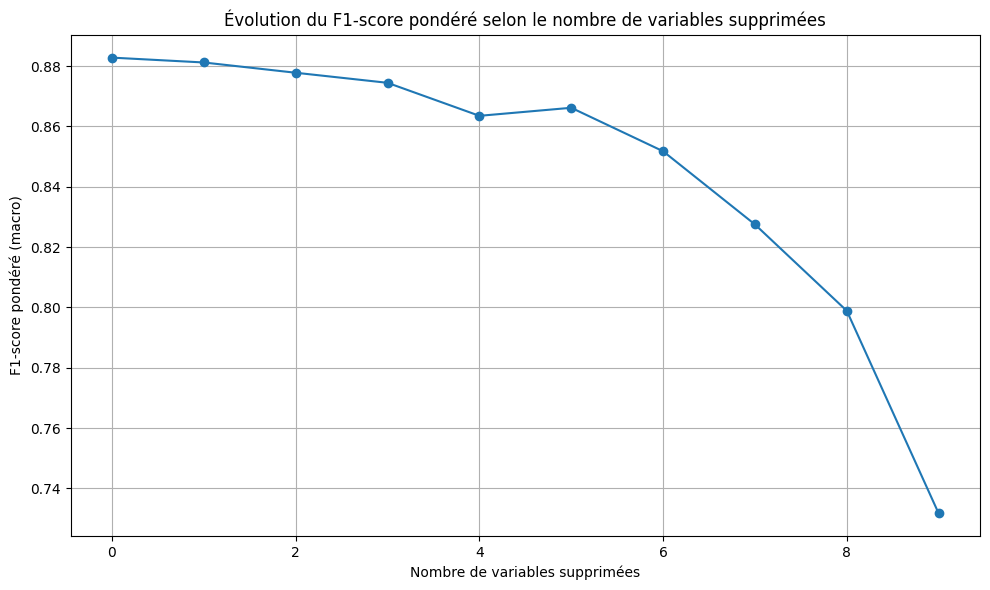

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# --- Chargement des données ---
path = "fetal_health.csv"
df = pd.read_csv(path)
df.columns = df.columns.str.strip().str.replace(" ", "_")
X = df.drop("fetal_health", axis=1)
y = df["fetal_health"] - 1  # Classes : 0 = normal, 1 = suspect, 2 = pathologique

# Suppression des variables histogrammes
columns_to_drop = [
    'mean_value_of_short_term_variability', 'histogram_width', 'histogram_min',
    'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes',
    'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance',
    'histogram_tendency'
]
X = X.drop(columns=columns_to_drop)
feature_names = list(X.columns)

# --- Standardisation ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_names)
X_scaled_df = sm.add_constant(X_scaled_df, prepend=True)

# --- Initialisation ---
remaining_features = feature_names.copy()
f1_scores = []
num_features_removed = []

# --- Fonction entraînement + score ---
def train_and_score(X_data, y_true):
    model = sm.MNLogit(y_true, X_data)
    result = model.fit(method='newton', disp=0)
    y_pred = result.predict(X_data).values.argmax(axis=1)
    return f1_score(y_true, y_pred, average='weighted'), result

# --- Boucle de suppression des variables ---
X_current = X_scaled_df.copy()
y_current = y.copy()

while len(remaining_features) > 1:
    # 1. Entraînement et F1-score
    f1, full_model_result = train_and_score(X_current, y_current)
    f1_scores.append(f1)
    num_features_removed.append(len(feature_names) - len(remaining_features))

    # 2. Calcul des statistiques LR
    log_likelihood_full = full_model_result.llf
    lr_stats = []

    for col in remaining_features:
        try:
            X_temp = X_current.drop(columns=col)
            reduced_model = sm.MNLogit(y, X_temp)
            reduced_result = reduced_model.fit(method='newton', disp=0)
            log_likelihood_reduced = reduced_result.llf
            lr_stat = -2 * (log_likelihood_reduced - log_likelihood_full)
        except Exception:
            lr_stat = 0
        lr_stats.append((col, lr_stat))

    # 3. Suppression de la variable la moins importante
    worst_variable = min(lr_stats, key=lambda x: x[1])[0]
    remaining_features.remove(worst_variable)
    X_current = X_current.drop(columns=worst_variable)

# Ajout du dernier score (1 variable restante + constante)
f1, _ = train_and_score(X_current, y_current)
f1_scores.append(f1)
num_features_removed.append(len(feature_names) - len(remaining_features))

# --- Tracé de la courbe ---
plt.figure(figsize=(10, 6))
plt.plot(num_features_removed, f1_scores, marker='o')
plt.title("Évolution du F1-score pondéré selon le nombre de variables supprimées")
plt.xlabel("Nombre de variables supprimées")
plt.ylabel("F1-score pondéré (macro)")
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:3059: RuntimeWarning: divide by z

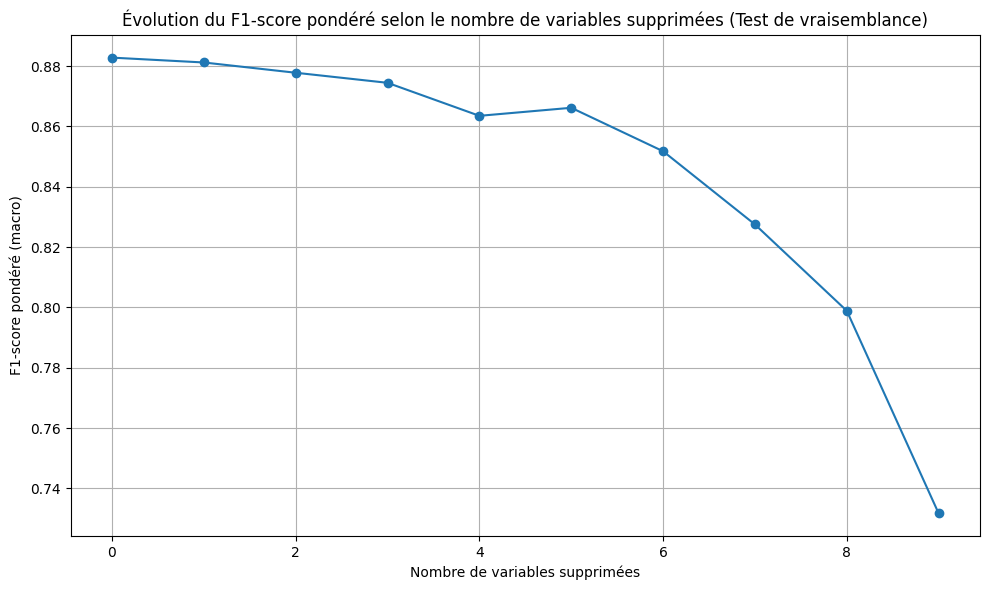

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# --- Chargement des données ---
path = "fetal_health.csv"
df = pd.read_csv(path)
df.columns = df.columns.str.strip().str.replace(" ", "_")
X = df.drop("fetal_health", axis=1)
y = df["fetal_health"] - 1  # Classes : 0 = normal, 1 = suspect, 2 = pathologique

# Suppression de certaines variables peu utiles
columns_to_drop = [
    'mean_value_of_short_term_variability', 'histogram_width', 'histogram_min',
    'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes',
    'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance',
    'histogram_tendency'
]
X = X.drop(columns=columns_to_drop)
feature_names = list(X.columns)

# --- Standardisation ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_names)
X_scaled_df = sm.add_constant(X_scaled_df, prepend=True)

# --- Initialisation ---
remaining_features = feature_names.copy()
f1_scores = []
num_features_removed = []

# --- Fonction entraînement + score ---
def train_and_score(X_data, y_true):
    model = sm.MNLogit(y_true, X_data)
    result = model.fit(method='newton', disp=0)
    y_pred = result.predict(X_data).values.argmax(axis=1)
    return f1_score(y_true, y_pred, average='weighted'), result

# --- Boucle de suppression par test du rapport de vraisemblance ---
X_current = X_scaled_df.copy()
y_current = y.copy()

while len(remaining_features) > 1:
    # Étape 1 : entraînement du modèle complet
    f1, full_model_result = train_and_score(X_current, y_current)
    f1_scores.append(f1)
    num_features_removed.append(len(feature_names) - len(remaining_features))

    log_likelihood_full = full_model_result.llf
    lr_stats = []

    # Étape 2 : on teste chaque variable en la retirant (1 à 1)
    for col in remaining_features:
        try:
            X_temp = X_current.drop(columns=col)
            reduced_model = sm.MNLogit(y, X_temp)
            reduced_result = reduced_model.fit(method='newton', disp=0)
            log_likelihood_reduced = reduced_result.llf
            # Test du rapport de vraisemblance
            lr_stat = -2 * (log_likelihood_reduced - log_likelihood_full)
        except Exception:
            lr_stat = 0  # si ça plante (convergence), on ignore
        lr_stats.append((col, lr_stat))

    # Étape 3 : on supprime la variable la moins importante (plus petit LR)
    worst_variable = min(lr_stats, key=lambda x: x[1])[0]
    remaining_features.remove(worst_variable)
    X_current = X_current.drop(columns=worst_variable)

# Dernier modèle avec la dernière variable restante
f1, _ = train_and_score(X_current, y_current)
f1_scores.append(f1)
num_features_removed.append(len(feature_names) - len(remaining_features))

# --- Affichage de la courbe ---
plt.figure(figsize=(10, 6))
plt.plot(num_features_removed, f1_scores, marker='o')
plt.title("Évolution du F1-score pondéré selon le nombre de variables supprimées (Test de vraisemblance)")
plt.xlabel("Nombre de variables supprimées")
plt.ylabel("F1-score pondéré (macro)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# --- 1. Chargement et préparation des données ---
# Assurez-vous que le chemin vers votre fichier est correct
path = "fetal_health.csv"
try:
    df = pd.read_csv(path)
except FileNotFoundError:
    print(f"Erreur : Fichier non trouvé à l'adresse '{path}'")
    exit()

df.columns = df.columns.str.strip().str.replace(" ", "_")
X = df.drop("fetal_health", axis=1)
y = df["fetal_health"]

# --- 2. Modèle de Référence (avec toutes les variables) ---
print("---" * 15)
print("  Modèle de Référence (21 variables)  ")
print("---" * 15)

# Standardisation et division des données
scaler_full = StandardScaler()
X_full_scaled = scaler_full.fit_transform(X)
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Entraînement
logreg_full = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000)
logreg_full.fit(X_train_full, y_train_full)

# Évaluation
y_pred_full = logreg_full.predict(X_test_full)
acc_full = accuracy_score(y_test_full, y_pred_full)

print(f"Précision (Accuracy) : {acc_full:.3f}\n")
print("Rapport de classification :")
print(classification_report(
    y_test_full, y_pred_full,
    target_names=["Normal (1)", "Suspect (2)", "Pathologique (3)"]
))


# --- 3. Modèle Simplifié (sans les variables les moins importantes) ---
print("\n" + "---" * 15)
print("  Modèle Simplifié (18 variables)  ")
print("---" * 15)

# Suppression des variables identifiées
columns_to_drop = [
    'mean_value_of_long_term_variability',
    'severe_decelerations',
    'light_decelerations'
]
X_reduced = X.drop(columns=columns_to_drop)
print(f"Variables retirées : {columns_to_drop}\n")

# Standardisation et division des données
scaler_reduced = StandardScaler()
X_reduced_scaled = scaler_reduced.fit_transform(X_reduced)
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(
    X_reduced_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Entraînement
logreg_reduced = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000)
logreg_reduced.fit(X_train_reduced, y_train_reduced)

# Évaluation
y_pred_reduced = logreg_reduced.predict(X_test_reduced)
acc_reduced = accuracy_score(y_test_reduced, y_pred_reduced)

print(f"Précision (Accuracy) : {acc_reduced:.3f}\n")
print("Rapport de classification :")
print(classification_report(
    y_test_reduced, y_pred_reduced,
    target_names=["Normal (1)", "Suspect (2)", "Pathologique (3)"]
))

---------------------------------------------
  Modèle de Référence (21 variables)  
---------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Précision (Accuracy) : 0.885

Rapport de classification :
                  precision    recall  f1-score   support

      Normal (1)       0.94      0.95      0.94       332
     Suspect (2)       0.61      0.68      0.64        59
Pathologique (3)       0.88      0.66      0.75        35

        accuracy                           0.88       426
       macro avg       0.81      0.76      0.78       426
    weighted avg       0.89      0.88      0.89       426


---------------------------------------------
  Modèle Simplifié (18 variables)  
---------------------------------------------
Variables retirées : ['mean_value_of_long_term_variability', 'severe_decelerations', 'light_decelerations']

Précision (Accuracy) : 0.887

Rapport de classification :
                  precision    recall  f1-score   support

      Normal (1)       0.94      0.95      0.94       332
     Suspect (2)       0.62      0.66      0.64        59
Pathologique (3)       0.88      0.66      0.75        35

   

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


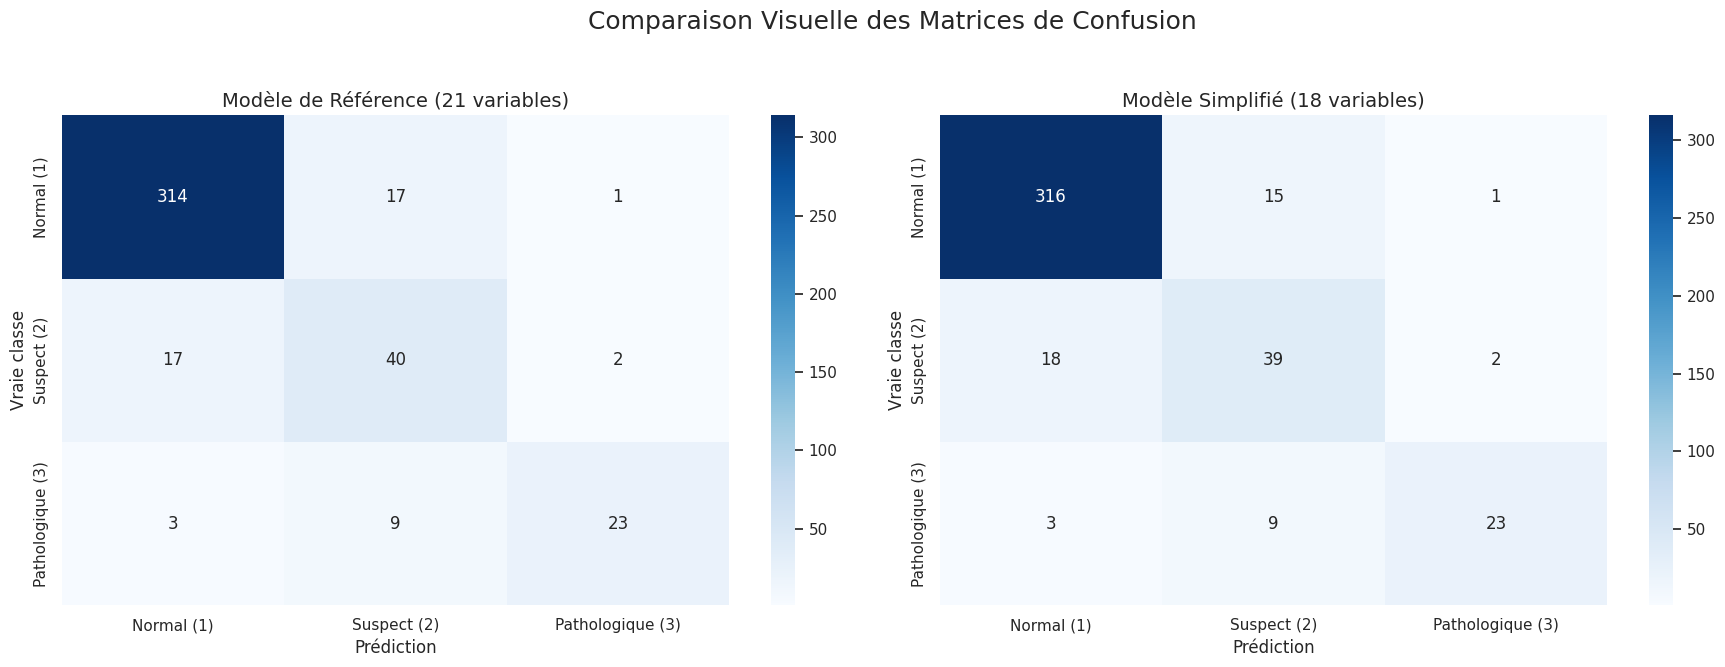

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration de Seaborn pour de jolis graphiques ---
sns.set_theme(style="whitegrid")

# --- 1. Chargement et préparation des données ---
# Assurez-vous que le chemin vers votre fichier est correct
path = "fetal_health.csv"
try:
    df = pd.read_csv(path)
except FileNotFoundError:
    print(f"Erreur : Fichier non trouvé à l'adresse '{path}'")
    exit()

df.columns = df.columns.str.strip().str.replace(" ", "_")
X = df.drop("fetal_health", axis=1)
y = df["fetal_health"]

# --- 2. Entraînement des deux modèles ---

# Modèle de Référence
scaler_full = StandardScaler()
X_full_scaled = scaler_full.fit_transform(X)
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full_scaled, y, test_size=0.2, random_state=42, stratify=y
)
logreg_full = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000)
logreg_full.fit(X_train_full, y_train_full)
y_pred_full = logreg_full.predict(X_test_full)
cm_full = confusion_matrix(y_test_full, y_pred_full)

# Modèle Simplifié
columns_to_drop = [
    'mean_value_of_long_term_variability',
    'severe_decelerations',
    'light_decelerations'
]
X_reduced = X.drop(columns=columns_to_drop)
scaler_reduced = StandardScaler()
X_reduced_scaled = scaler_reduced.fit_transform(X_reduced)
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(
    X_reduced_scaled, y, test_size=0.2, random_state=42, stratify=y
)
logreg_reduced = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000)
logreg_reduced.fit(X_train_reduced, y_train_reduced)
y_pred_reduced = logreg_reduced.predict(X_test_reduced)
cm_reduced = confusion_matrix(y_test_reduced, y_pred_reduced)

# --- 3. Création du visuel comparatif ---

# Libellés pour les axes
labels = ["Normal (1)", "Suspect (2)", "Pathologique (3)"]

# Création de la figure avec deux sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle("Comparaison Visuelle des Matrices de Confusion", fontsize=18)

# Matrice de confusion pour le modèle de référence
sns.heatmap(cm_full, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title("Modèle de Référence (21 variables)", fontsize=14)
axes[0].set_xlabel("Prédiction", fontsize=12)
axes[0].set_ylabel("Vraie classe", fontsize=12)

# Matrice de confusion pour le modèle simplifié
sns.heatmap(cm_reduced, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title("Modèle Simplifié (18 variables)", fontsize=14)
axes[1].set_xlabel("Prédiction", fontsize=12)
axes[1].set_ylabel("Vraie classe", fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1) Chargement et préparation des données
try:
    df = pd.read_csv("fetal_health.csv")
except FileNotFoundError:
    print("Le fichier 'fetal_health (2).csv' n'a pas été trouvé. Veuillez vous assurer que le fichier est dans le bon répertoire.")
    exit()

# Nettoyage des noms de colonnes
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Séparation des features (X) and target (y)
X = df.drop("fetal_health", axis=1)
y = df["fetal_health"]

# 2) Standardisation des données
# Bien que les arbres de décision ne nécessitent pas de mise à l'échelle des caractéristiques,
# nous la conservons pour maintenir une comparaison cohérente avec le modèle de régression logistique.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3) Division des données en ensembles d'entraînement et de test (80/20 stratifié)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 4) Entraînement du modèle d'Arbre de Décision
# Nous utilisons un random_state pour la reproductibilité
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_dt = dt_classifier.predict(X_test)

# 5) Évaluation du modèle
print("=== Arbre de Décision : Rapport de classification ===")
print(classification_report(
    y_test, y_pred_dt,
    target_names=["Normal (1)", "Suspect (2)", "Pathological (3)"]
))

acc_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy Arbre de Décision :", round(acc_dt, 3))

print("\nMatrice de confusion :")
# Création d'un DataFrame pour une meilleure lisibilité
conf_matrix_df = pd.DataFrame(
    confusion_matrix(y_test, y_pred_dt),
    index=["Vrai_Normal", "Vrai_Suspect", "Vrai_Pathologique"],
    columns=["Pred_Normal", "Pred_Suspect", "Pred_Pathologique"]
)
print(conf_matrix_df.to_string())

=== Arbre de Décision : Rapport de classification ===
                  precision    recall  f1-score   support

      Normal (1)       0.94      0.95      0.94       332
     Suspect (2)       0.72      0.64      0.68        59
Pathological (3)       0.81      0.83      0.82        35

        accuracy                           0.90       426
       macro avg       0.82      0.81      0.81       426
    weighted avg       0.90      0.90      0.90       426

Accuracy Arbre de Décision : 0.899

Matrice de confusion :
                   Pred_Normal  Pred_Suspect  Pred_Pathologique
Vrai_Normal                316            14                  2
Vrai_Suspect                16            38                  5
Vrai_Pathologique            5             1                 29


# Analyse supervisée

--- Entraînement de K-Nearest Neighbors ---
Accuracy de K-Nearest Neighbors: 0.9061

--- Entraînement de Gaussian Naive Bayes ---
Accuracy de Gaussian Naive Bayes: 0.8099

--- Entraînement de Linear Discriminant ---
Accuracy de Linear Discriminant: 0.8592

--- Entraînement de Quadratic Discriminant ---


/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this war

Accuracy de Quadratic Discriminant: 0.8122

--- Entraînement de Logistic Regression ---
Accuracy de Logistic Regression: 0.8850

--- Entraînement de Decision Tree ---
Accuracy de Decision Tree: 0.8991



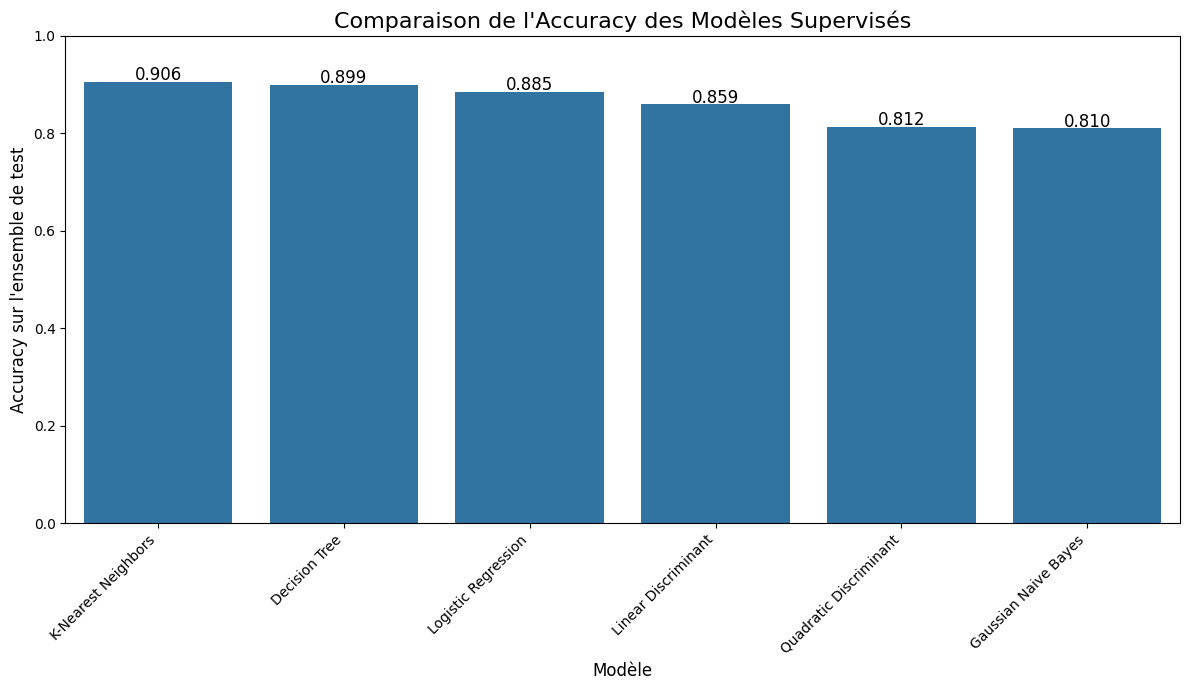


--- Résumé des Accuracies ---
                    Model  Accuracy
0     K-Nearest Neighbors  0.906103
5           Decision Tree  0.899061
4     Logistic Regression  0.884977
2     Linear Discriminant  0.859155
3  Quadratic Discriminant  0.812207
1    Gaussian Naive Bayes  0.809859


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. Chargement et préparation des données
try:
    # Utilise le fichier que vous avez téléversé
    df = pd.read_csv("fetal_health.csv")
except FileNotFoundError:
    print("Erreur : Le fichier 'fetal_health (2).csv' est introuvable.")
    exit()

# Nettoyage des noms de colonnes
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Définition des features (X) et de la cible (y)
X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

# 2. Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Important pour les classes déséquilibrées
)

# 4. Définition et entraînement des modèles
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3, weights='distance', p=1), # Paramètres optimaux de votre script
    "Gaussian Naive Bayes": GaussianNB(),
    "Linear Discriminant": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant": QuadraticDiscriminantAnalysis(),
    "Logistic Regression": LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Dictionnaire pour stocker les scores d'accuracy
accuracies = {}

# Boucle pour entraîner et évaluer chaque modèle
for name, model in models.items():
    print(f"--- Entraînement de {name} ---")

    # Cas spécial pour KNN pour trouver les meilleurs paramètres si souhaité
    if name == "K-Nearest Neighbors":
        # Note : Le code suivant exécute une recherche complète.
        # Pour accélérer, j'utilise les meilleurs paramètres que vous avez trouvés.
        # Décommentez les lignes de GridSearchCV pour ré-exécuter la recherche.

        # param_grid = {'n_neighbors': list(range(1, 11)), 'weights': ['uniform', 'distance'], 'p': [1, 2]}
        # grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        # grid.fit(X_train, y_train)
        # best_model = grid.best_estimator_
        # print("Meilleurs paramètres pour KNN:", grid.best_params_)

        # Utilisation directe du modèle avec les paramètres optimisés
        best_model = model
        best_model.fit(X_train, y_train)

    else:
        # Entraînement des autres modèles
        best_model = model
        best_model.fit(X_train, y_train)

    # Prédiction et calcul de l'accuracy
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f"Accuracy de {name}: {acc:.4f}\n")

# 5. Création du DataFrame pour la visualisation
results_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)

# 6. Visualisation des résultats
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='Model', y='Accuracy', data=results_df)

# Ajout des labels d'accuracy sur les barres
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Comparaison de l\'Accuracy des Modèles Supervisés', fontsize=16)
plt.xlabel('Modèle', fontsize=12)
plt.ylabel('Accuracy sur l\'ensemble de test', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.0) # L'accuracy est entre 0 et 1
plt.tight_layout()
plt.show()

# Affichage du résumé des accuracies
print("\n--- Résumé des Accuracies ---")
print(results_df)

In [ ]:
# Division des données centrées en ensembles d'entraînement et de test
# On utilise les données X_scaled_df et y
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42, stratify=y)
# stratify=y est important pour garder la proportion des classes dans les ensembles train et test
print("Dimensions des ensembles d'entraînement et de test :")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print("\n" + "="*50 + "\n")

# Initialisation des modèles
models = {
    "Régression Logistique": LogisticRegression(random_state=42, max_iter=1000),
    "K-Plus Proches Voisins (k-NN)": KNeighborsClassifier(n_neighbors=5), # k=5 est une valeur commune
    "Arbre de Décision": DecisionTreeClassifier(random_state=42),
    "Forêt Aléatoire": RandomForestClassifier(random_state=42, n_estimators=100) # n_estimators=100 est un bon début
}

# Entraînement et évaluation des modèles
for name, model in models.items():
    print(f"--- Évaluation du modèle : {name} ---")

    # Entraînement
    model.fit(X_train, y_train)

    # Prédictions
    y_pred = model.predict(X_test)

    # Évaluation
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nMatrice de Confusion :\n", confusion_matrix(y_test, y_pred))
    print("\nRapport de Classification :\n", classification_report(y_test, y_pred))
    print("\n" + "-"*30 + "\n")

# La Forêt Aléatoire semble donner de très bons résultats !
# L'Arbre de Décision aussi, mais il peut être sujet à l'overfitting.
# La Régression Logistique et k-NN sont un peu en dessous mais restent corrects.

Dimensions des ensembles d'entraînement et de test :
X_train: (1488, 21), y_train: (1488,)
X_test: (638, 21), y_test: (638,)


--- Évaluation du modèle : Régression Logistique ---
Accuracy: 0.8934169278996865

Matrice de Confusion :
 [[470  26   1]
 [ 24  63   1]
 [  4  12  37]]

Rapport de Classification :
               precision    recall  f1-score   support

         1.0       0.94      0.95      0.94       497
         2.0       0.62      0.72      0.67        88
         3.0       0.95      0.70      0.80        53

    accuracy                           0.89       638
   macro avg       0.84      0.79      0.81       638
weighted avg       0.90      0.89      0.89       638


------------------------------

--- Évaluation du modèle : K-Plus Proches Voisins (k-NN) ---
Accuracy: 0.877742946708464

Matrice de Confusion :
 [[480  16   1]
 [ 39  46   3]
 [  8  11  34]]

Rapport de Classification :
               precision    recall  f1-score   support

         1.0       0.91      0.

La Forêt Aléatoire
semble la plus performante sur ce jeu de données après une mise à l'échelle standard.

# Reg Log sur ACP

Fitting 10 folds for each of 11 candidates, totalling 110 fits
Meilleur nombre de CP (F1 macro CV) : 14
Meilleur F1 macro en CV : 0.797

=== Rapport de classification (test) ===
                  precision    recall  f1-score   support

      Normal (1)       0.94      0.94      0.94       332
     Suspect (2)       0.58      0.63      0.60        59
Pathological (3)       0.86      0.69      0.76        35

        accuracy                           0.88       426
       macro avg       0.79      0.75      0.77       426
    weighted avg       0.88      0.88      0.88       426

F1 macro sur le test : 0.768

=== Matrice de confusion ===
          Pred_N=1  Pred_S=2  Pred_P=3
Vrai_N=1       313        18         1
Vrai_S=2        19        37         3
Vrai_P=3         2         9        24


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


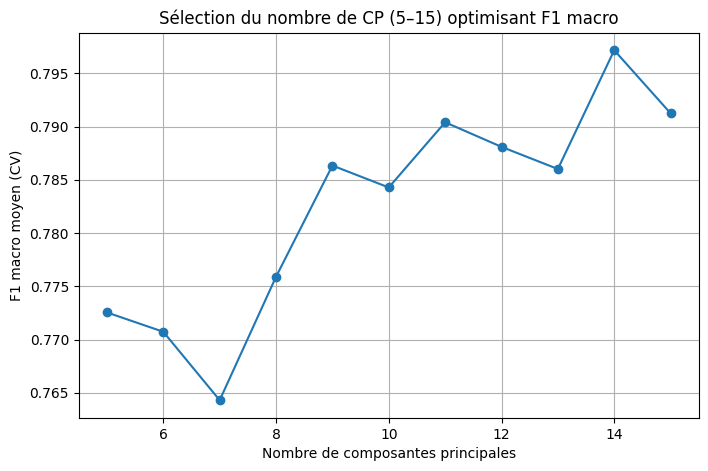

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# 1) Chargement et préparation
df = pd.read_csv("fetal_health.csv")
df.columns = df.columns.str.strip().str.replace(" ", "_")
X = df.drop("fetal_health", axis=1)
y = df["fetal_health"]

# 2) Découpage train/test (80/20 stratifié) SUR LES DONNÉES BRUTES
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3) Pipeline : Standardisation → ACP → Régression logistique
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(random_state=42)),
    ("logreg", LogisticRegression(
        multi_class="multinomial",
        solver="lbfgs",
        max_iter=1000,
        random_state=42
    ))
])

# 4) GridSearchCV pour tester n_components de 5 à 15,
#    en optimisant le score F1 macro
param_grid = {
    "pca__n_components": list(range(5, 16))
}
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=10,
    scoring="f1_macro",
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train_raw, y_train)

print("Meilleur nombre de CP (F1 macro CV) :", grid.best_params_["pca__n_components"])
print(f"Meilleur F1 macro en CV : {grid.best_score_:.3f}")

# 5) Évaluation sur l'ensemble de test
best_pipe = grid.best_estimator_
y_pred = best_pipe.predict(X_test_raw)

print("\n=== Rapport de classification (test) ===")
print(classification_report(
    y_test, y_pred,
    target_names=["Normal (1)", "Suspect (2)", "Pathological (3)"]
))

f1_test = f1_score(y_test, y_pred, average="macro")
print("F1 macro sur le test :", round(f1_test, 3))

print("\n=== Matrice de confusion ===")
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm,
    index=["Vrai_N=1", "Vrai_S=2", "Vrai_P=3"],
    columns=["Pred_N=1", "Pred_S=2", "Pred_P=3"]
)
print(cm_df.to_string())

# 6) (Optionnel) Courbe F1_cv en fonction du nombre de CP
components = grid.cv_results_["param_pca__n_components"].data
f1_scores = grid.cv_results_["mean_test_score"]

plt.figure(figsize=(8,5))
plt.plot(components, f1_scores, marker="o")
plt.xlabel("Nombre de composantes principales")
plt.ylabel("F1 macro moyen (CV)")
plt.title("Sélection du nombre de CP (5–15) optimisant F1 macro")
plt.grid(True)
plt.show()
